# <center> Kaggle Flood Prediction Playground Competition </center>

* Working on the flood Prediction dataset <br>
* Dataset link: https://www.kaggle.com/competitions/playground-series-s4e5


## Understanding the Problem
* <b>Overview</b> <br>
    Welcome to the 2024 Kaggle Playground Series! We plan to continue in the spirit of previous playgrounds, providing interesting an approachable datasets for our community to practice their machine learning skills, and anticipate a competition each month.

* <b>Your Goal:</b> <br>
The goal of this competition is to predict the probability of a region flooding based on various factors.

### Dataset
* The given dataset for flood prediction problem is divided into
  - <b>train set:</b> This is the dataset that will be used for building the model
  - <b>test set:</b> this is the test dataset that will be used for the final prediction after the model has been built
  - <b>sample submission set</b> This is an example of how the submission will look like 

### Let's Load the given Datasets

In [1]:
#importing all the required libraries
import pandas as pd # used for data manipulation and Exploratory data analysis
import numpy as np # used for mathematical and numeric operations
import matplotlib.pyplot as plt # This is used for data visualization
#this enables matplotlib not to create an extra window for visualixation rather inline with the notebook
%matplotlib inline 
import seaborn as sn # this is for data visualisation
pd.set_option('display.max_columns', None) #this feature enable all the columns to be displayed and non should be hidden


C:\Users\hp\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")

In [3]:
train.head() # displaying the first 5 rows of the train set

id  MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0   0                 5                   8                5              8   
1   1                 6                   7                4              4   
2   2                 6                   5                6              7   
3   3                 3                   4                6              5   
4   4                 5                   3                2              6   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             6              4            4          3                      3   
1             8              8            3          5                      4   
2             3              7            1          5                      4   
3             4              8            4          7                      6   
4             4              4            3          3                      3   

   Encroachments  IneffectiveDisasterPreparedness  DrainageSystems  \
0              4                                2                5   
1              6                                9                7   
2              5                                6                7   
3              8                                5                2   
4              3                                5                2   

   CoastalVulnerability  Landslides  Watersheds  DeterioratingInfrastructure  \
0                     3           3           5                            4   
1                     2           0           3                            5   
2                     3           7           5                            6   
3                     4           7           4                            4   
4                     2           6           6                            4   

   PopulationScore  WetlandLoss  InadequatePlanning  PoliticalFactors  \
0                7            5                   7                 3   
1                3            3                   4                 3   
2                8            2                   3                 3   
3                6            5                   7                 5   
4                1            2                   3                 5   

   FloodProbability  
0             0.445  
1             0.450  
2             0.530  
3             0.535  
4             0.415

In [4]:
test.head()

id  MonsoonIntensity  TopographyDrainage  RiverManagement  \
0  1117957                 4                   6                3   
1  1117958                 4                   4                2   
2  1117959                 1                   3                6   
3  1117960                 2                   4                4   
4  1117961                 6                   3                2   

   Deforestation  Urbanization  ClimateChange  DamsQuality  Siltation  \
0              5             6              7            8          7   
1              9             5              5            4          7   
2              5             7              2            4          6   
3              6             4              5            4          3   
4              4             6              4            5          5   

   AgriculturalPractices  Encroachments  IneffectiveDisasterPreparedness  \
0                      8              4                                8   
1                      5              4                                2   
2                      4              2                                7   
3                      4              4                                7   
4                      3              7                                4   

   DrainageSystems  CoastalVulnerability  Landslides  Watersheds  \
0                5                     7           5           6   
1                4                     7           4           5   
2                9                     2           5           5   
3                8                     4           6           7   
4                3                     2           6           4   

   DeterioratingInfrastructure  PopulationScore  WetlandLoss  \
0                            3                6            4   
1                            1                7            4   
2                            2                3            6   
3                            6                4            2   
4                            6                8            4   

   InadequatePlanning  PoliticalFactors  
0                   4                 5  
1                   4                 3  
2                   8                 3  
3                   4                 4  
4                   5                 5

In [5]:
sample.head()

id  FloodProbability
0  1117957               0.5
1  1117958               0.5
2  1117959               0.5
3  1117960               0.5
4  1117961               0.5

## Data Exploration

* Lets explore the different datasets and understand the different columns and values

In [6]:
# The train dataset
print(train.shape) # displaying the number of columns and rows contained in the train dataset
print(test.shape) # displaying the number of columns and rows contained in the test dataset

(1117957, 22)
(745305, 21)


* we observed that the train set has 22 columns while the test set has 21 columns, let check further to know what the difference

In [7]:
train.columns #getting the columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [8]:
test.columns #getting the columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object')

* The train set has an extract column named <b>FloodProbability</b> which is the dependent variable, this is the variable to be predicted with the predictive model
* The <b>FloodProbability</b> value lies between <b>0</b> and <b>1</b>, its tells wheather the articular location will experience flood or not

### Now Let's go Further to Understand the Different Columns and their meaning except the id column

* MonsoonIntensity: This feature refers to the strength or vigor of the monsoon season, which is characterized by heavy rainfall and often associated with a shift in wind patterns.
<br>

* TopographyDrainage: This feature refers to the topography of the area as regards to its drainage system, which affect the flow of water
<br>
* RiverManagement:This feature refers to the effective river management system in the area, such as dam construction and waterways 
<br>
* Deforestation: This feature refers to the measure or rate of deforestation, it can disrupt water cycles, leading to changes in precipitation, runoff, and soil erosion, which can impact water quality and availability hence cause the region to be prone to flood
<br>
* Urbanization: This feature refers to the degree of urbanization of the region. Well developed regions often leads to improved runoff and reduced flood because of the presence of impervious surfaces like pavements and building.
<br>
* ClimateChange: This feature represent the influence Climate change has on flood risk. Climatic change has significant implications for flood risk, as it can alter precipitation patterns, increase the frequency and intensity of extreme weather events, and contribute to sea-level rise. 
<br>
* DamsQuality: The features represents the quality of dams which plays a significant role in managing flood risk. Dams are important infrastructure for water storage, flood control, hydropower generation, and water supply. However, the effectiveness of dams in reducing flood risk depends on various factors related to their design, construction, operation, and maintenance:
<br>
* Siltation: This features also known as sedimentation, refers to the accumulation of sediment, such as sand, silt, and clay, in rivers, reservoirs, and other water bodies over time. Siltation can have significant implications for flood risk, Excessive siltation can reduce water storage capacity and increase flood risk. 
<br>
* AgriculturalPractices: This features represent the Agricultural practices in a region which can have significant implications for flood risk, both in terms of exacerbating or mitigating flooding, Clearing forests or natural vegetation for agricultural expansion increases the risk of flooding, and other agricultural practices
<br>

* Encroachments: This feature likely indicates the extent of encroachment or unauthorized occupation of floodplains and other natural waterways, which can exacerbate flood impacts.
<br>
* Disaster Preparedness: This feature could represent the level of preparedness and response capabilities of local authorities and communities in dealing with flood disasters.
<br>
* Drainage Systems: This feature may describe the condition and effectiveness of drainage infrastructure, including stormwater drains, culverts, and canals.
<br>
* Coastal Vulnerability: This feature likely assesses the susceptibility of coastal areas to flooding and storm surges, considering factors such as sea level rise, coastal erosion, and tidal patterns.
<br>
* Landslides: This feature may indicate the risk of landslides in the region, which can be triggered by heavy rainfall and contribute to downstream flooding.
<br>
* Watersheds: Watersheds are areas of land where all the water drains into a common outlet, such as a river or lake. This feature may represent the characteristics of watersheds in the region and their influence on flooding.
<br>
* Deteriorating Infrastructure: This feature likely describes the condition of critical infrastructure systems (e.g., roads, bridges, levees) that play a role in flood mitigation and response.
<br>
* Population Score: This feature may indicate population density or other demographic factors that can influence flood vulnerability and the potential impact on human lives and property.
<br>
* Wetland Loss: This feature likely measures the extent of wetland loss in the region, which can reduce natural flood storage capacity and increase flood risk.
<br>
* Inadequate Planning: This feature could represent deficiencies in land use planning, zoning regulations, and development policies that contribute to increased flood vulnerability.
<br>
* Political Factors: This feature may encompass political considerations and governance issues that affect flood risk management, such as corruption, regulatory enforcement, and allocation of resources.
<br>
* Flood Probability: This is likely the target variable you're trying to predict, representing the likelihood or probability of flooding occurring in a given area based on the combination of all the aforementioned factors.

### * Now that we have understood our data and the different features, we can carry on with the Analysis on the train set

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [10]:
train.describe()

id  MonsoonIntensity  TopographyDrainage  RiverManagement  \
count  1.117957e+06      1.117957e+06        1.117957e+06     1.117957e+06   
mean   5.589780e+05      4.921450e+00        4.926671e+00     4.955322e+00   
std    3.227265e+05      2.056387e+00        2.093879e+00     2.072186e+00   
min    0.000000e+00      0.000000e+00        0.000000e+00     0.000000e+00   
25%    2.794890e+05      3.000000e+00        3.000000e+00     4.000000e+00   
50%    5.589780e+05      5.000000e+00        5.000000e+00     5.000000e+00   
75%    8.384670e+05      6.000000e+00        6.000000e+00     6.000000e+00   
max    1.117956e+06      1.600000e+01        1.800000e+01     1.600000e+01   

       Deforestation  Urbanization  ClimateChange   DamsQuality     Siltation  \
count   1.117957e+06  1.117957e+06   1.117957e+06  1.117957e+06  1.117957e+06   
mean    4.942240e+00  4.942517e+00   4.934093e+00  4.955878e+00  4.927791e+00   
std     2.051689e+00  2.083391e+00   2.057742e+00  2.083063e+00  2.065992e+00   
min     0.000000e+00  0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00   
25%     4.000000e+00  3.000000e+00   3.000000e+00  4.000000e+00  3.000000e+00   
50%     5.000000e+00  5.000000e+00   5.000000e+00  5.000000e+00  5.000000e+00   
75%     6.000000e+00  6.000000e+00   6.000000e+00  6.000000e+00  6.000000e+00   
max     1.700000e+01  1.700000e+01   1.700000e+01  1.600000e+01  1.600000e+01   

       AgriculturalPractices  Encroachments  IneffectiveDisasterPreparedness  \
count           1.117957e+06   1.117957e+06                     1.117957e+06   
mean            4.942619e+00   4.949230e+00                     4.945239e+00   
std             2.068545e+00   2.083324e+00                     2.078141e+00   
min             0.000000e+00   0.000000e+00                     0.000000e+00   
25%             3.000000e+00   4.000000e+00                     3.000000e+00   
50%             5.000000e+00   5.000000e+00                     5.000000e+00   
75%             6.000000e+00   6.000000e+00                     6.000000e+00   
max             1.600000e+01   1.800000e+01                     1.600000e+01   

       DrainageSystems  CoastalVulnerability    Landslides    Watersheds  \
count     1.117957e+06          1.117957e+06  1.117957e+06  1.117957e+06   
mean      4.946893e+00          4.953999e+00  4.931376e+00  4.929032e+00   
std       2.072333e+00          2.088899e+00  2.078287e+00  2.082395e+00   
min       0.000000e+00          0.000000e+00  0.000000e+00  0.000000e+00   
25%       4.000000e+00          3.000000e+00  3.000000e+00  3.000000e+00   
50%       5.000000e+00          5.000000e+00  5.000000e+00  5.000000e+00   
75%       6.000000e+00          6.000000e+00  6.000000e+00  6.000000e+00   
max       1.700000e+01          1.700000e+01  1.600000e+01  1.600000e+01   

       DeterioratingInfrastructure  PopulationScore   WetlandLoss  \
count                 1.117957e+06     1.117957e+06  1.117957e+06   
mean                  4.925907e+00     4.927520e+00  4.950859e+00   
std                   2.064813e+00     2.074176e+00  2.068696e+00   
min                   0.000000e+00     0.000000e+00  0.000000e+00   
25%                   3.000000e+00     3.000000e+00  4.000000e+00   
50%                   5.000000e+00     5.000000e+00  5.000000e+00   
75%                   6.000000e+00     6.000000e+00  6.000000e+00   
max                   1.700000e+01     1.800000e+01  1.900000e+01   

       InadequatePlanning  PoliticalFactors  FloodProbability  
count        1.117957e+06      1.117957e+06      1.117957e+06  
mean         4.940587e+00      4.939004e+00      5.044803e-01  
std          2.081123e+00      2.090350e+00      5.102610e-02  
min          0.000000e+00      0.000000e+00      2.850000e-01  
25%          3.000000e+00      3.000000e+00      4.700000e-01  
50%          5.000000e+00      5.000000e+00      5.050000e-01  
75%          6.000000e+00      6.000000e+00      5.400000e-01  
max          1.600000e+01      1.600000e+01 

In [11]:
train.min()

id                                 0.000
MonsoonIntensity                   0.000
TopographyDrainage                 0.000
RiverManagement                    0.000
Deforestation                      0.000
Urbanization                       0.000
ClimateChange                      0.000
DamsQuality                        0.000
Siltation                          0.000
AgriculturalPractices              0.000
Encroachments                      0.000
IneffectiveDisasterPreparedness    0.000
DrainageSystems                    0.000
CoastalVulnerability               0.000
Landslides                         0.000
Watersheds                         0.000
DeterioratingInfrastructure        0.000
PopulationScore                    0.000
WetlandLoss                        0.000
InadequatePlanning                 0.000
PoliticalFactors                   0.000
FloodProbability                   0.285
dtype: float64

In [12]:
train.max()

id                                 1117956.000
MonsoonIntensity                        16.000
TopographyDrainage                      18.000
RiverManagement                         16.000
Deforestation                           17.000
Urbanization                            17.000
ClimateChange                           17.000
DamsQuality                             16.000
Siltation                               16.000
AgriculturalPractices                   16.000
Encroachments                           18.000
IneffectiveDisasterPreparedness         16.000
DrainageSystems                         17.000
CoastalVulnerability                    17.000
Landslides                              16.000
Watersheds                              16.000
DeterioratingInfrastructure             17.000
PopulationScore                         18.000
WetlandLoss                             19.000
InadequatePlanning                      16.000
PoliticalFactors                        16.000
FloodProbabil

In [13]:
train.nunique()

id                                 1117957
MonsoonIntensity                        17
TopographyDrainage                      19
RiverManagement                         17
Deforestation                           18
Urbanization                            18
ClimateChange                           18
DamsQuality                             17
Siltation                               17
AgriculturalPractices                   17
Encroachments                           19
IneffectiveDisasterPreparedness         17
DrainageSystems                         18
CoastalVulnerability                    18
Landslides                              17
Watersheds                              17
DeterioratingInfrastructure             18
PopulationScore                         19
WetlandLoss                             20
InadequatePlanning                      17
PoliticalFactors                        17
FloodProbability                        83
dtype: int64

In [14]:
#checking the percentage of entries that has FloodProbability value greater than 0.5
train[train.FloodProbability > 0.5].count()/train.shape[0] * 100

id                                 50.935233
MonsoonIntensity                   50.935233
TopographyDrainage                 50.935233
RiverManagement                    50.935233
Deforestation                      50.935233
Urbanization                       50.935233
ClimateChange                      50.935233
DamsQuality                        50.935233
Siltation                          50.935233
AgriculturalPractices              50.935233
Encroachments                      50.935233
IneffectiveDisasterPreparedness    50.935233
DrainageSystems                    50.935233
CoastalVulnerability               50.935233
Landslides                         50.935233
Watersheds                         50.935233
DeterioratingInfrastructure        50.935233
PopulationScore                    50.935233
WetlandLoss                        50.935233
InadequatePlanning                 50.935233
PoliticalFactors                   50.935233
FloodProbability                   50.935233
dtype: flo

### From the above, we can say the following:
* The minimum value for the features are zero excluding the id column
* The maximum value for all the features lies betweeh 16 and 19
* All the features are Numeric features
* Non of the features has Null values out of the total number of 1,117,957 enteries 
* The target variable is between <b>0.285</b> and <b>0.725</b>
* we could also understand that an average of 50.935233 has FloodProbability value of 0.5, a total of 569434
* From statistical probability, we understood that the probability value from <b>0</b> t0 <b>0.49</b> is lesser than that of <b>0.5</b> t0 <b>1</b>

## Data Analysis

## Hidden Insight:

* This problem can be assumed as a classification problem if well classify the flood probability. (Your classification models actually predict probability of true or false -0 or 1, but with a threshold we have expected categories.)

## As a scientist ask this question, what type of visualization do i need for numerical data?


## We have the following plots that can be made for numerical data:

* Histograms: Histograms are useful for visualizing the distribution of a single numerical variable. They help you understand the frequency or count of values within different ranges or bins.

* Box plots: Box plots provide a summary of the distribution of a numerical variable, including information about the median, quartiles, and potential outliers. They are helpful for comparing the distribution of multiple variables or groups.

* Scatter plots: Scatter plots are used to visualize the relationship between two numerical variables. They help you identify patterns, trends, and correlations between variables.

* Line plots: Line plots are useful for visualizing trends over time or across ordered categories. They are commonly used for time series data or when there is a natural ordering of the data points.

* Heatmaps: Heatmaps are effective for visualizing relationships between multiple numerical variables simultaneously. They use color intensity to represent the magnitude of values in a matrix or grid.

* Density plots: Density plots display the probability density function of a numerical variable. They provide a smooth representation of the underlying distribution and are often used in conjunction with histograms or box plots.

* Violin plots: Violin plots combine aspects of box plots and kernel density plots to show the distribution of data along with its probability density. They are useful for comparing distributions across different groups or categories.

* Correlation matrices: Correlation matrices visualize the relationships between multiple numerical variables by displaying the correlation coefficients between each pair of variables. They help identify patterns of association and potential multicollinearity.

In [15]:
# We will work with the following:
# - Histogram, to check the distribution of the data
# - Density plot, to check the distribution of the data
# - Boxplot, to check for outliers
# - Countplot, to check the distribution of the data
# - Pairplot, to check the relationship between the features
# - Heatmap, to check the correlation between the features
# - Scatterplot, to check the relationship between the features

## Histogram

In [16]:
# Selecting the needed features 
features = train.columns[1:-1]
features

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object')

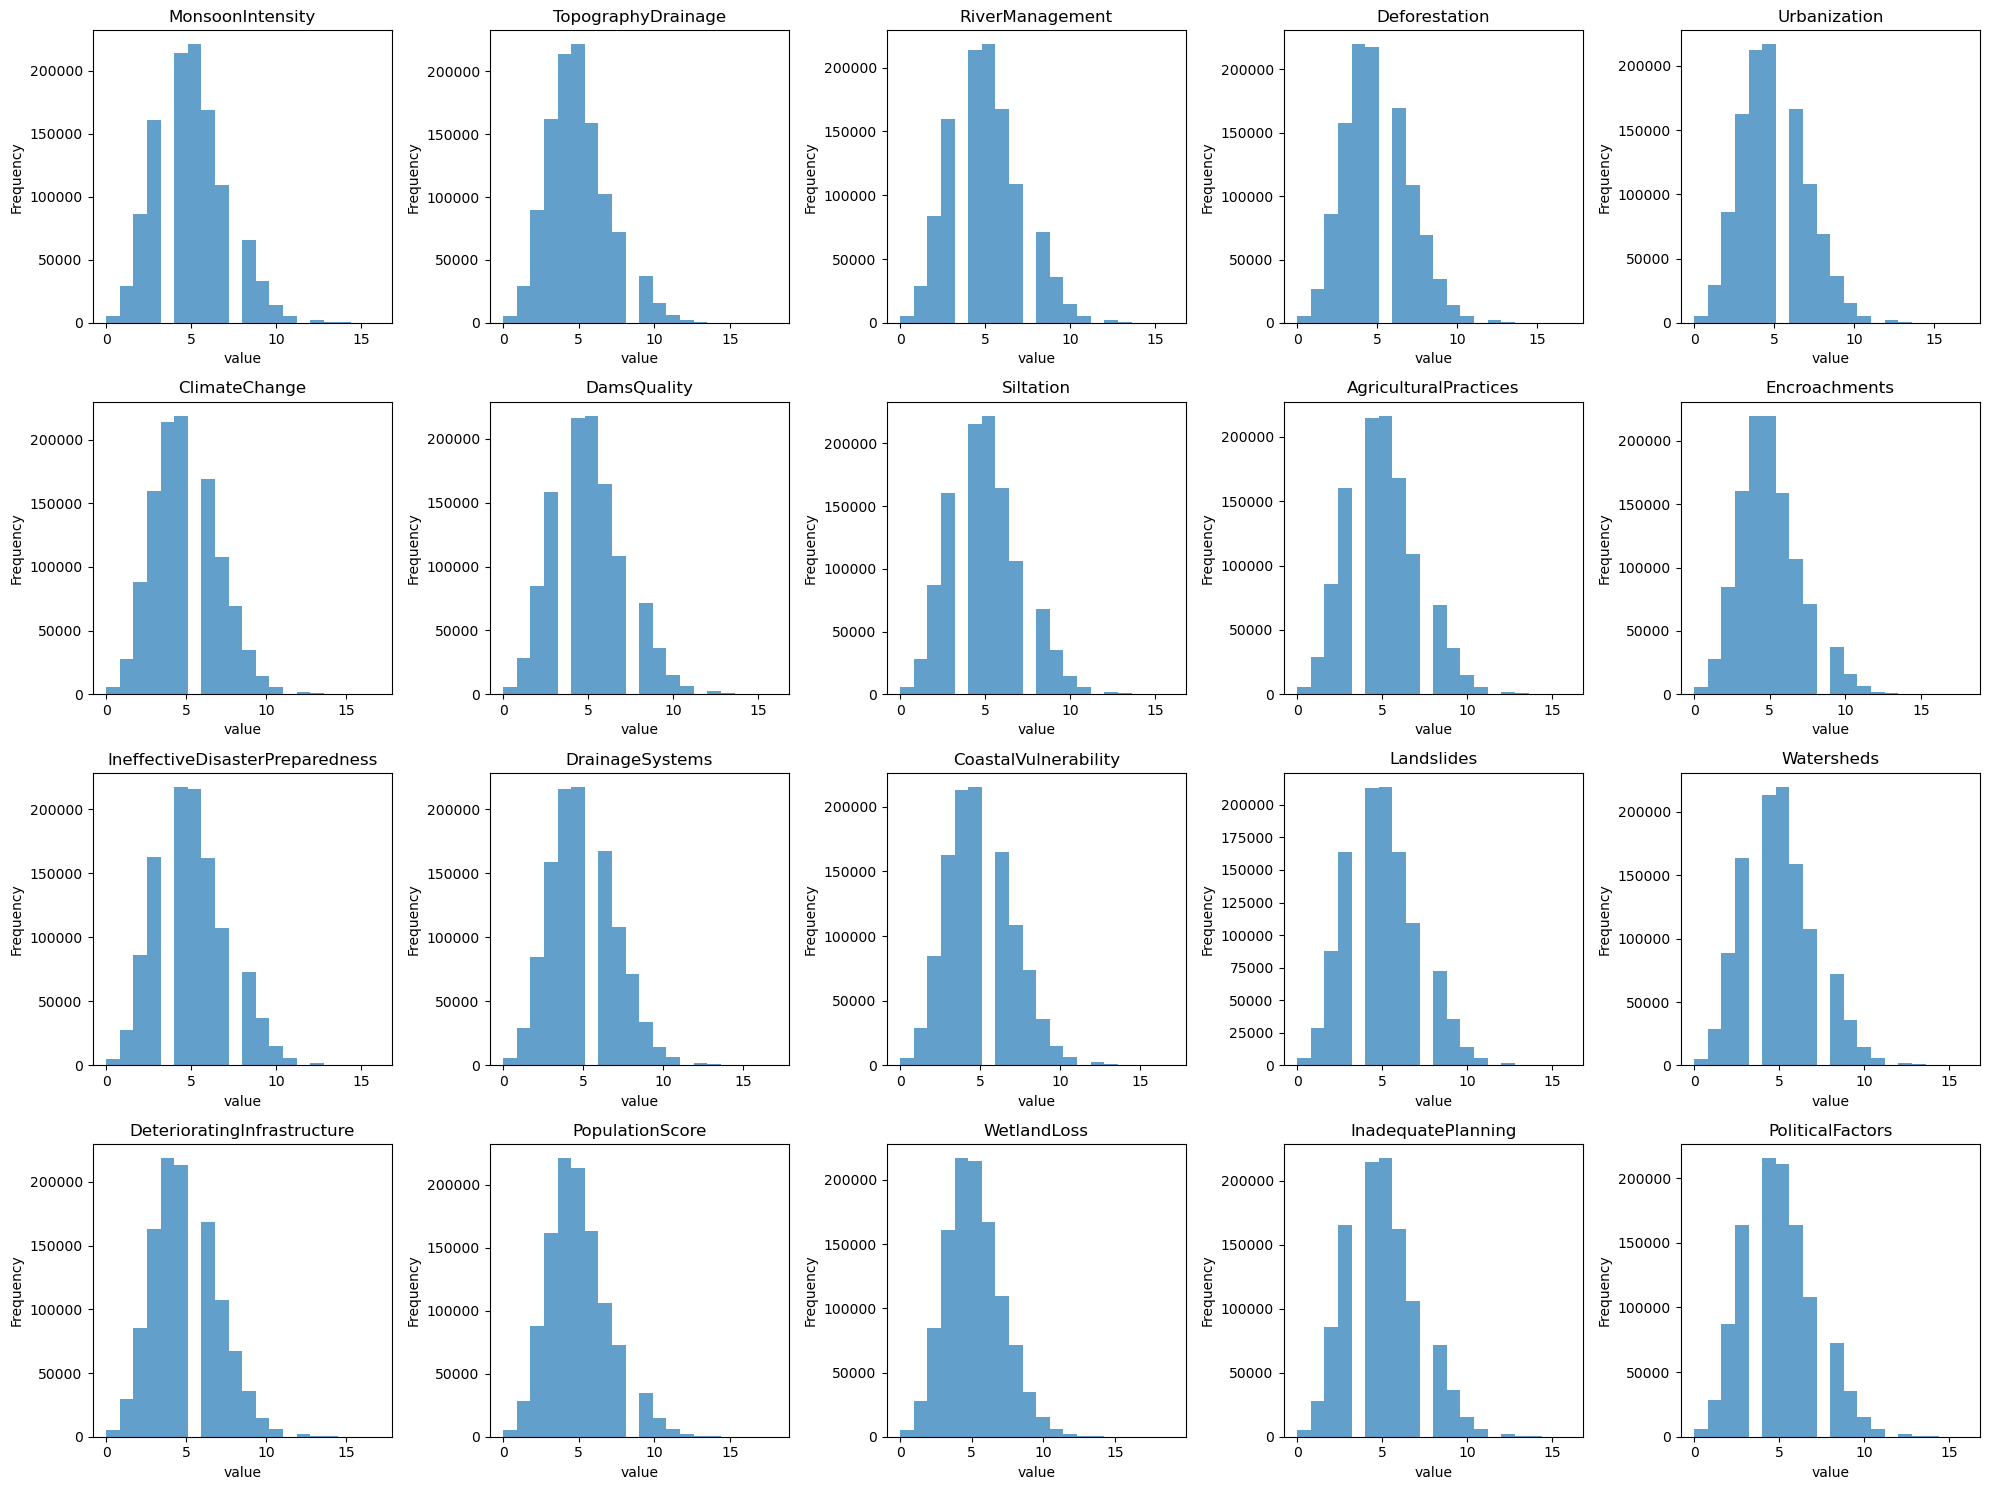

In [17]:
# calculate the number of row and columns for the subplots
import math
num_features = len(features)
num_rows = 4 
num_cols = math.ceil(num_features/num_rows)

# create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20,15))

#flatteb the axes if needed
if num_features > 1:
    axes = axes.flatten()
    
for i, columns in enumerate(features):
    axe = axes[i]
    axe.hist(train[columns], bins=20, alpha=0.7)
    axe.set_title(f'{columns}')
    axe.set_xlabel('value')
    axe.set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

## Density plot

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

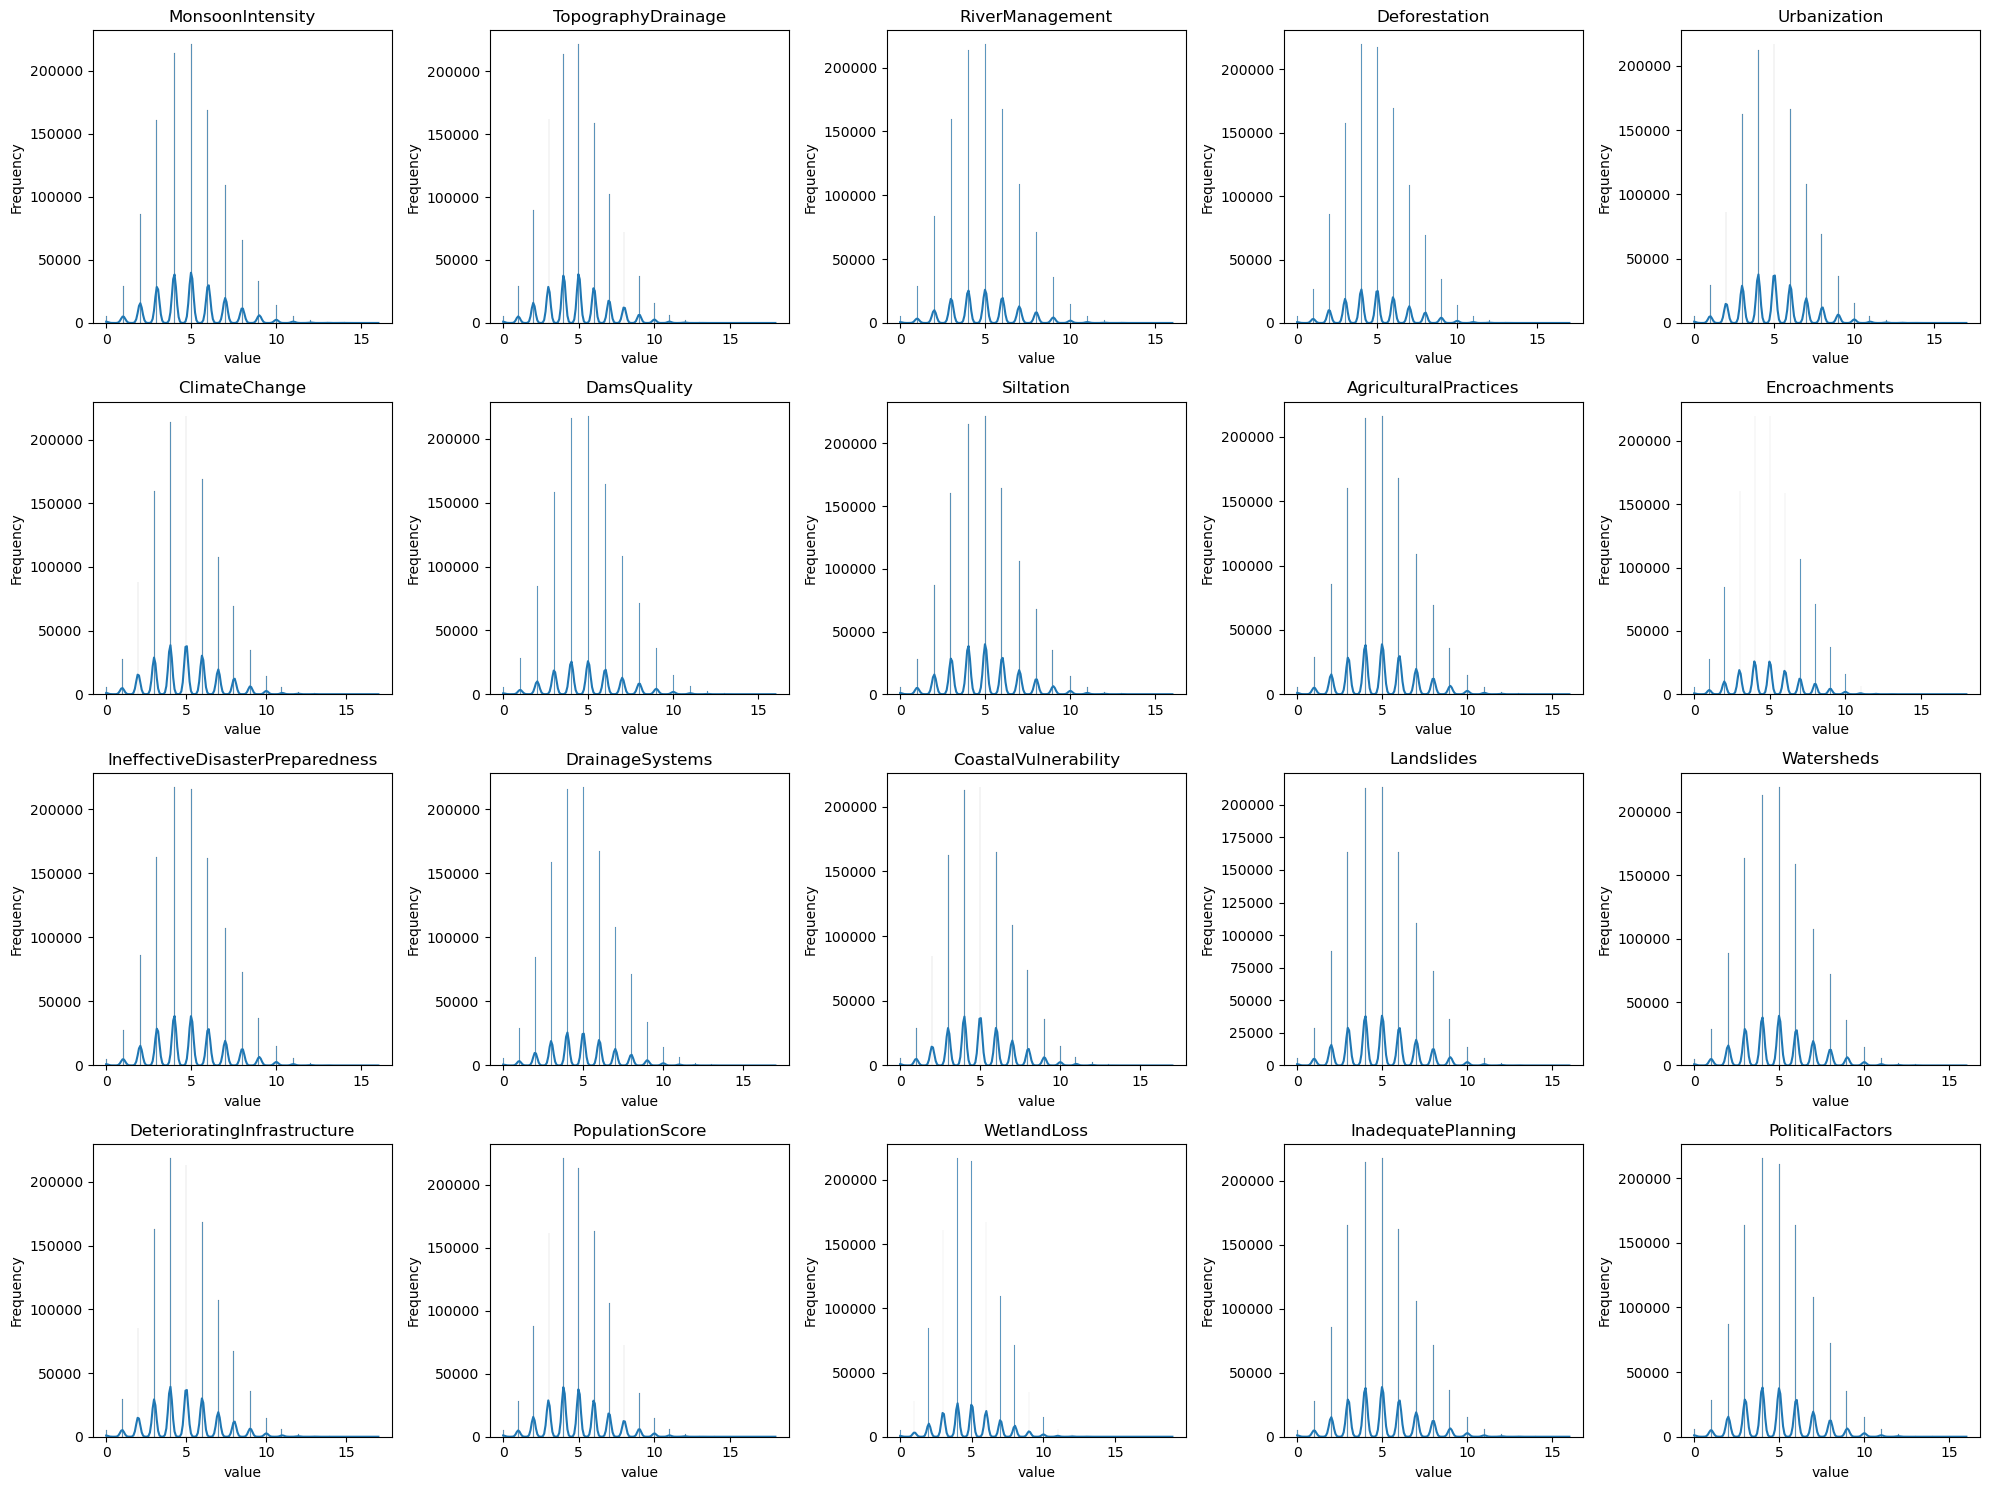

In [18]:
# calculate the number of row and columns for the subplots
import math
num_features = len(features)
num_rows = 4 
num_cols = math.ceil(num_features/num_rows)

# create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20,15))

#flatteb the axes if needed
if num_features > 1:
    axes = axes.flatten()
    
for i, columns in enumerate(features):
    axe = axes[i]
    sn.histplot(train[columns], alpha=0.7, kde=True, ax=axe)
    axe.set_title(f'{columns}')
    axe.set_xlabel('value')
    axe.set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

## Boxplot

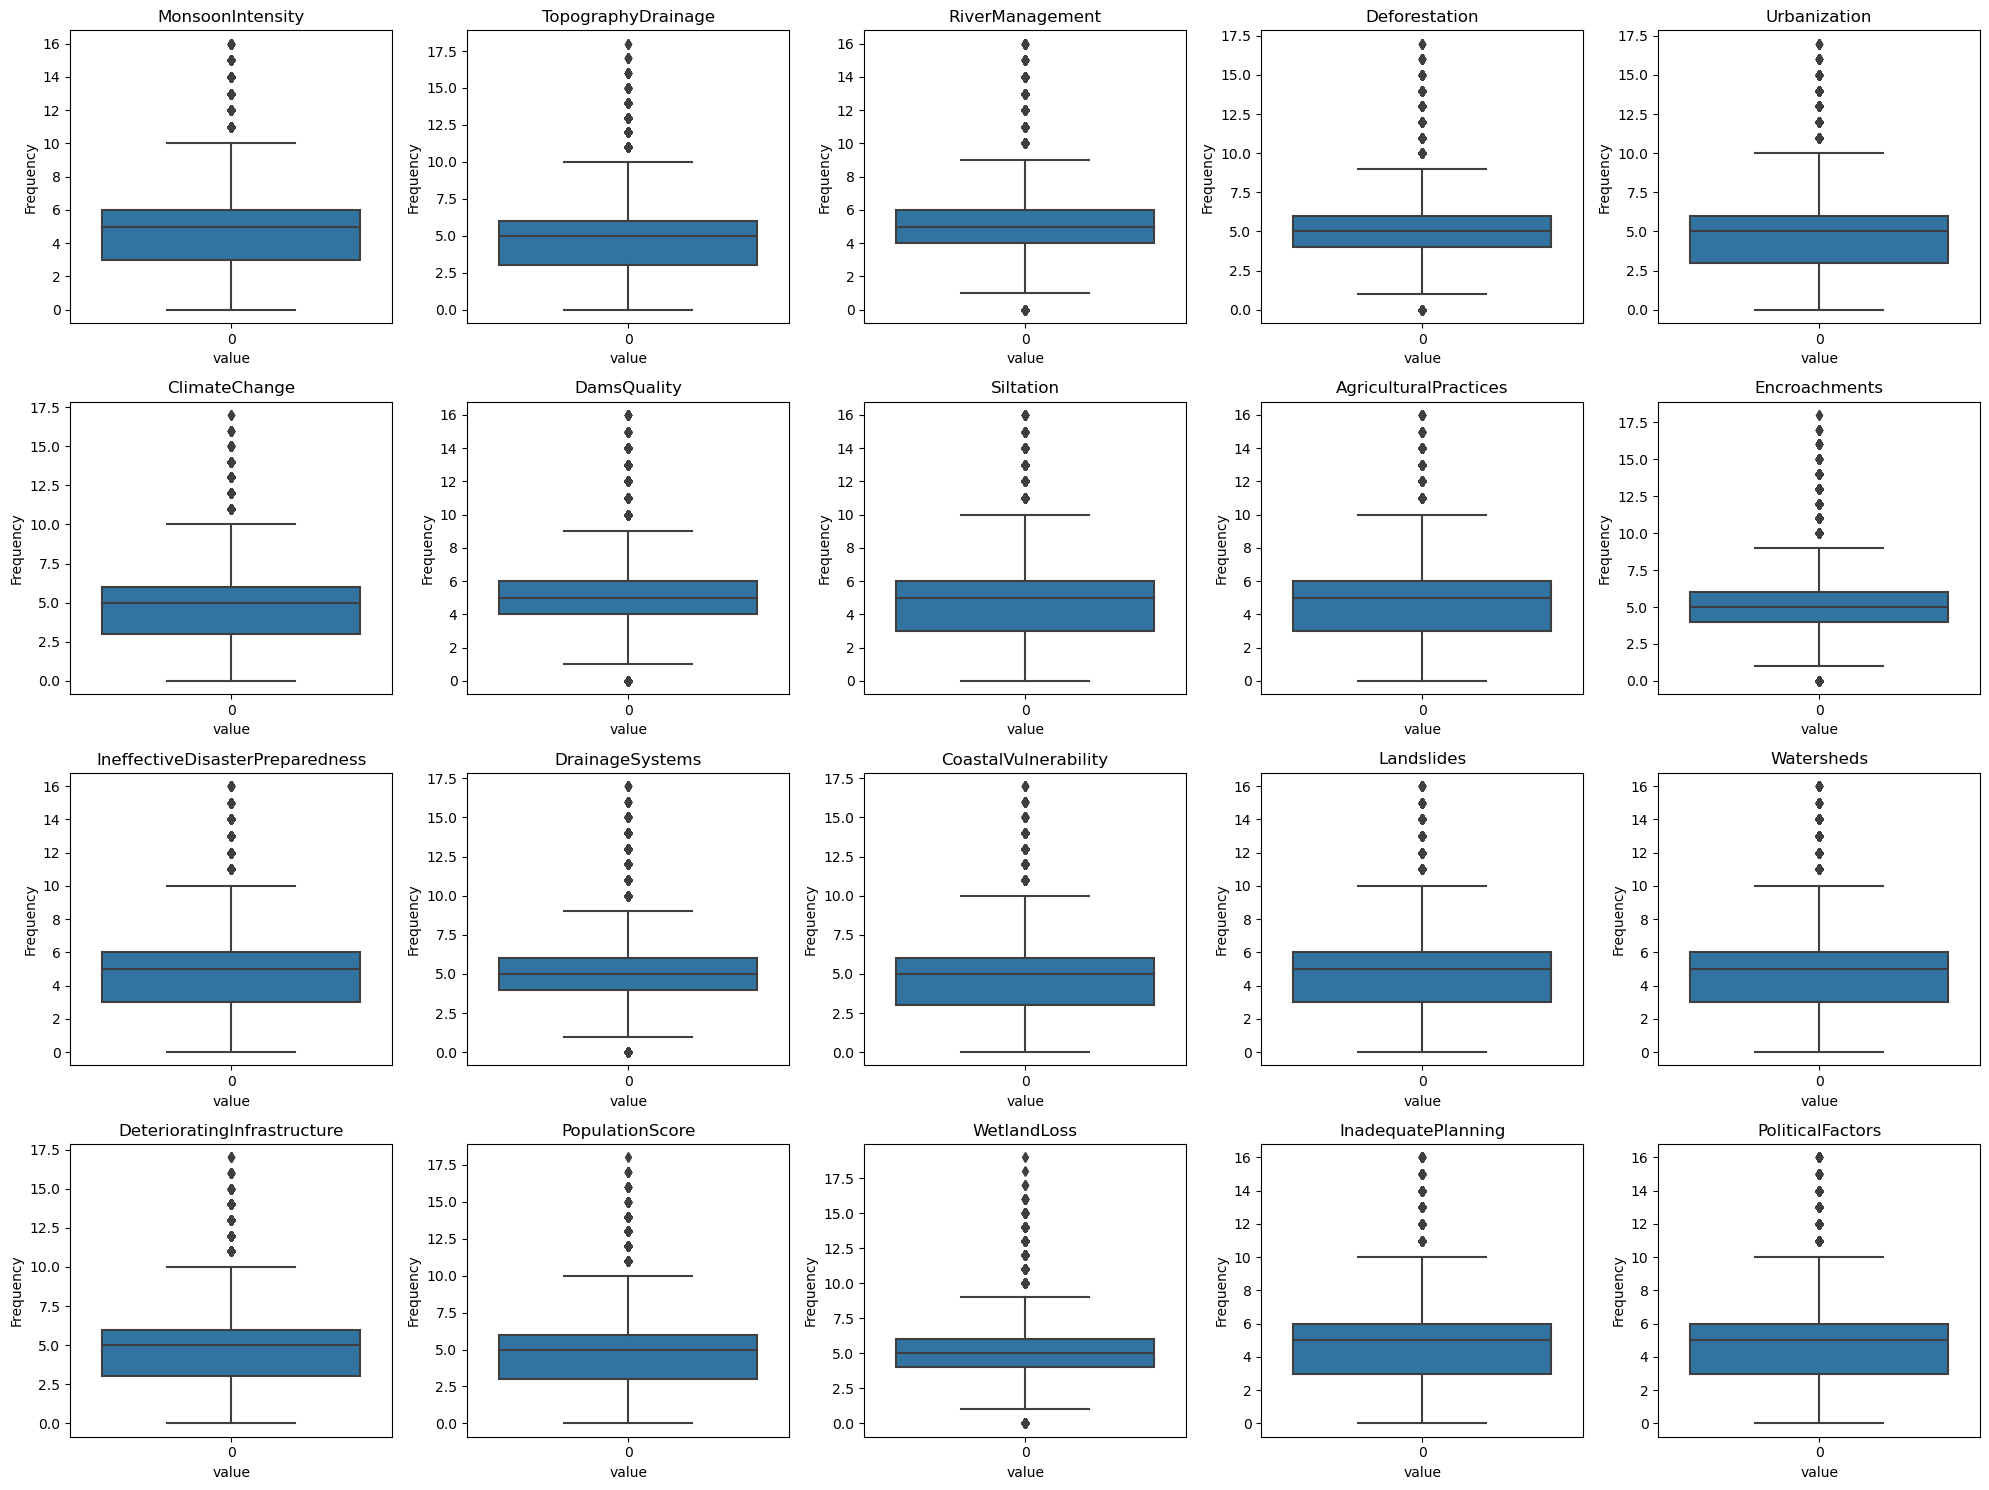

In [19]:
# calculate the number of row and columns for the subplots
import math
num_features = len(features)
num_rows = 4 
num_cols = math.ceil(num_features/num_rows)

# create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20,15))

#flatteb the axes if needed
if num_features > 1:
    axes = axes.flatten()
    
for i, columns in enumerate(features):
    axe = axes[i]
    sn.boxplot(train[columns], ax=axe)
    axe.set_title(f'{columns}')
    axe.set_xlabel('value')
    axe.set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

## Countplot

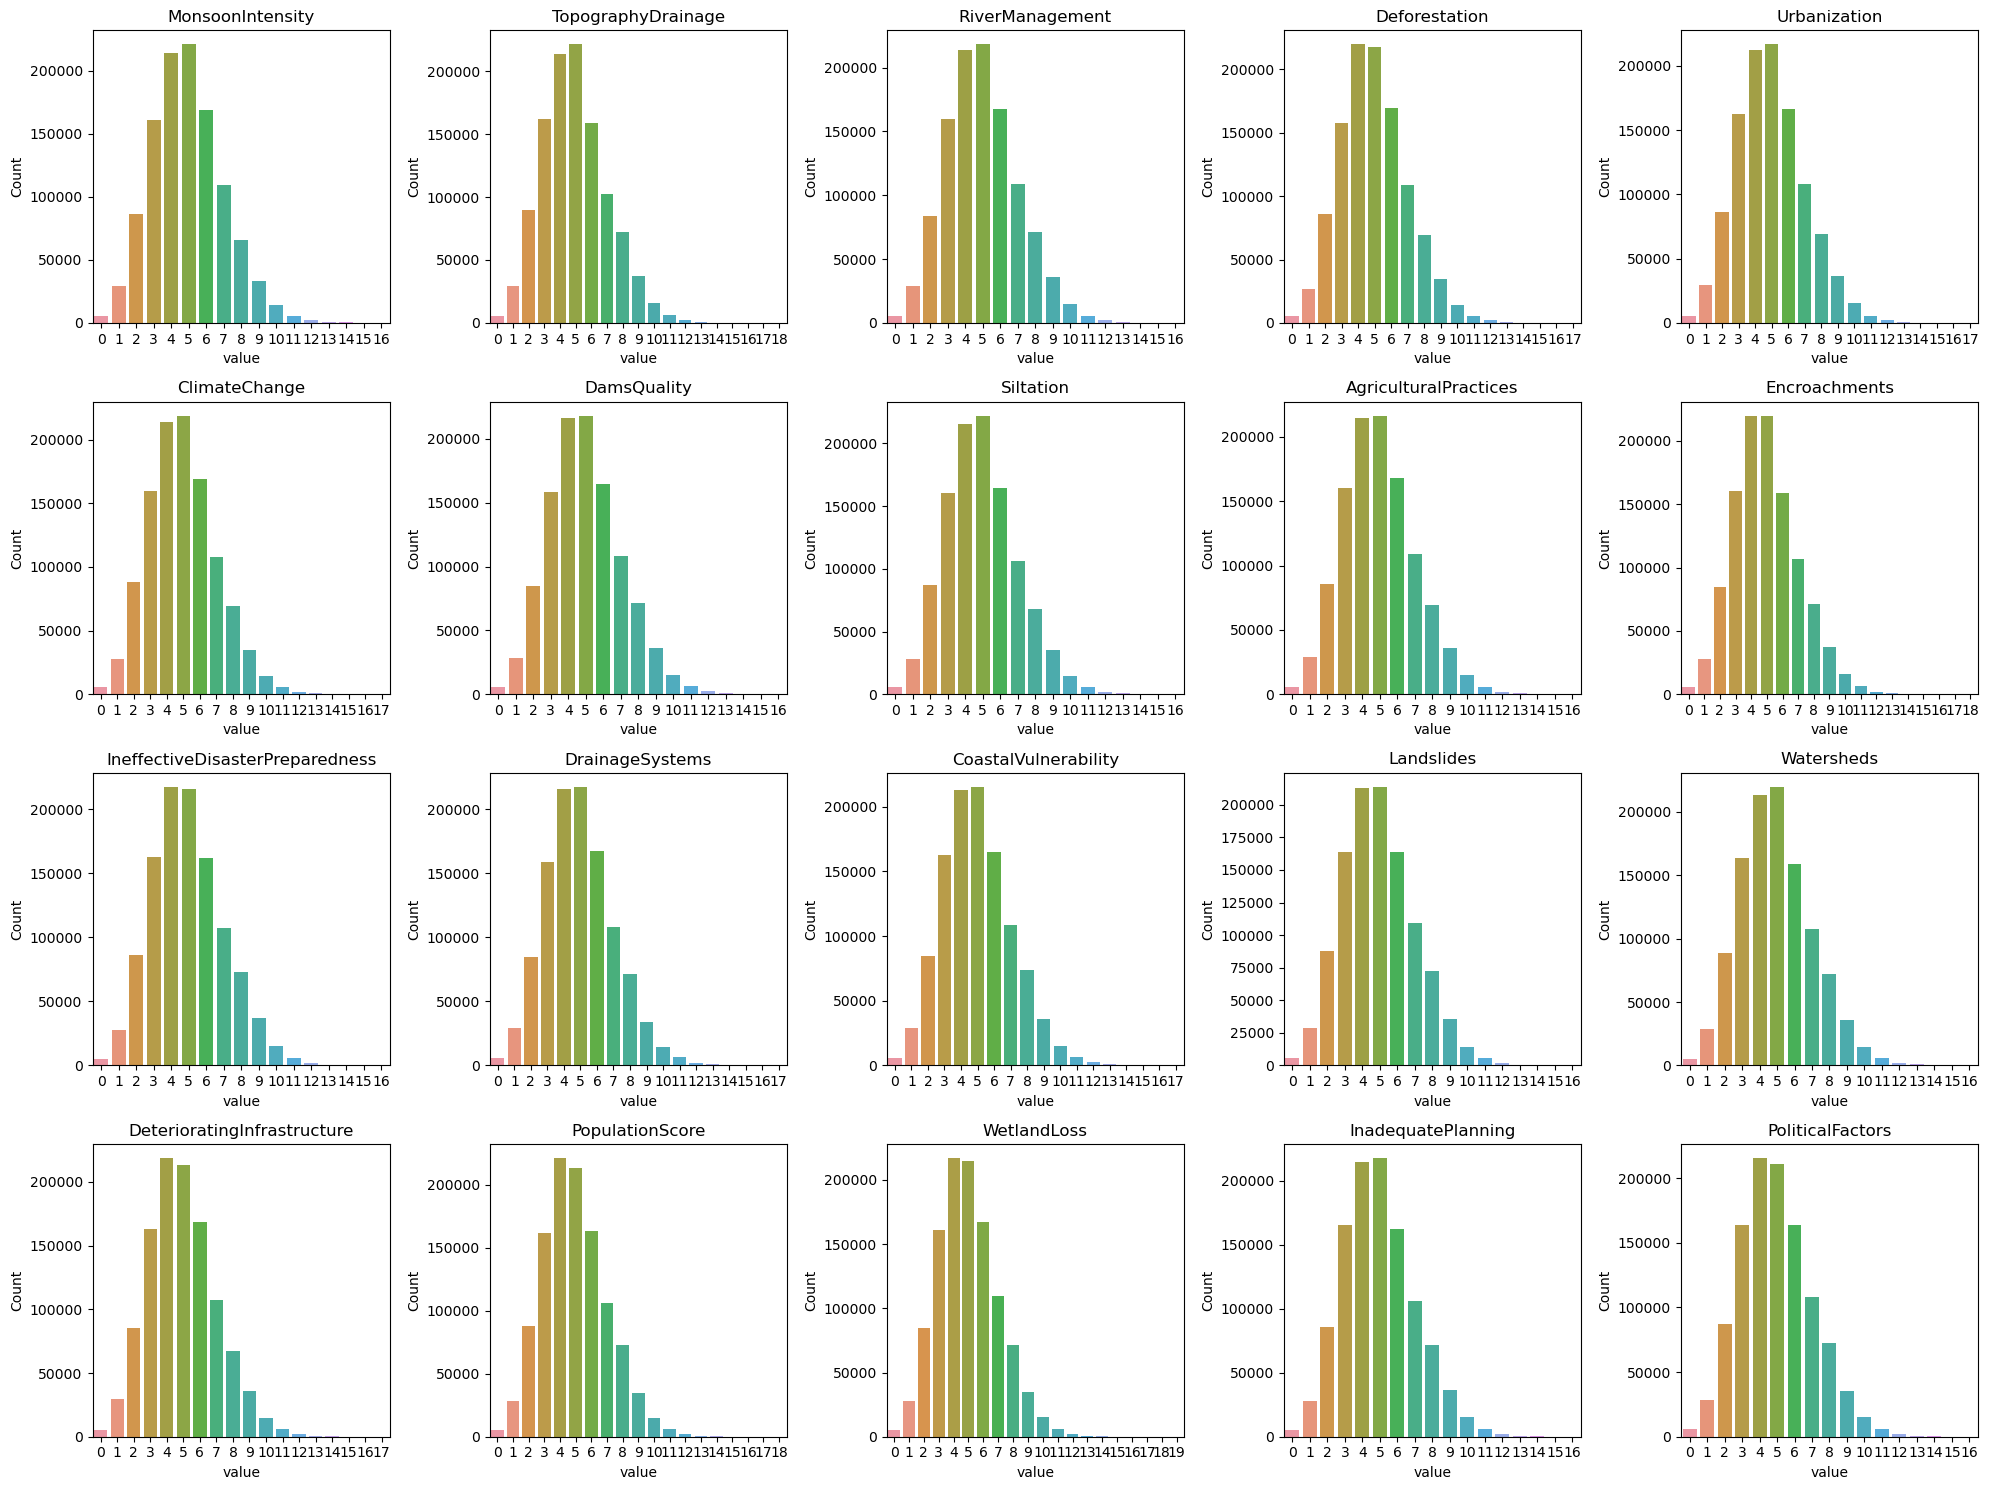

In [20]:
# calculate the number of row and columns for the subplots
import math
num_features = len(features)
num_rows = 4 
num_cols = math.ceil(num_features/num_rows)

# create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20,15))

#flatteb the axes if needed
if num_features > 1:
    axes = axes.flatten()
    
for i, columns in enumerate(features):
    axe = axes[i]
    sn.countplot(data=train, x=columns, ax=axe)
    axe.set_title(f'{columns}')
    axe.set_xlabel('value')
    axe.set_ylabel('Count')
    
plt.tight_layout()
plt.show()

## Heatmap

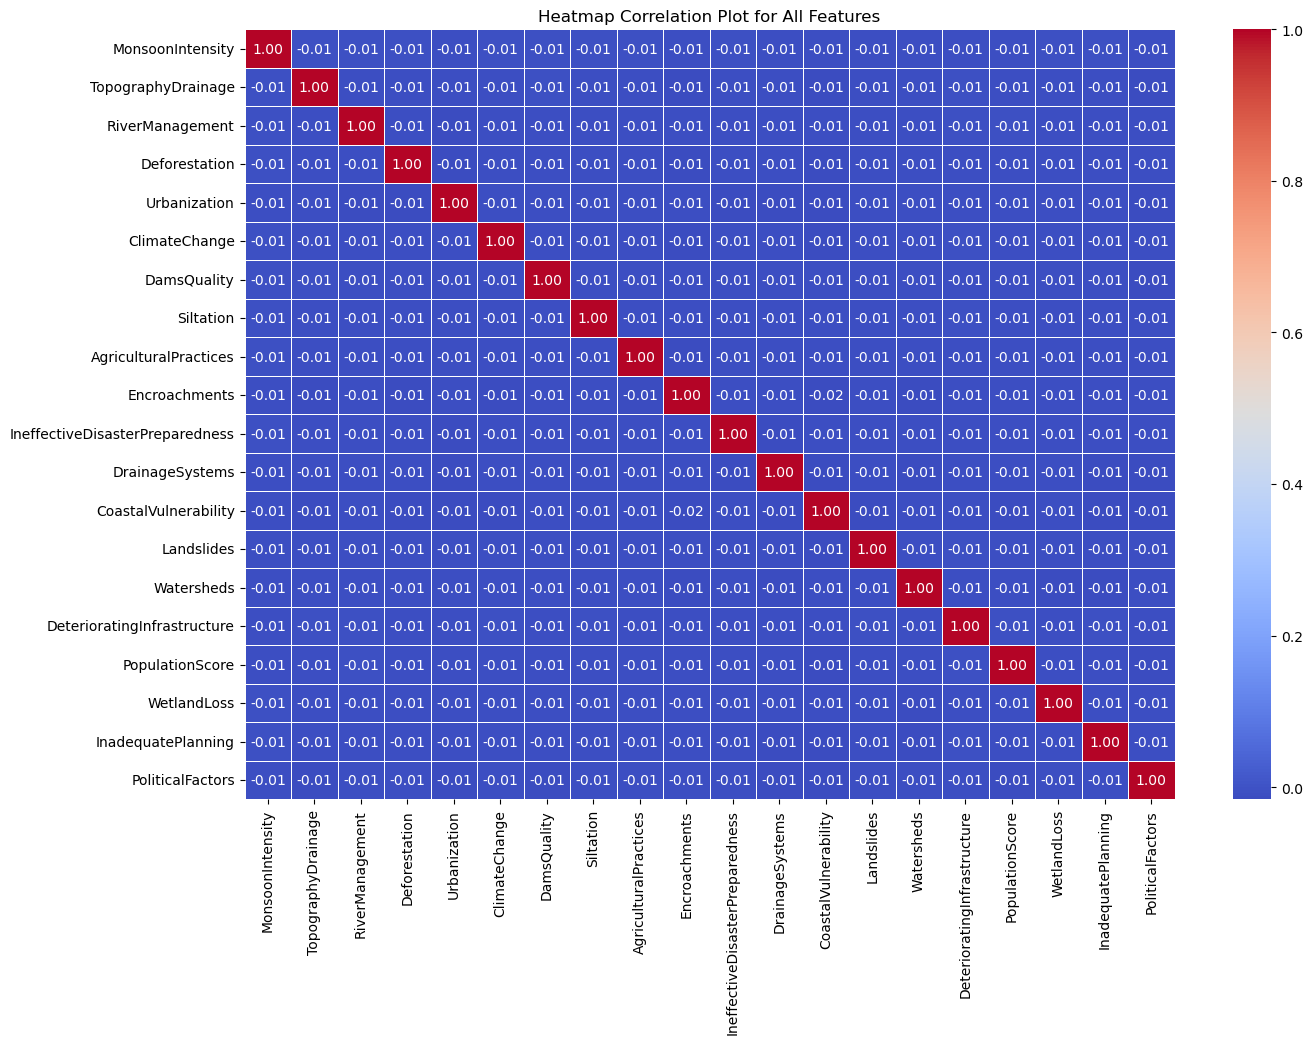

In [21]:
# Calculate the correlation matrix
correlation_matrix = train[features].corr()

#plot the heatmap correlation plot
plt.figure(figsize=(15,10))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Correlation Plot for All Features")
plt.show()

## Visualization Inference

* 1. There's no correlation between the features of the dataset
* 2. There's a lot of outliers flagged in the data.
* 3. The features of the data are really skewed, a lot of them appear between 2 and 10, so 11 to 19 are soon as outliers
* 4. There's no significant linear relation between the features and the target variable which is Flood Probability.

## Data Cleaning

In [22]:
#checking the number of non values
train.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [23]:
#There are no non values

In [24]:
#checking for duplcates
train.duplicated().sum()

0

In [25]:
#there are no duplicates

## Preprocessing

### We need to preprocess the features so it can be fit for our model, there are 4 different types of Preprocessing techiques, they are: Standard Scaler, MinMax Scaler, Roburst Scaler, Normalizer

In [26]:
# importing the various libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

In [27]:
# separating the features and the target variable
X = train.drop(columns=['id','FloodProbability'])
y = train['FloodProbability']

In [28]:
# scaling with standard scaler
scaler = StandardScaler()
X_scaled_SS = scaler.fit_transform(X)

# transforming in into a dataframe
X_scaled_SS = pd.DataFrame(X_scaled_SS, columns=X.columns)
X_scaled_SS.head()

MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0          0.038198            1.467769         0.021561       1.490363   
1          0.524488            0.990186        -0.461022      -0.459251   
2          0.524488            0.035021         0.504143       1.002959   
3         -0.934382           -0.442562         0.504143       0.028152   
4          0.038198           -0.920145        -1.426186       0.515556   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0      0.507578      -0.453941    -0.458881  -0.933107              -0.939124   
1      1.467552       1.489938    -0.938943   0.034951              -0.455692   
2     -0.932383       1.003968    -1.899068   0.034951              -0.455692   
3     -0.452396       1.489938    -0.458881   1.003010               0.511171   
4     -0.452396      -0.453941    -0.938943  -0.933107              -0.939124   

   Encroachments  IneffectiveDisasterPreparedness  DrainageSystems  \
0      -0.455632                        -1.417247         0.025627   
1       0.504372                         1.951149         0.990723   
2       0.024370                         0.507551         0.990723   
3       1.464377                         0.026351        -1.422018   
4      -0.935635                         0.026351        -1.422018   

   CoastalVulnerability  Landslides  Watersheds  DeterioratingInfrastructure  \
0             -0.935421   -0.929312    0.034080                    -0.448422   
1             -1.414142   -2.372809   -0.926353                     0.035884   
2             -0.935421    0.995351    0.034080                     0.520189   
3             -0.456700    0.995351   -0.446137                    -0.448422   
4             -1.414142    0.514185    0.514296                    -0.448422   

   PopulationScore  WetlandLoss  InadequatePlanning  PoliticalFactors  
0         0.999183     0.023754            0.989569         -0.927598  
1        -0.929294    -0.943039           -0.451962         -0.927598  
2         1.481302    -1.426435           -0.932472         -0.927598  
3         0.517064     0.023754            0.989569          0.029180  
4        -1.893533    -1.426435           -0.932472          0.029180

In [29]:
#checking the statistical description
X_scaled_SS.describe()

MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
count      1.117957e+06        1.117957e+06     1.117957e+06   1.117957e+06   
mean      -1.661387e-16        1.552704e-16    -4.782048e-17   1.598433e-16   
std        1.000000e+00        1.000000e+00     1.000000e+00   1.000000e+00   
min       -2.393253e+00       -2.352893e+00    -2.391351e+00  -2.408865e+00   
25%       -9.343824e-01       -9.201446e-01    -4.610215e-01  -4.592511e-01   
50%        3.819786e-02        3.502080e-02     2.156078e-02   2.815234e-02   
75%        5.244880e-01        5.126035e-01     5.041431e-01   5.155557e-01   
max        5.387389e+00        6.243596e+00     5.329966e+00   5.876993e+00   

       Urbanization  ClimateChange   DamsQuality     Siltation  \
count  1.117957e+06   1.117957e+06  1.117957e+06  1.117957e+06   
mean  -1.704923e-16  -1.904715e-16 -2.444031e-16 -1.143840e-16   
std    1.000000e+00   1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.372343e+00  -2.397820e+00 -2.379131e+00 -2.385195e+00   
25%   -9.323826e-01  -9.399109e-01 -4.588810e-01 -9.331071e-01   
50%    2.759129e-02   3.202873e-02  2.118153e-02  3.495146e-02   
75%    5.075782e-01   5.179985e-01  5.012440e-01  5.189807e-01   
max    5.787435e+00   5.863667e+00  5.301869e+00  5.359273e+00   

       AgriculturalPractices  Encroachments  IneffectiveDisasterPreparedness  \
count           1.117957e+06   1.117957e+06                     1.117957e+06   
mean            9.081696e-17  -1.190364e-16                    -1.781573e-16   
std             1.000000e+00   1.000000e+00                     1.000000e+00   
min            -2.389419e+00  -2.375642e+00                    -2.379647e+00   
25%            -9.391240e-01  -4.556324e-01                    -9.360479e-01   
50%             2.773959e-02   2.436986e-02                     2.635121e-02   
75%             5.111714e-01   5.043722e-01                     5.075508e-01   
max             5.345489e+00   6.264400e+00                     5.319546e+00   

       DrainageSystems  CoastalVulnerability    Landslides    Watersheds  \
count     1.117957e+06          1.117957e+06  1.117957e+06  1.117957e+06   
mean      1.149941e-16         -1.470969e-16  1.547619e-17 -4.965569e-17   
std       1.000000e+00          1.000000e+00  1.000000e+00  1.000000e+00   
min      -2.387114e+00         -2.371585e+00 -2.372809e+00 -2.367003e+00   
25%      -4.569216e-01         -9.354211e-01 -9.293119e-01 -9.263532e-01   
50%       2.562654e-02          2.202160e-02  3.301966e-02  3.407994e-02   
75%       5.081747e-01          5.007429e-01  5.141854e-01  5.142965e-01   
max       5.816204e+00          5.766678e+00  5.325843e+00  5.316462e+00   

       DeterioratingInfrastructure  PopulationScore   WetlandLoss  \
count                 1.117957e+06     1.117957e+06  1.117957e+06   
mean                  4.759803e-17     4.715948e-17 -1.882629e-16   
std                   1.000000e+00     1.000000e+00  1.000000e+00   
min                  -2.385644e+00    -2.375652e+00 -2.393228e+00   
25%                  -9.327275e-01    -9.292944e-01 -4.596422e-01   
50%                   3.588375e-02     3.494421e-02  2.375436e-02   
75%                   5.201894e-01     5.170635e-01  5.071509e-01   
max                   5.847551e+00     6.302495e+00  6.791306e+00   

       InadequatePlanning  PoliticalFactors  
count        1.117957e+06      1.117957e+06  
mean        -1.344236e-18      1.943454e-16  
std          1.000000e+00      1.000000e+00  
min         -2.374002e+00     -2.362765e+00  
25%         -9.324716e-01     -9.275981e-01  
50%          2.854847e-02      2.917986e-02  
75%          5.090585e-01      5.075688e-01  
max          5.314159e+00      5.291459e+00

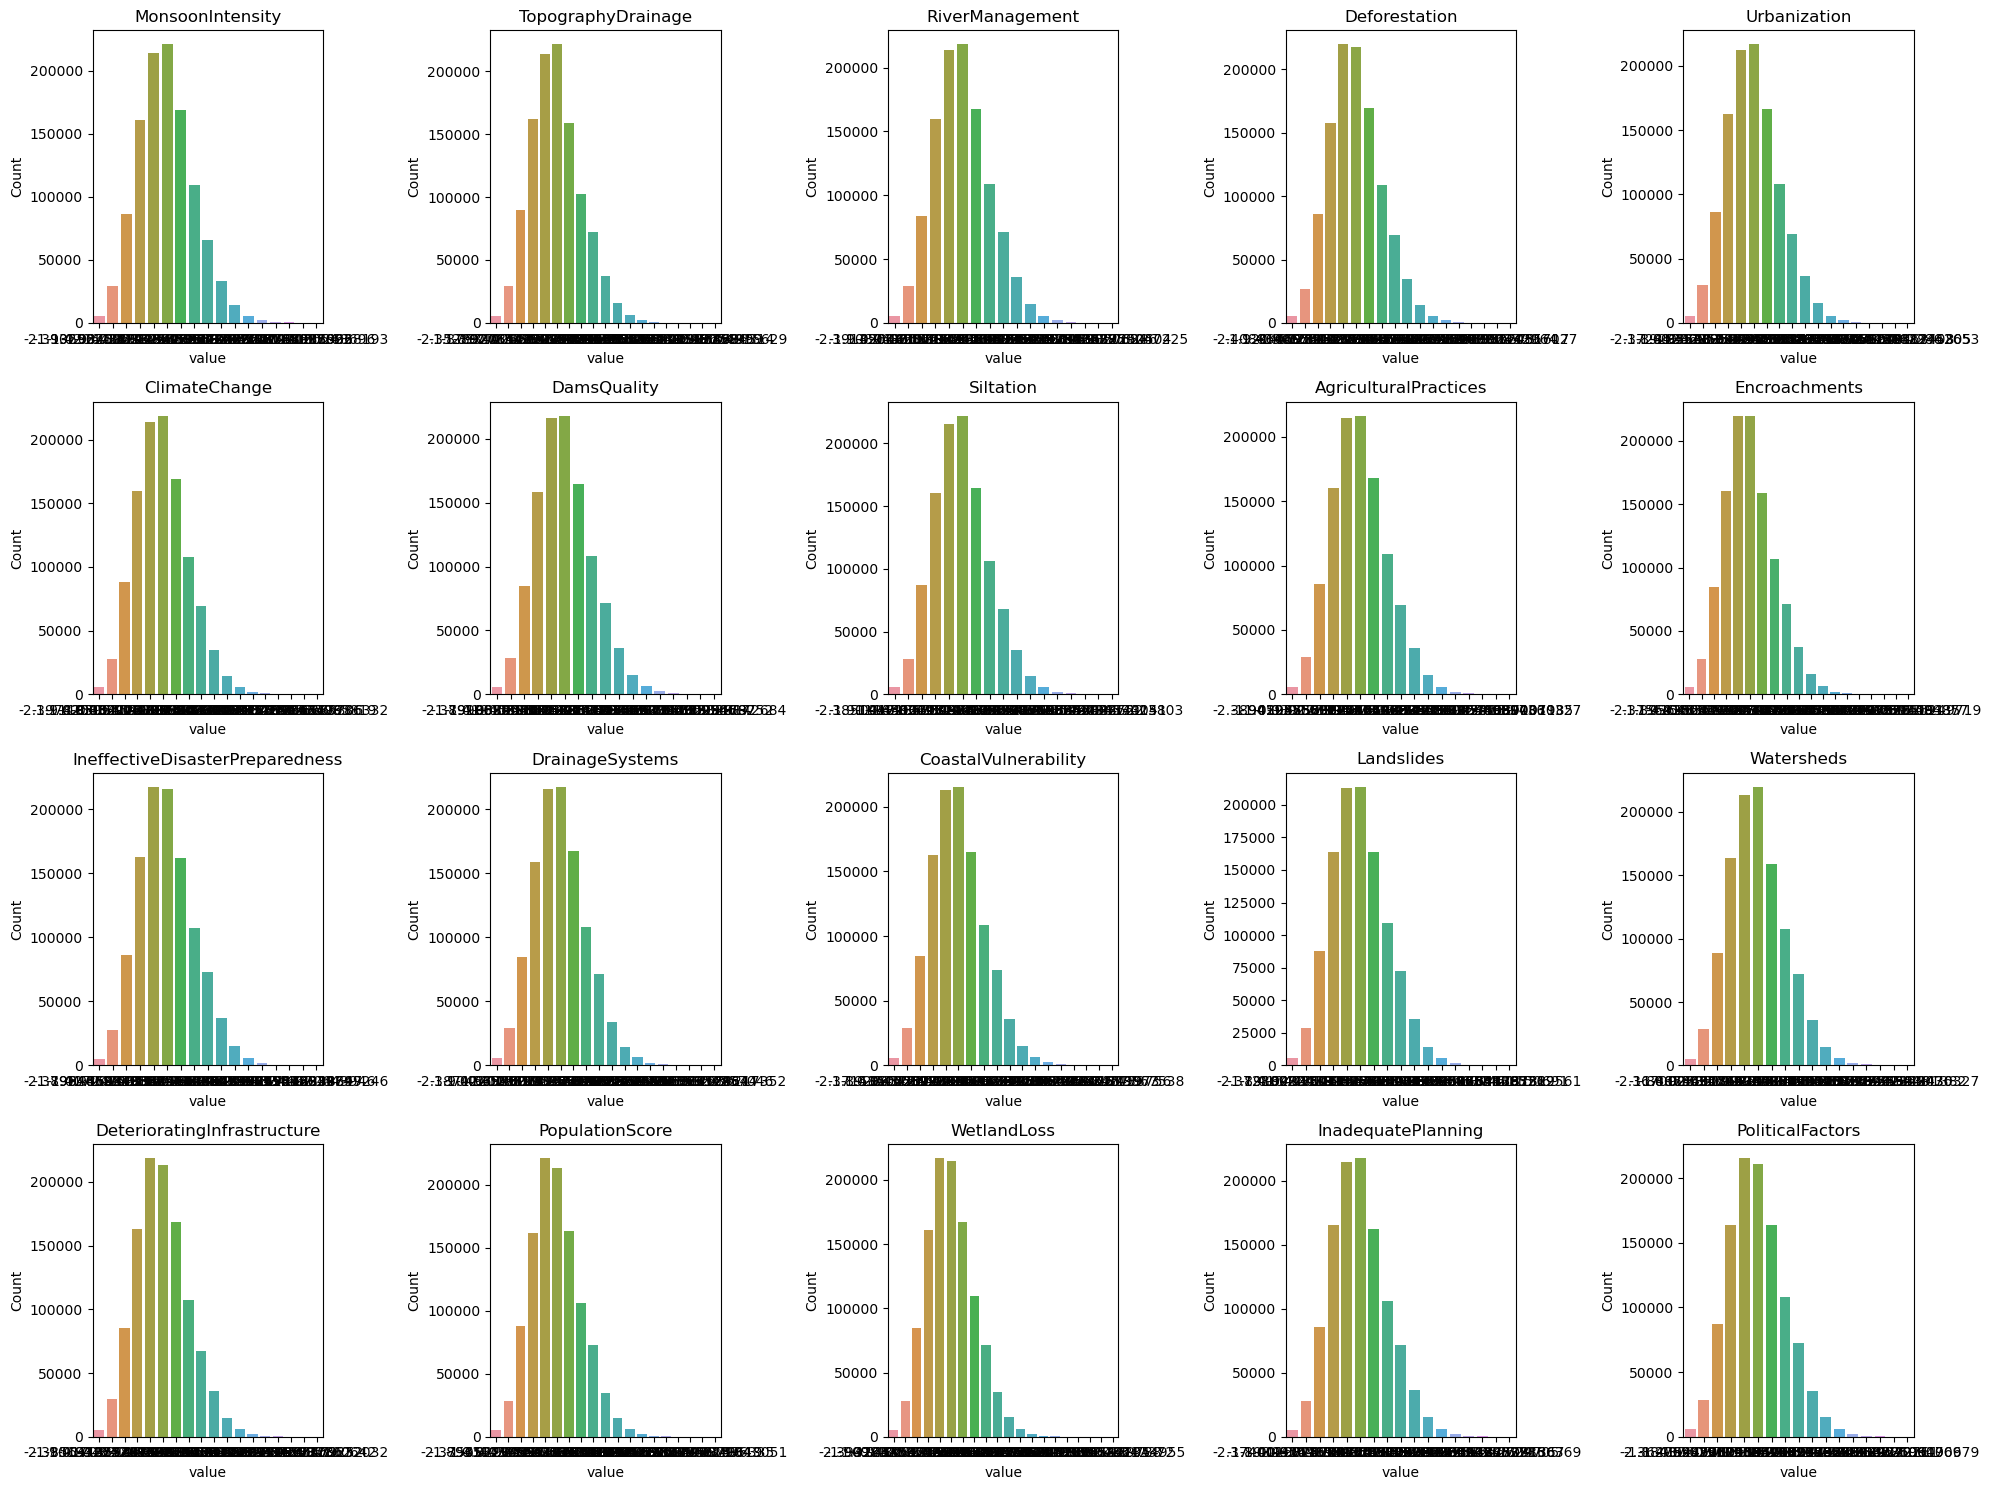

In [30]:
# visualizing the scaled with count plot
# calculate the number of row and columns for the subplots
import math
num_features = len(features)
num_rows = 4 
num_cols = math.ceil(num_features/num_rows)

# create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20,15))

#flatteb the axes if needed
if num_features > 1:
    axes = axes.flatten()
    
for i, columns in enumerate(features):
    axe = axes[i]
    sn.countplot(data=X_scaled_SS, x=columns, ax=axe)
    axe.set_title(f'{columns}')
    axe.set_xlabel('value')
    axe.set_ylabel('Count')
    
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'MonsoonIntensity'}>,
        <Axes: title={'center': 'TopographyDrainage'}>,
        <Axes: title={'center': 'RiverManagement'}>,
        <Axes: title={'center': 'Deforestation'}>],
       [<Axes: title={'center': 'Urbanization'}>,
        <Axes: title={'center': 'ClimateChange'}>,
        <Axes: title={'center': 'DamsQuality'}>,
        <Axes: title={'center': 'Siltation'}>],
       [<Axes: title={'center': 'AgriculturalPractices'}>,
        <Axes: title={'center': 'Encroachments'}>,
        <Axes: title={'center': 'IneffectiveDisasterPreparedness'}>,
        <Axes: title={'center': 'DrainageSystems'}>],
       [<Axes: title={'center': 'CoastalVulnerability'}>,
        <Axes: title={'center': 'Landslides'}>,
        <Axes: title={'center': 'Watersheds'}>,
        <Axes: title={'center': 'DeterioratingInfrastructure'}>],
       [<Axes: title={'center': 'PopulationScore'}>,
        <Axes: title={'center': 'WetlandLoss'}>,
        <Axes: title={'center': 

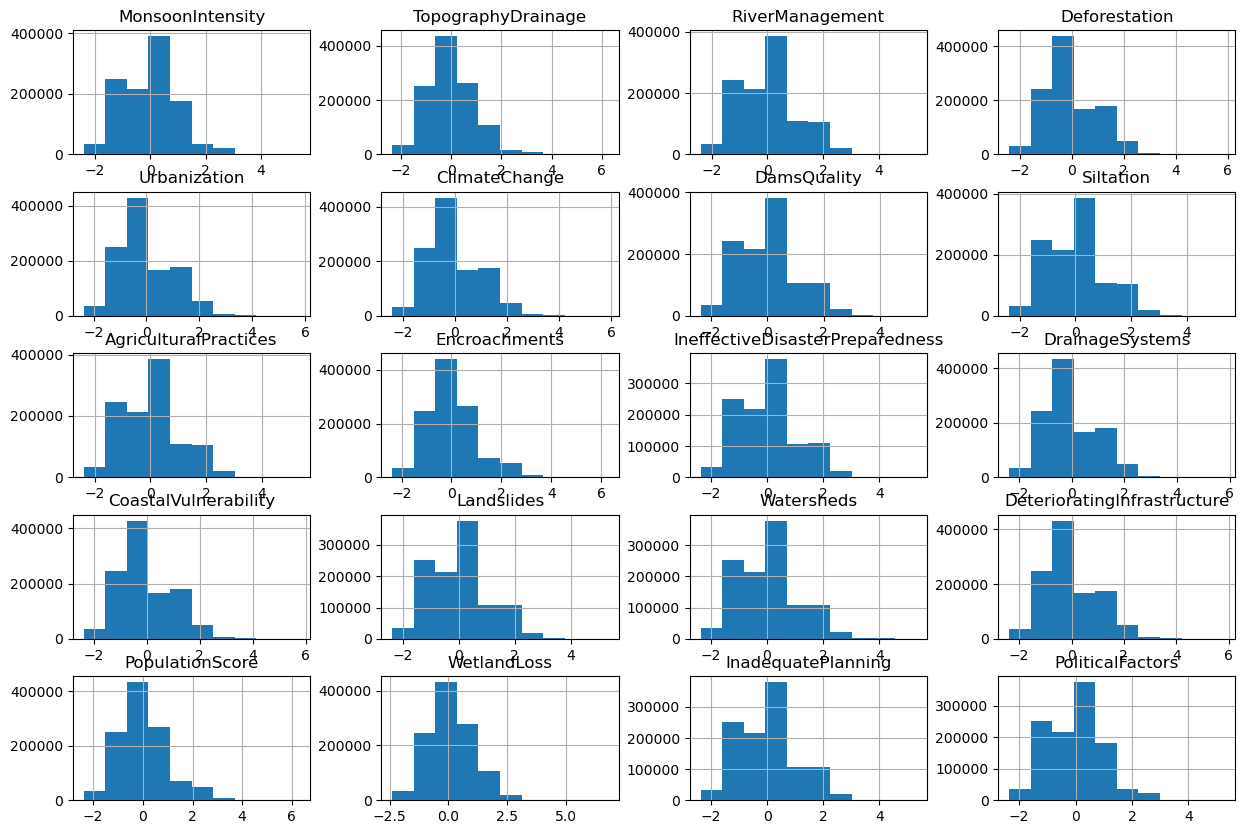

In [31]:
# visualizing the scaled with histogram
X_scaled_SS.hist(figsize=(15,10))

In [32]:
# scaling with MinMax Scaler
scaler = MinMaxScaler()
X_scaled_MinMax = scaler.fit_transform(X)

# converting into dataframe
X_scaled_MinMax = pd.DataFrame(X_scaled_MinMax, columns=X.columns)
X_scaled_MinMax.head()

MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0            0.3125            0.444444           0.3125       0.470588   
1            0.3750            0.388889           0.2500       0.235294   
2            0.3750            0.277778           0.3750       0.411765   
3            0.1875            0.222222           0.3750       0.294118   
4            0.3125            0.166667           0.1250       0.352941   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0      0.352941       0.235294       0.2500     0.1875                 0.1875   
1      0.470588       0.470588       0.1875     0.3125                 0.2500   
2      0.176471       0.411765       0.0625     0.3125                 0.2500   
3      0.235294       0.470588       0.2500     0.4375                 0.3750   
4      0.235294       0.235294       0.1875     0.1875                 0.1875   

   Encroachments  IneffectiveDisasterPreparedness  DrainageSystems  \
0       0.222222                           0.1250         0.294118   
1       0.333333                           0.5625         0.411765   
2       0.277778                           0.3750         0.411765   
3       0.444444                           0.3125         0.117647   
4       0.166667                           0.3125         0.117647   

   CoastalVulnerability  Landslides  Watersheds  DeterioratingInfrastructure  \
0              0.176471      0.1875      0.3125                     0.235294   
1              0.117647      0.0000      0.1875                     0.294118   
2              0.176471      0.4375      0.3125                     0.352941   
3              0.235294      0.4375      0.2500                     0.235294   
4              0.117647      0.3750      0.3750                     0.235294   

   PopulationScore  WetlandLoss  InadequatePlanning  PoliticalFactors  
0         0.388889     0.263158              0.4375            0.1875  
1         0.166667     0.157895              0.2500            0.1875  
2         0.444444     0.105263              0.1875            0.1875  
3         0.333333     0.263158              0.4375            0.3125  
4         0.055556     0.105263              0.1875            0.3125

In [33]:
#checking the descriptive statistics of the scaled
X_scaled_MinMax.describe()

MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
count      1.117957e+06        1.117957e+06     1.117957e+06   1.117957e+06   
mean       3.075907e-01        2.737039e-01     3.097076e-01   2.907200e-01   
std        1.285242e-01        1.163266e-01     1.295117e-01   1.206876e-01   
min        0.000000e+00        0.000000e+00     0.000000e+00   0.000000e+00   
25%        1.875000e-01        1.666667e-01     2.500000e-01   2.352941e-01   
50%        3.125000e-01        2.777778e-01     3.125000e-01   2.941176e-01   
75%        3.750000e-01        3.333333e-01     3.750000e-01   3.529412e-01   
max        1.000000e+00        1.000000e+00     1.000000e+00   1.000000e+00   

       Urbanization  ClimateChange   DamsQuality     Siltation  \
count  1.117957e+06   1.117957e+06  1.117957e+06  1.117957e+06   
mean   2.907363e-01   2.902408e-01  3.097423e-01  3.079869e-01   
std    1.225524e-01   1.210436e-01  1.301914e-01  1.291245e-01   
min    0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.764706e-01   1.764706e-01  2.500000e-01  1.875000e-01   
50%    2.941176e-01   2.941176e-01  3.125000e-01  3.125000e-01   
75%    3.529412e-01   3.529412e-01  3.750000e-01  3.750000e-01   
max    1.000000e+00   1.000000e+00  1.000000e+00  1.000000e+00   

       AgriculturalPractices  Encroachments  IneffectiveDisasterPreparedness  \
count           1.117957e+06   1.117957e+06                     1.117957e+06   
mean            3.089137e-01   2.749572e-01                     3.090774e-01   
std             1.292841e-01   1.157402e-01                     1.298838e-01   
min             0.000000e+00   0.000000e+00                     0.000000e+00   
25%             1.875000e-01   2.222222e-01                     1.875000e-01   
50%             3.125000e-01   2.777778e-01                     3.125000e-01   
75%             3.750000e-01   3.333333e-01                     3.750000e-01   
max             1.000000e+00   1.000000e+00                     1.000000e+00   

       DrainageSystems  CoastalVulnerability    Landslides    Watersheds  \
count     1.117957e+06          1.117957e+06  1.117957e+06  1.117957e+06   
mean      2.909937e-01          2.914117e-01  3.082110e-01  3.080645e-01   
std       1.219019e-01          1.228764e-01  1.298929e-01  1.301497e-01   
min       0.000000e+00          0.000000e+00  0.000000e+00  0.000000e+00   
25%       2.352941e-01          1.764706e-01  1.875000e-01  1.875000e-01   
50%       2.941176e-01          2.941176e-01  3.125000e-01  3.125000e-01   
75%       3.529412e-01          3.529412e-01  3.750000e-01  3.750000e-01   
max       1.000000e+00          1.000000e+00  1.000000e+00  1.000000e+00   

       DeterioratingInfrastructure  PopulationScore   WetlandLoss  \
count                 1.117957e+06     1.117957e+06  1.117957e+06   
mean                  2.897592e-01     2.737511e-01  2.605716e-01   
std                   1.214596e-01     1.152320e-01  1.088787e-01   
min                   0.000000e+00     0.000000e+00  0.000000e+00   
25%                   1.764706e-01     1.666667e-01  2.105263e-01   
50%                   2.941176e-01     2.777778e-01  2.631579e-01   
75%                   3.529412e-01     3.333333e-01  3.157895e-01   
max                   1.000000e+00     1.000000e+00  1.000000e+00   

       InadequatePlanning  PoliticalFactors  
count        1.117957e+06      1.117957e+06  
mean         3.087867e-01      3.086877e-01  
std          1.300702e-01      1.306469e-01  
min          0.000000e+00      0.000000e+00  
25%          1.875000e-01      1.875000e-01  
50%          3.125000e-01      3.125000e-01  
75%          3.750000e-01      3.750000e-01  
max          1.000000e+00      1.000000e+00

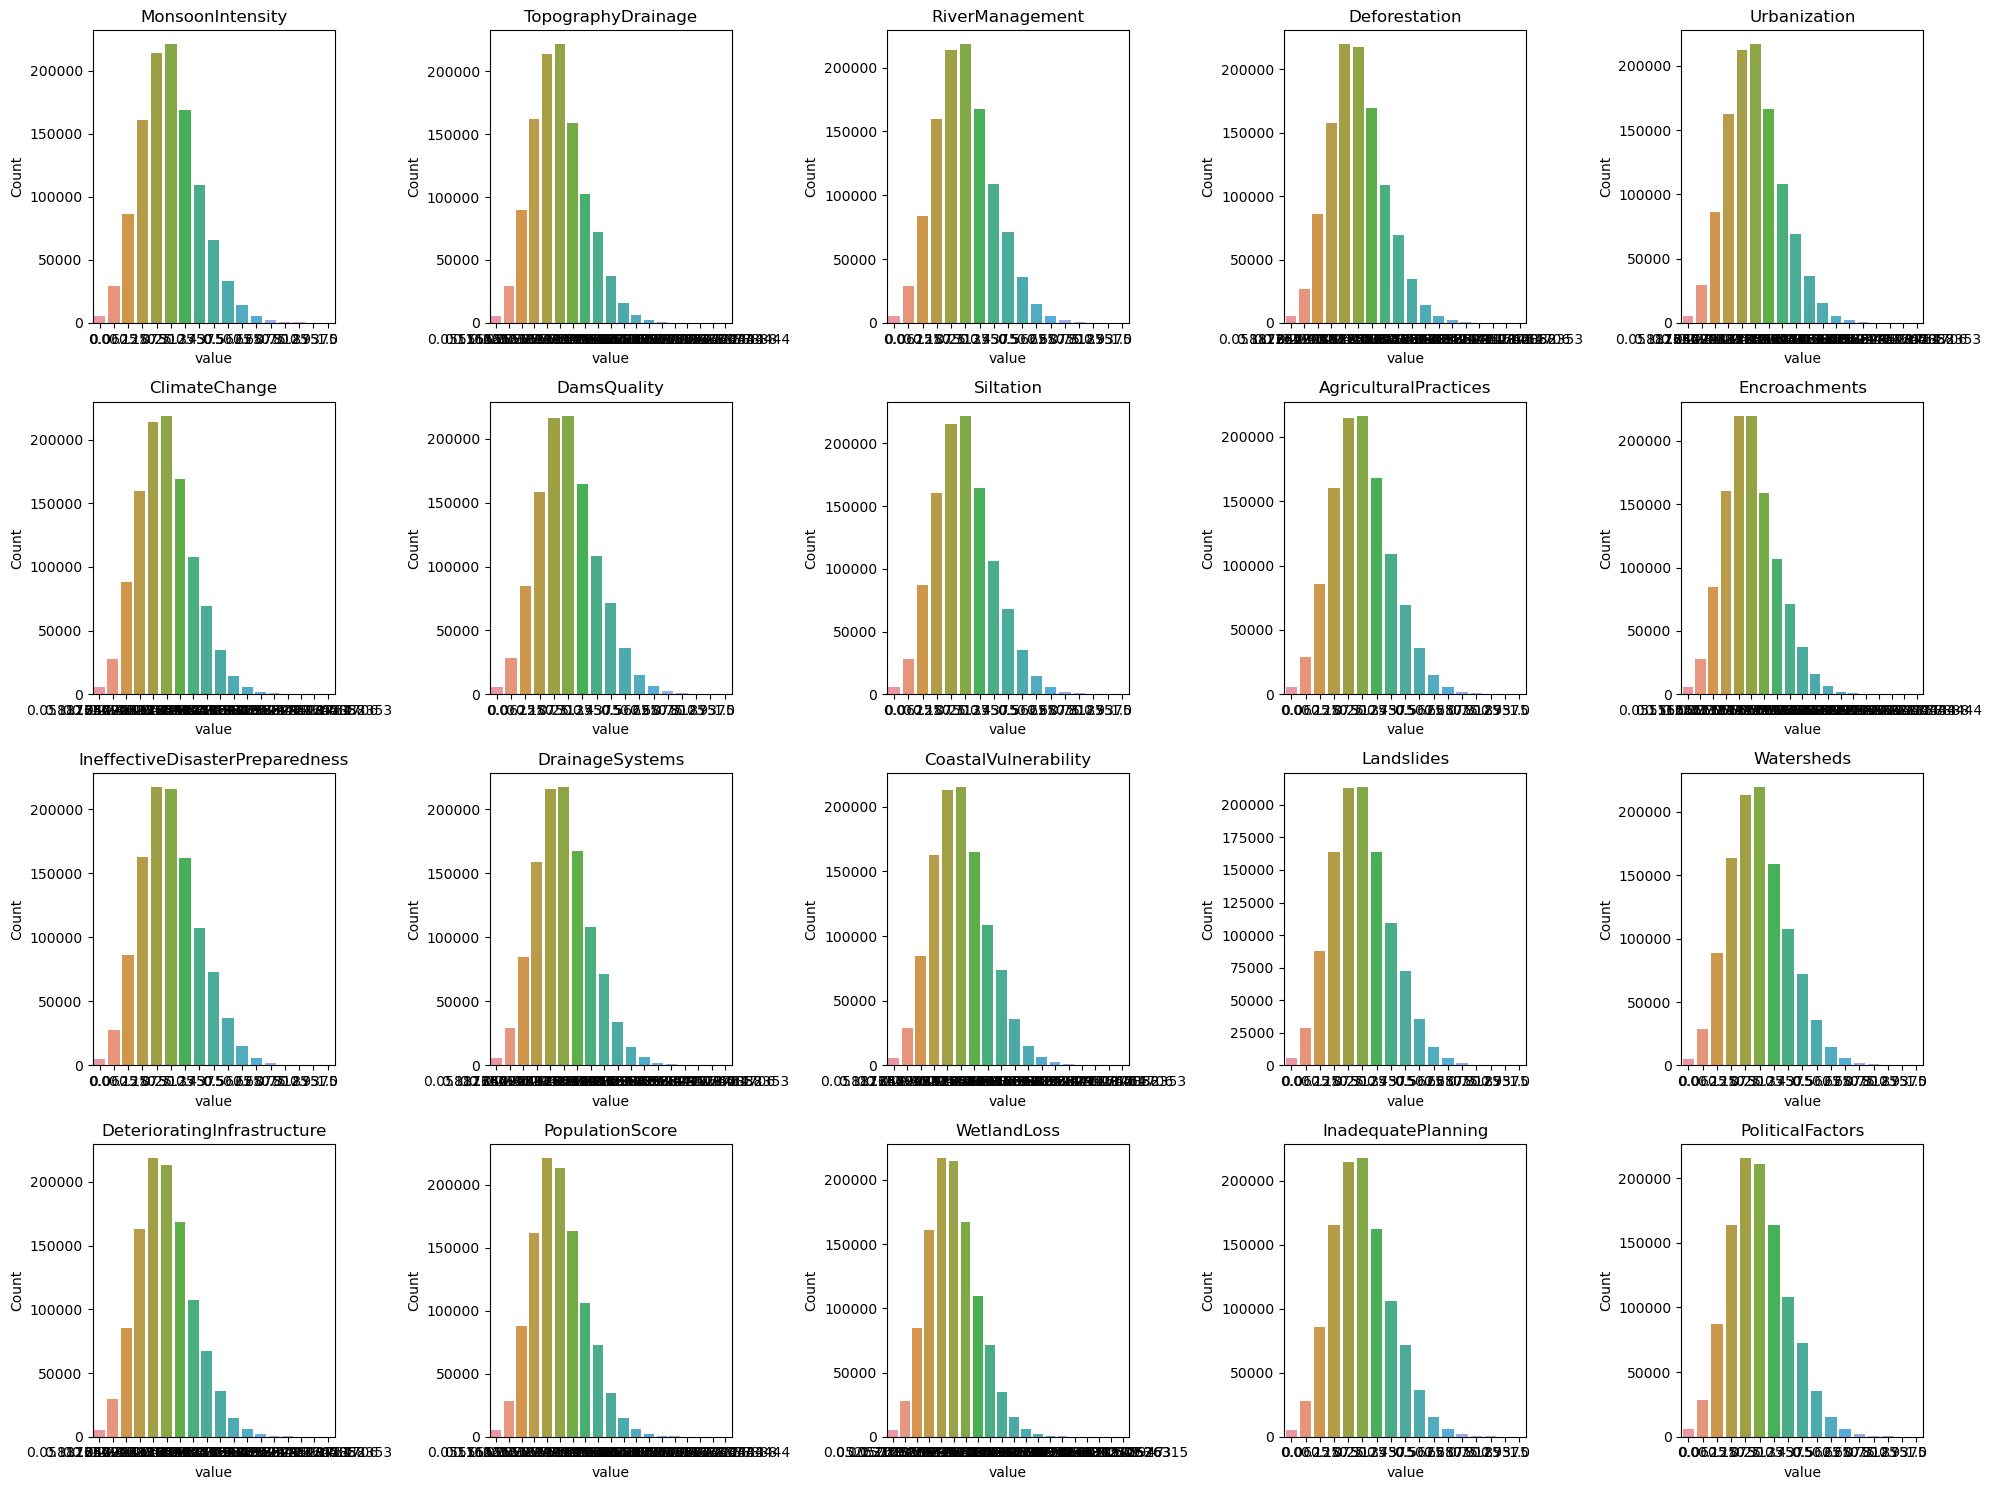

In [34]:
# visualizing the scaled with count plot
# calculate the number of row and columns for the subplots
import math
num_features = len(features)
num_rows = 4 
num_cols = math.ceil(num_features/num_rows)

# create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20,15))

#flatteb the axes if needed
if num_features > 1:
    axes = axes.flatten()
    
for i, columns in enumerate(features):
    axe = axes[i]
    sn.countplot(data=X_scaled_MinMax, x=columns, ax=axe)
    axe.set_title(f'{columns}')
    axe.set_xlabel('value')
    axe.set_ylabel('Count')
    
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'MonsoonIntensity'}>,
        <Axes: title={'center': 'TopographyDrainage'}>,
        <Axes: title={'center': 'RiverManagement'}>,
        <Axes: title={'center': 'Deforestation'}>],
       [<Axes: title={'center': 'Urbanization'}>,
        <Axes: title={'center': 'ClimateChange'}>,
        <Axes: title={'center': 'DamsQuality'}>,
        <Axes: title={'center': 'Siltation'}>],
       [<Axes: title={'center': 'AgriculturalPractices'}>,
        <Axes: title={'center': 'Encroachments'}>,
        <Axes: title={'center': 'IneffectiveDisasterPreparedness'}>,
        <Axes: title={'center': 'DrainageSystems'}>],
       [<Axes: title={'center': 'CoastalVulnerability'}>,
        <Axes: title={'center': 'Landslides'}>,
        <Axes: title={'center': 'Watersheds'}>,
        <Axes: title={'center': 'DeterioratingInfrastructure'}>],
       [<Axes: title={'center': 'PopulationScore'}>,
        <Axes: title={'center': 'WetlandLoss'}>,
        <Axes: title={'center': 

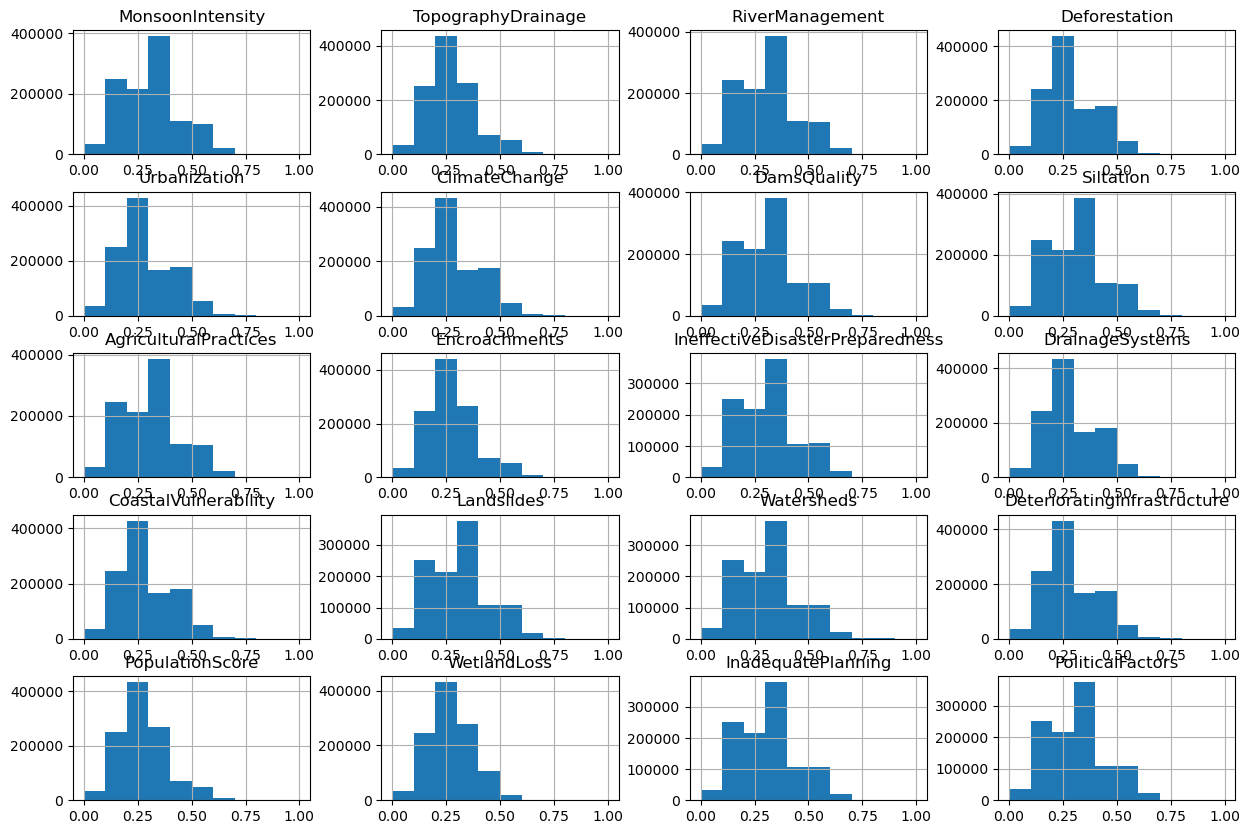

In [35]:
# visualizing the scaled with histogram
X_scaled_MinMax.hist(figsize=(15,10))

In [36]:
# scaling with Roburst Scaler
scaler = RobustScaler()
X_scaled_RS = scaler.fit_transform(X)

# converting to a dataframe
X_scaled_RS = pd.DataFrame(X_scaled_RS, columns=X.columns)
X_scaled_RS.head()

MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0          0.000000            1.000000              0.0            1.5   
1          0.333333            0.666667             -0.5           -0.5   
2          0.333333            0.000000              0.5            1.0   
3         -0.666667           -0.333333              0.5            0.0   
4          0.000000           -0.666667             -1.5            0.5   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0      0.333333      -0.333333         -0.5  -0.666667              -0.666667   
1      1.000000       1.000000         -1.0   0.000000              -0.333333   
2     -0.666667       0.666667         -2.0   0.000000              -0.333333   
3     -0.333333       1.000000         -0.5   0.666667               0.333333   
4     -0.333333      -0.333333         -1.0  -0.666667              -0.666667   

   Encroachments  IneffectiveDisasterPreparedness  DrainageSystems  \
0           -0.5                        -1.000000              0.0   
1            0.5                         1.333333              1.0   
2            0.0                         0.333333              1.0   
3            1.5                         0.000000             -1.5   
4           -1.0                         0.000000             -1.5   

   CoastalVulnerability  Landslides  Watersheds  DeterioratingInfrastructure  \
0             -0.666667   -0.666667    0.000000                    -0.333333   
1             -1.000000   -1.666667   -0.666667                     0.000000   
2             -0.666667    0.666667    0.000000                     0.333333   
3             -0.333333    0.666667   -0.333333                    -0.333333   
4             -1.000000    0.333333    0.333333                    -0.333333   

   PopulationScore  WetlandLoss  InadequatePlanning  PoliticalFactors  
0         0.666667          0.0            0.666667         -0.666667  
1        -0.666667         -1.0           -0.333333         -0.666667  
2         1.000000         -1.5           -0.666667         -0.666667  
3         0.333333          0.0            0.666667          0.000000  
4        -1.333333         -1.5           -0.666667          0.000000

In [37]:
#checking the descriptive statistics of the scaled
X_scaled_RS.describe()

MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
count      1.117957e+06        1.117957e+06     1.117957e+06   1.117957e+06   
mean      -2.618318e-02       -2.444310e-02    -2.233896e-02  -2.887991e-02   
std        6.854622e-01        6.979597e-01     1.036093e+00   1.025845e+00   
min       -1.666667e+00       -1.666667e+00    -2.500000e+00  -2.500000e+00   
25%       -6.666667e-01       -6.666667e-01    -5.000000e-01  -5.000000e-01   
50%        0.000000e+00        0.000000e+00     0.000000e+00   0.000000e+00   
75%        3.333333e-01        3.333333e-01     5.000000e-01   5.000000e-01   
max        3.666667e+00        4.333333e+00     5.500000e+00   6.000000e+00   

       Urbanization  ClimateChange   DamsQuality     Siltation  \
count  1.117957e+06   1.117957e+06  1.117957e+06  1.117957e+06   
mean  -1.916114e-02  -2.196894e-02 -2.206122e-02 -2.406980e-02   
std    6.944636e-01   6.859140e-01  1.041532e+00  6.886639e-01   
min   -1.666667e+00  -1.666667e+00 -2.500000e+00 -1.666667e+00   
25%   -6.666667e-01  -6.666667e-01 -5.000000e-01 -6.666667e-01   
50%    0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00   
75%    3.333333e-01   3.333333e-01  5.000000e-01  3.333333e-01   
max    4.000000e+00   4.000000e+00  5.500000e+00  3.666667e+00   

       AgriculturalPractices  Encroachments  IneffectiveDisasterPreparedness  \
count           1.117957e+06   1.117957e+06                     1.117957e+06   
mean           -1.912685e-02  -2.538514e-02                    -1.825383e-02   
std             6.895150e-01   1.041662e+00                     6.927136e-01   
min            -1.666667e+00  -2.500000e+00                    -1.666667e+00   
25%            -6.666667e-01  -5.000000e-01                    -6.666667e-01   
50%             0.000000e+00   0.000000e+00                     0.000000e+00   
75%             3.333333e-01   5.000000e-01                     3.333333e-01   
max             3.666667e+00   6.500000e+00                     3.666667e+00   

       DrainageSystems  CoastalVulnerability    Landslides    Watersheds  \
count     1.117957e+06          1.117957e+06  1.117957e+06  1.117957e+06   
mean     -2.655335e-02         -1.533362e-02 -2.287476e-02 -2.365595e-02   
std       1.036167e+00          6.962996e-01  6.927622e-01  6.941316e-01   
min      -2.500000e+00         -1.666667e+00 -1.666667e+00 -1.666667e+00   
25%      -5.000000e-01         -6.666667e-01 -6.666667e-01 -6.666667e-01   
50%       0.000000e+00          0.000000e+00  0.000000e+00  0.000000e+00   
75%       5.000000e-01          3.333333e-01  3.333333e-01  3.333333e-01   
max       6.000000e+00          4.000000e+00  3.666667e+00  3.666667e+00   

       DeterioratingInfrastructure  PopulationScore   WetlandLoss  \
count                 1.117957e+06     1.117957e+06  1.117957e+06   
mean                 -2.469773e-02    -2.416014e-02 -2.457027e-02   
std                   6.882709e-01     6.913921e-01  1.034348e+00   
min                  -1.666667e+00    -1.666667e+00 -2.500000e+00   
25%                  -6.666667e-01    -6.666667e-01 -5.000000e-01   
50%                   0.000000e+00     0.000000e+00  0.000000e+00   
75%                   3.333333e-01     3.333333e-01  5.000000e-01   
max                   4.000000e+00     4.333333e+00  7.000000e+00   

       InadequatePlanning  PoliticalFactors  
count        1.117957e+06      1.117957e+06  
mean        -1.980428e-02     -2.033203e-02  
std          6.937076e-01      6.967834e-01  
min         -1.666667e+00     -1.666667e+00  
25%         -6.666667e-01     -6.666667e-01  
50%          0.000000e+00      0.000000e+00  
75%          3.333333e-01      3.333333e-01  
max          3.666667e+00      3.666667e+00

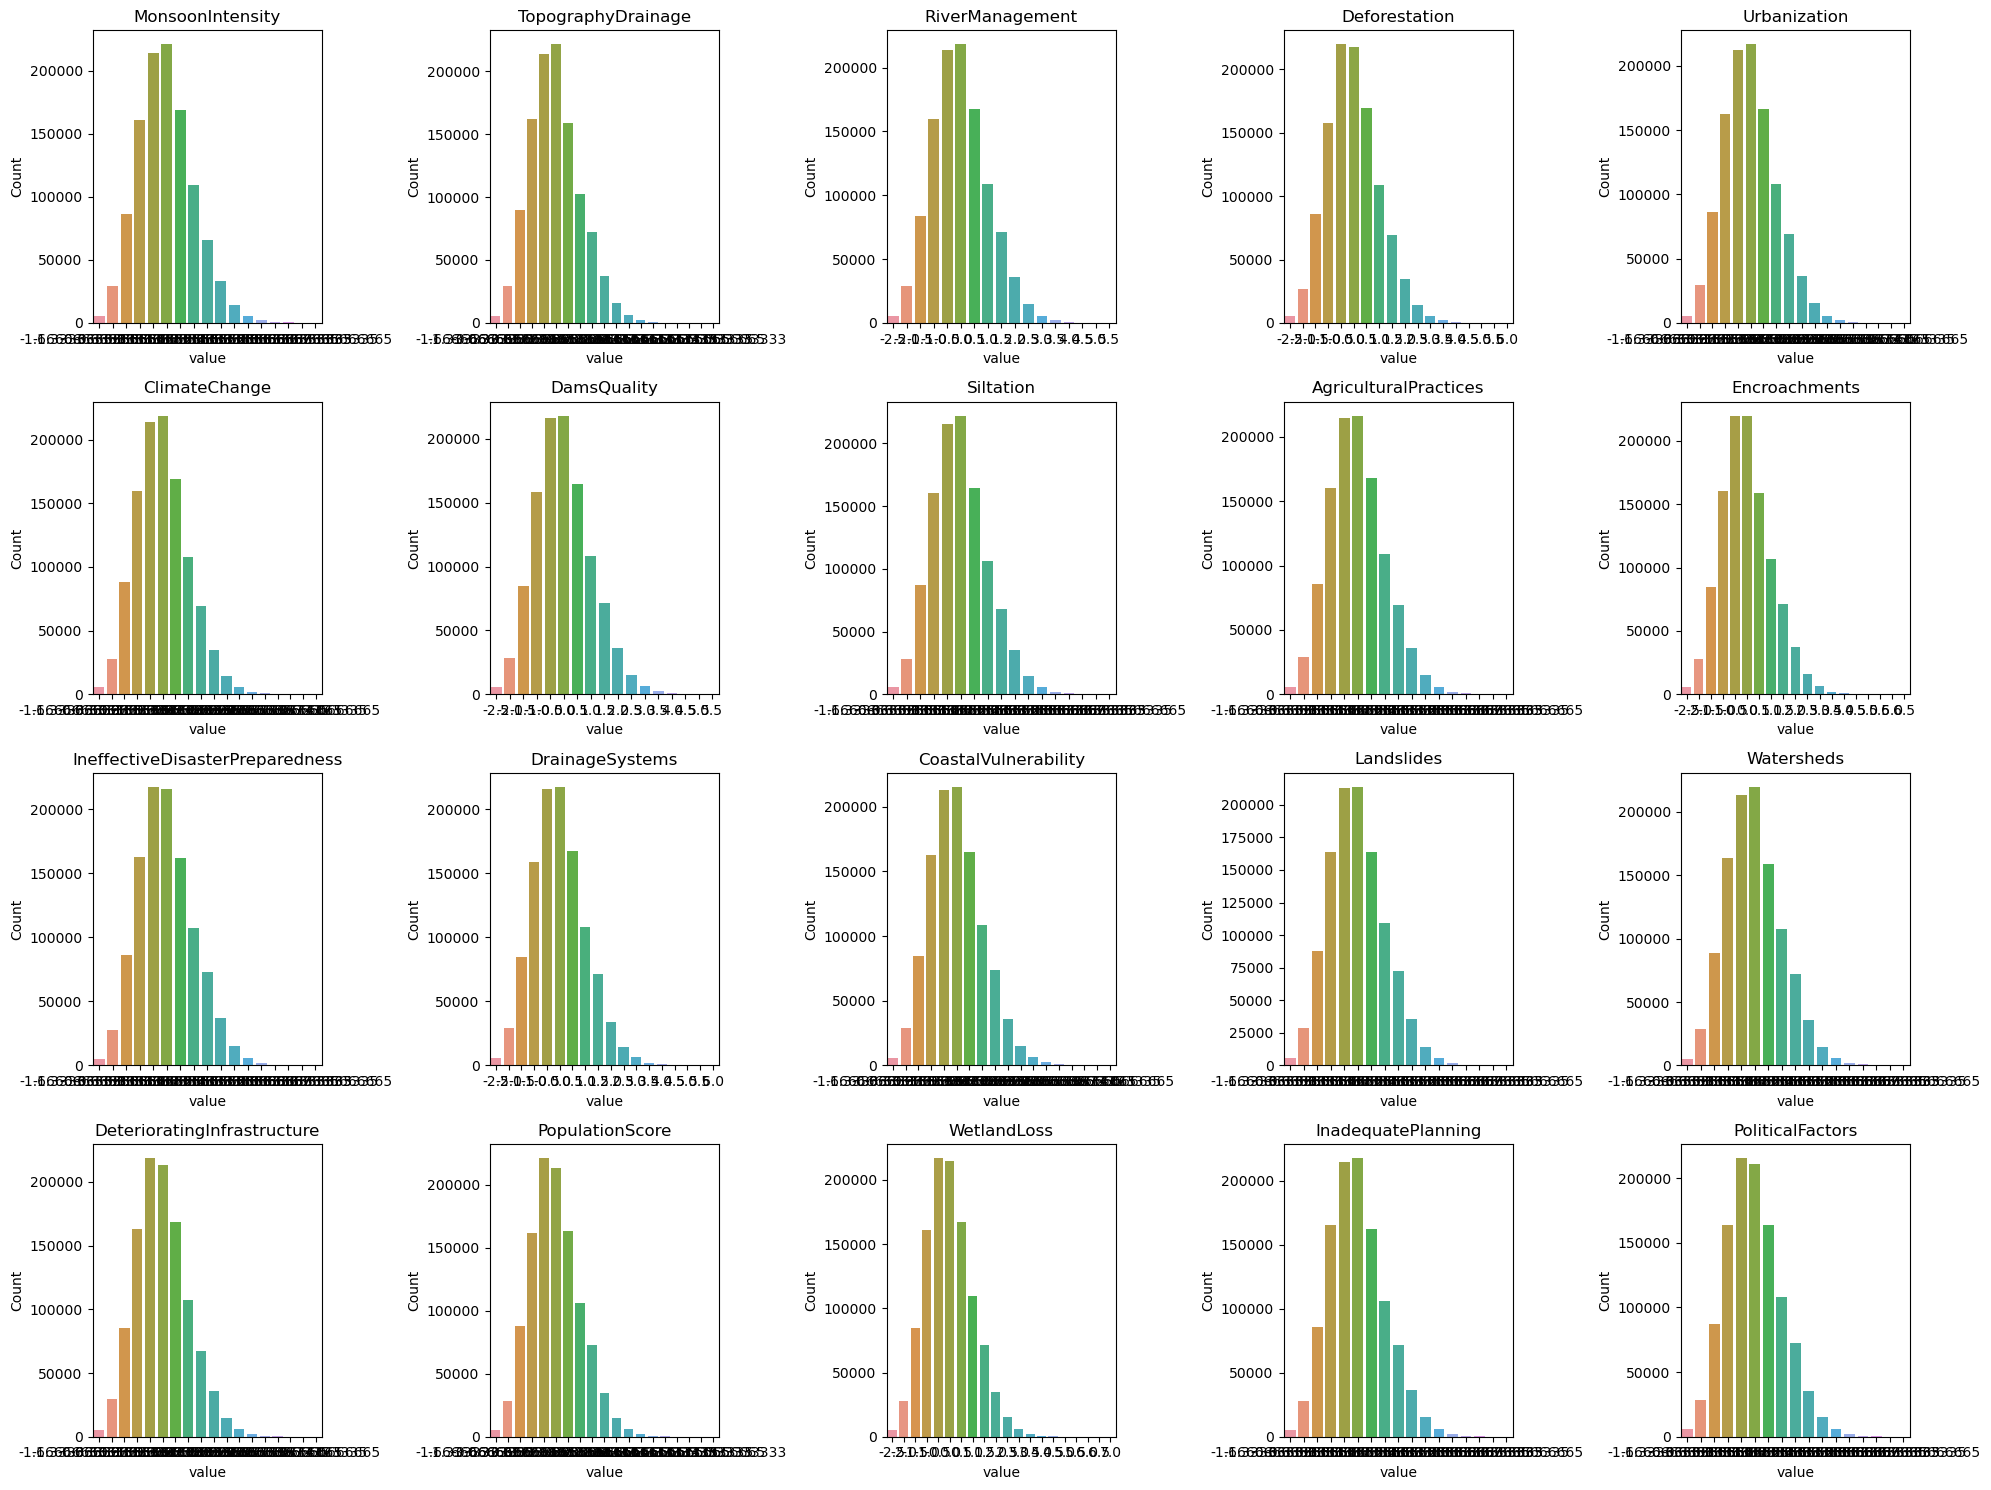

In [38]:
# visualizing the scaled with count plot
# calculate the number of row and columns for the subplots
import math
num_features = len(features)
num_rows = 4 
num_cols = math.ceil(num_features/num_rows)

# create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20,15))

#flatteb the axes if needed
if num_features > 1:
    axes = axes.flatten()
    
for i, columns in enumerate(features):
    axe = axes[i]
    sn.countplot(data=X_scaled_RS, x=columns, ax=axe)
    axe.set_title(f'{columns}')
    axe.set_xlabel('value')
    axe.set_ylabel('Count')
    
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'MonsoonIntensity'}>,
        <Axes: title={'center': 'TopographyDrainage'}>,
        <Axes: title={'center': 'RiverManagement'}>,
        <Axes: title={'center': 'Deforestation'}>],
       [<Axes: title={'center': 'Urbanization'}>,
        <Axes: title={'center': 'ClimateChange'}>,
        <Axes: title={'center': 'DamsQuality'}>,
        <Axes: title={'center': 'Siltation'}>],
       [<Axes: title={'center': 'AgriculturalPractices'}>,
        <Axes: title={'center': 'Encroachments'}>,
        <Axes: title={'center': 'IneffectiveDisasterPreparedness'}>,
        <Axes: title={'center': 'DrainageSystems'}>],
       [<Axes: title={'center': 'CoastalVulnerability'}>,
        <Axes: title={'center': 'Landslides'}>,
        <Axes: title={'center': 'Watersheds'}>,
        <Axes: title={'center': 'DeterioratingInfrastructure'}>],
       [<Axes: title={'center': 'PopulationScore'}>,
        <Axes: title={'center': 'WetlandLoss'}>,
        <Axes: title={'center': 

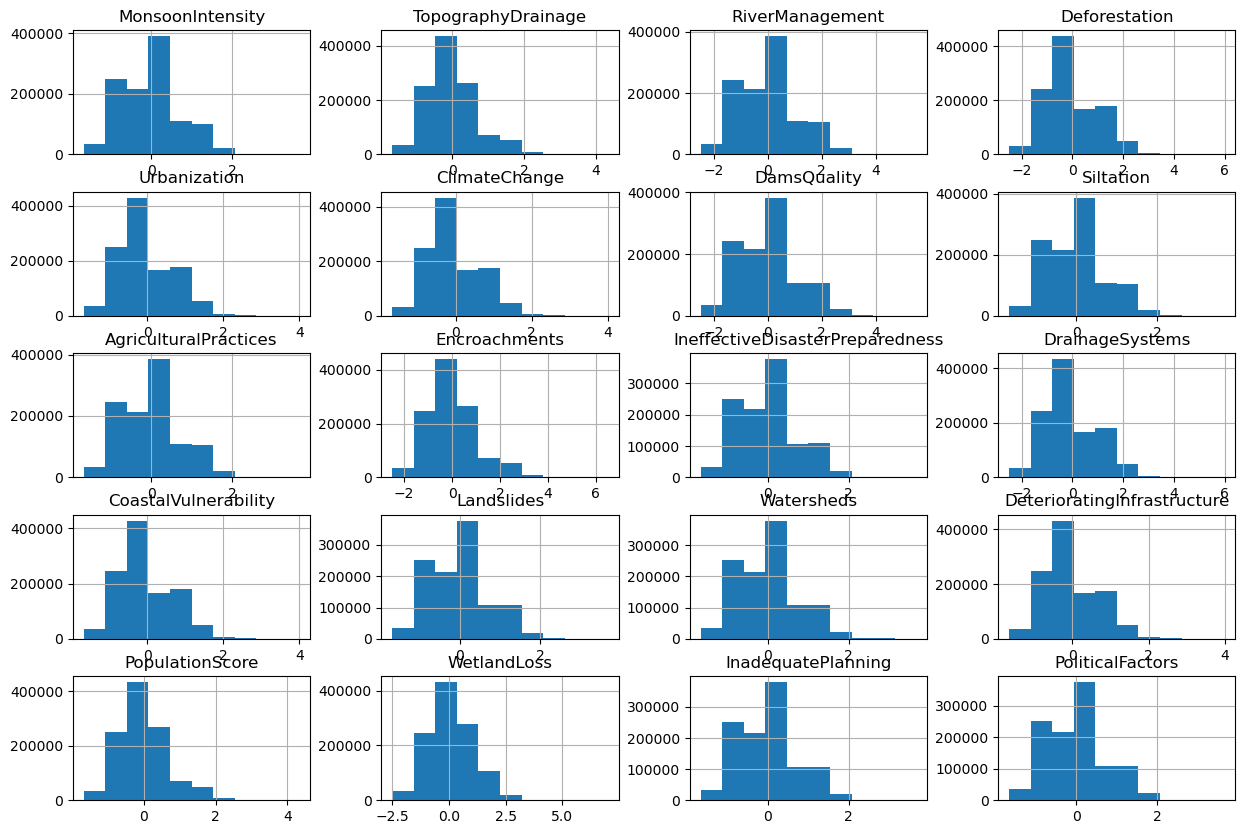

In [39]:
# visualizing the scaled with histogram
X_scaled_RS.hist(figsize=(15,10))

In [40]:
# scaling with Normalizer 
scaler = Normalizer()
X_scaled_N = scaler.fit_transform(X)

#Converting to Dataframe
X_scaled_N = pd.DataFrame(X_scaled_N, columns=X.columns)
X_scaled_N.head()

MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0          0.223607            0.357771         0.223607       0.357771   
1          0.257722            0.300676         0.171815       0.171815   
2          0.253320            0.211100         0.253320       0.295540   
3          0.123299            0.164399         0.246598       0.205499   
4          0.287718            0.172631         0.115087       0.345261   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0      0.268328       0.178885     0.178885   0.134164               0.134164   
1      0.343629       0.343629     0.128861   0.214768               0.171815   
2      0.126660       0.295540     0.042220   0.211100               0.168880   
3      0.164399       0.328798     0.164399   0.287698               0.246598   
4      0.230174       0.230174     0.172631   0.172631               0.172631   

   Encroachments  IneffectiveDisasterPreparedness  DrainageSystems  \
0       0.178885                         0.089443         0.223607   
1       0.257722                         0.386583         0.300676   
2       0.211100                         0.253320         0.295540   
3       0.328798                         0.205499         0.082199   
4       0.172631                         0.287718         0.115087   

   CoastalVulnerability  Landslides  Watersheds  DeterioratingInfrastructure  \
0              0.134164    0.134164    0.223607                     0.178885   
1              0.085907    0.000000    0.128861                     0.214768   
2              0.126660    0.295540    0.211100                     0.253320   
3              0.164399    0.287698    0.164399                     0.164399   
4              0.115087    0.345261    0.345261                     0.230174   

   PopulationScore  WetlandLoss  InadequatePlanning  PoliticalFactors  
0         0.313050     0.223607            0.313050          0.134164  
1         0.128861     0.128861            0.171815          0.128861  
2         0.337760     0.084440            0.126660          0.126660  
3         0.246598     0.205499            0.287698          0.205499  
4         0.057544     0.115087            0.172631          0.287718

In [41]:
# statistical description of the scaled
X_scaled_N.describe()

MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
count      1.117957e+06        1.117957e+06     1.117957e+06   1.117957e+06   
mean       2.060068e-01        2.062371e-01     2.074719e-01   2.069426e-01   
std        8.392739e-02        8.576675e-02     8.493578e-02   8.402481e-02   
min        0.000000e+00        0.000000e+00     0.000000e+00   0.000000e+00   
25%        1.464504e-01        1.430194e-01     1.479791e-01   1.490712e-01   
50%        2.029437e-01        2.017836e-01     2.035946e-01   2.032789e-01   
75%        2.598888e-01        2.601330e-01     2.614198e-01   2.606233e-01   
max        6.499556e-01        6.712867e-01     6.859943e-01   6.488857e-01   

       Urbanization  ClimateChange   DamsQuality     Siltation  \
count  1.117957e+06   1.117957e+06  1.117957e+06  1.117957e+06   
mean   2.069746e-01   2.066048e-01  2.074722e-01  2.063015e-01   
std    8.546986e-02   8.429717e-02  8.526477e-02  8.454822e-02   
min    0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.451802e-01   1.468446e-01  1.481594e-01  1.463523e-01   
50%    2.029437e-01   2.032789e-01  2.032789e-01  2.024441e-01   
75%    2.611165e-01   2.603778e-01  2.614198e-01  2.601330e-01   
max    6.875239e-01   6.965260e-01  6.534103e-01  6.632213e-01   

       AgriculturalPractices  Encroachments  IneffectiveDisasterPreparedness  \
count           1.117957e+06   1.117957e+06                     1.117957e+06   
mean            2.069493e-01   2.072500e-01                     2.070700e-01   
std             8.476176e-02   8.542801e-02                     8.527089e-02   
min             0.000000e+00   0.000000e+00                     0.000000e+00   
25%             1.469437e-01   1.476203e-01                     1.460593e-01   
50%             2.032789e-01   2.022783e-01                     2.022783e-01   
75%             2.611165e-01   2.611165e-01                     2.612093e-01   
max             6.526536e-01   6.847523e-01                     6.451823e-01   

       DrainageSystems  CoastalVulnerability    Landslides    Watersheds  \
count     1.117957e+06          1.117957e+06  1.117957e+06  1.117957e+06   
mean      2.071499e-01          2.074766e-01  2.064719e-01  2.064053e-01   
std       8.496151e-02          8.577145e-02  8.521899e-02  8.546277e-02   
min       0.000000e+00          0.000000e+00  0.000000e+00  0.000000e+00   
25%       1.477994e-01          1.460593e-01  1.433149e-01  1.435916e-01   
50%       2.032789e-01          2.031111e-01  2.024441e-01  2.019481e-01   
75%       2.611165e-01          2.618615e-01  2.613641e-01  2.606936e-01   
max       6.885304e-01          7.167277e-01  6.720215e-01  6.592685e-01   

       DeterioratingInfrastructure  PopulationScore   WetlandLoss  \
count                 1.117957e+06     1.117957e+06  1.117957e+06   
mean                  2.061925e-01     2.063126e-01  2.072953e-01   
std                   8.440504e-02     8.496746e-02  8.472362e-02   
min                   0.000000e+00     0.000000e+00  0.000000e+00   
25%                   1.456714e-01     1.455214e-01  1.477434e-01   
50%                   2.021130e-01     2.017733e-01  2.032789e-01   
75%                   2.603328e-01     2.606233e-01  2.616023e-01   
max                   6.570412e-01     6.791622e-01  6.620847e-01   

       InadequatePlanning  PoliticalFactors  
count        1.117957e+06      1.117957e+06  
mean         2.068756e-01      2.068147e-01  
std          8.535288e-02      8.574305e-02  
min          0.000000e+00      0.000000e+00  
25%          1.449047e-01      1.438390e-01  
50%          2.022783e-01      2.022783e-01  
75%          2.608696e-01      2.616124e-01  
max          6.559360e-01      6.615186e-01

array([[<Axes: title={'center': 'MonsoonIntensity'}>,
        <Axes: title={'center': 'TopographyDrainage'}>,
        <Axes: title={'center': 'RiverManagement'}>,
        <Axes: title={'center': 'Deforestation'}>],
       [<Axes: title={'center': 'Urbanization'}>,
        <Axes: title={'center': 'ClimateChange'}>,
        <Axes: title={'center': 'DamsQuality'}>,
        <Axes: title={'center': 'Siltation'}>],
       [<Axes: title={'center': 'AgriculturalPractices'}>,
        <Axes: title={'center': 'Encroachments'}>,
        <Axes: title={'center': 'IneffectiveDisasterPreparedness'}>,
        <Axes: title={'center': 'DrainageSystems'}>],
       [<Axes: title={'center': 'CoastalVulnerability'}>,
        <Axes: title={'center': 'Landslides'}>,
        <Axes: title={'center': 'Watersheds'}>,
        <Axes: title={'center': 'DeterioratingInfrastructure'}>],
       [<Axes: title={'center': 'PopulationScore'}>,
        <Axes: title={'center': 'WetlandLoss'}>,
        <Axes: title={'center': 

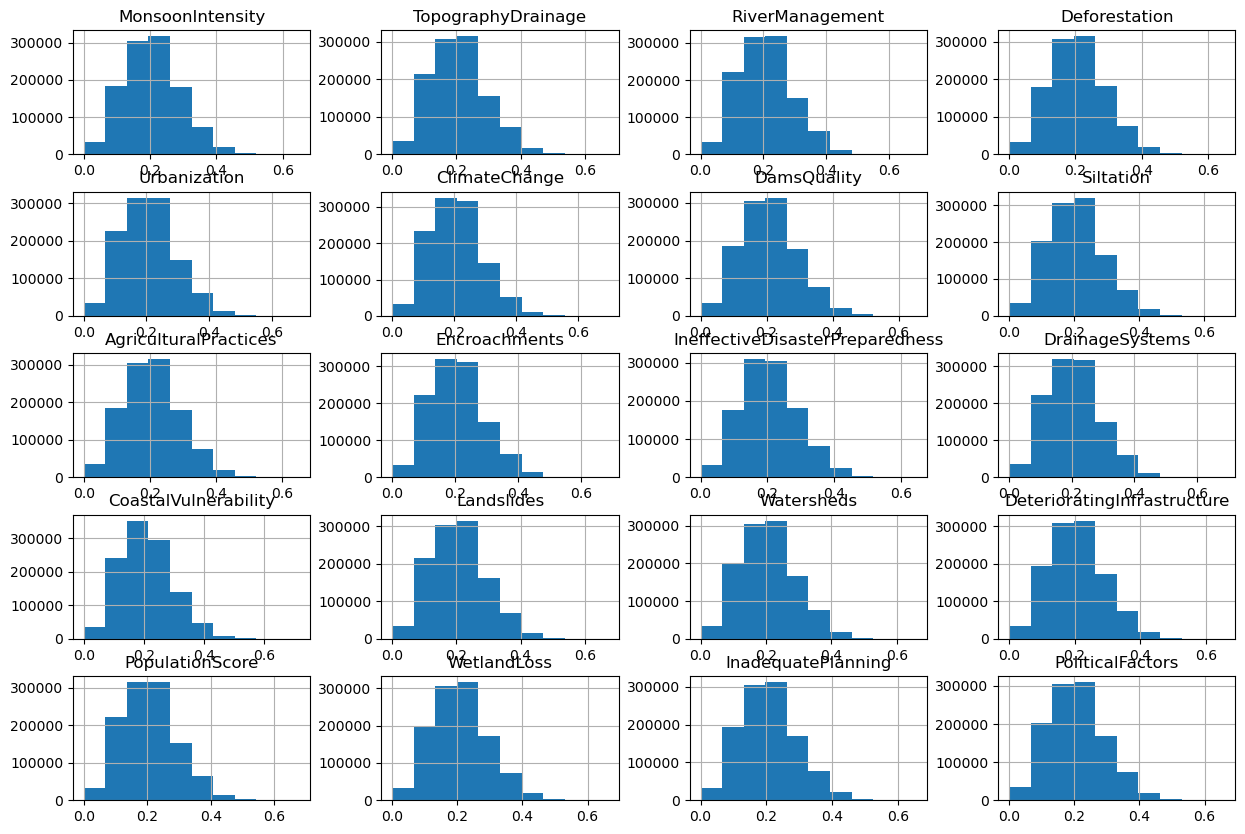

In [42]:
# visualizing the scaled using histogram
X_scaled_N.hist(figsize=(15,10))

## Modelling 

* note, we are not training with the scaled dataset, rather the unscaled one maybe later we could try out with the scaled dataset

In [43]:
from sklearn.model_selection import train_test_split

#splitting the dataset into train, test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [44]:
X_train.shape

(894365, 20)

In [45]:
y_train.shape

(894365,)

In [46]:
X_test.shape

(223592, 20)

In [47]:
y_test.shape

(223592,)

In [48]:
#importing models to be used
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
# gradientBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# catboost Regressor
# catboost should be installed in my notebook
#!pip install catboost
#get_ipython().system('pip install catboost')
from catboost import CatBoostRegressor

# xgboost regressor
# also install the XGBOOST regressor in your notebook
#get_ipython().system('pip install xgboost')
#!pip install xgboost
from xgboost import XGBRegressor


## Note:
 * We shall be training our model with following models, then we check the <code>Mean squared error</code> value, the <code>Mean absolute error</code> value, and the <code>R2 Score</code> value:
 
 
 <br>
 <code>
    LinearRegression
    DecisionTreeRegressor
    SVR
    GradientBoostingRegressor
    CatBoostRegressor
    XGBRegressor
 </code>

### LinearRegression

In [49]:
lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)
lr_pred = lr_fit.predict(X_test)

In [50]:
# error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#mean squared error
mse = mean_squared_error(y_test, lr_pred)

#mean absolute error
mae = mean_absolute_error(y_test, lr_pred)

#r2_score
r2score = r2_score(y_test, lr_pred)

print('Linear Regression')
print('mean squared error', mse)
print('mean absolute error', mae)
print('R2 Score', r2score)

Linear Regression
mean squared error 0.0004032065870905581
mean absolute error 0.015792471363760344
R2 Score 0.8448773362840329


### Decision Tree Regressor

In [51]:
dtr = DecisionTreeRegressor()
dtr_fit = dtr.fit(X_train, y_train)
dtr_pred = dtr_fit.predict(X_test)

In [52]:
# error metrics
#mean squared error
mse = mean_squared_error(y_test, dtr_pred)

#mean absolute error
mae = mean_absolute_error(y_test, dtr_pred)

#r2_score
r2score = r2_score(y_test, dtr_pred)

print('Decicion Tree Regressor')
print('mean squared error', mse)
print('mean absolute error', mae)
print('R2 Score', r2score)


Decicion Tree Regressor
mean squared error 0.0024495015474614475
mean absolute error 0.039386427063580094
R2 Score 0.057621534508157324


### SVR

In [53]:
svr = SVR()
svr_fit = svr.fit(X_train, y_train)
svr_pred = svr_fit.predict(X_test)

In [54]:
# error metrics

#mean squared error
mse = mean_squared_error(y_test, svr_pred)

#mean absolute error
mae = mean_squared_error(y_test, svr_pred)

#r2 score
r2score = r2_score(y_test, svr_pred)

print("SVR")
print('mean squared error', mse)
print('mean absolute error', mae)
print('R2 Score', r2score)

SVR
mean squared error 0.0009165583076183187
mean absolute error 0.0009165583076183187
R2 Score 0.6473793566849151


### Gradient Boost Regressor

In [55]:
gbr = GradientBoostingRegressor(random_state=42)
gbr_fit = gbr.fit(X_train, y_train)
gbr_pred = gbr_fit.predict(X_test)

#error matrics
mse = mean_squared_error(y_test, gbr_pred)

mae = mean_absolute_error(y_test, gbr_pred)

r2score = r2_score(y_test, gbr_pred)

print("Gradient Boosting Regressor")
print("mean squared error", mse)
print("mean absolute error", mae)
print("R2 Score", r2score)

Gradient Boosting Regressor
mean squared error 0.001002567229880375
mean absolute error 0.026065028902193994
R2 Score 0.6142897853539955


### CatBoostRegressor
   

In [56]:
cbr = CatBoostRegressor()
cbr_fit = cbr.fit(X_train, y_train)
cbr_pred = cbr_fit.predict(X_test)

# error matrics
mse = mean_squared_error(y_test, cbr_pred)

mae = mean_absolute_error(y_test, cbr_pred)

r2score = r2_score(y_test, cbr_pred)

print("Cat Boost Regressor")
print("mean squared error", mse)
print("mean absolute error", mae)
print("R2 Score", r2score)

Learning rate set to 0.119817
0:	learn: 0.0501723	total: 588ms	remaining: 9m 47s
1:	learn: 0.0493197	total: 937ms	remaining: 7m 47s
2:	learn: 0.0484621	total: 1.22s	remaining: 6m 44s
3:	learn: 0.0476957	total: 1.48s	remaining: 6m 9s
4:	learn: 0.0469464	total: 1.76s	remaining: 5m 51s
5:	learn: 0.0462136	total: 2.03s	remaining: 5m 37s
6:	learn: 0.0455094	total: 2.3s	remaining: 5m 26s
7:	learn: 0.0448639	total: 2.58s	remaining: 5m 20s
8:	learn: 0.0442080	total: 2.85s	remaining: 5m 14s
9:	learn: 0.0435677	total: 3.12s	remaining: 5m 9s
10:	learn: 0.0429993	total: 3.36s	remaining: 5m 2s
11:	learn: 0.0424384	total: 3.61s	remaining: 4m 57s
12:	learn: 0.0418800	total: 3.86s	remaining: 4m 53s
13:	learn: 0.0413436	total: 4.1s	remaining: 4m 48s
14:	learn: 0.0408240	total: 4.35s	remaining: 4m 45s
15:	learn: 0.0402937	total: 4.61s	remaining: 4m 43s
16:	learn: 0.0397883	total: 4.85s	remaining: 4m 40s
17:	learn: 0.0393224	total: 5.08s	remaining: 4m 37s
18:	learn: 0.0388566	total: 5.32s	remaining: 4m 3

157:	learn: 0.0212007	total: 38s	remaining: 3m 22s
158:	learn: 0.0211802	total: 38.2s	remaining: 3m 22s
159:	learn: 0.0211599	total: 38.5s	remaining: 3m 21s
160:	learn: 0.0211401	total: 38.7s	remaining: 3m 21s
161:	learn: 0.0211206	total: 38.9s	remaining: 3m 21s
162:	learn: 0.0211013	total: 39.1s	remaining: 3m 20s
163:	learn: 0.0210822	total: 39.3s	remaining: 3m 20s
164:	learn: 0.0210638	total: 39.5s	remaining: 3m 20s
165:	learn: 0.0210461	total: 39.7s	remaining: 3m 19s
166:	learn: 0.0210285	total: 40s	remaining: 3m 19s
167:	learn: 0.0210112	total: 40.2s	remaining: 3m 19s
168:	learn: 0.0209942	total: 40.4s	remaining: 3m 18s
169:	learn: 0.0209778	total: 40.7s	remaining: 3m 18s
170:	learn: 0.0209621	total: 40.9s	remaining: 3m 18s
171:	learn: 0.0209462	total: 41s	remaining: 3m 17s
172:	learn: 0.0209306	total: 41.2s	remaining: 3m 17s
173:	learn: 0.0209153	total: 41.5s	remaining: 3m 16s
174:	learn: 0.0208999	total: 41.7s	remaining: 3m 16s
175:	learn: 0.0208847	total: 41.9s	remaining: 3m 16s

315:	learn: 0.0200868	total: 1m 9s	remaining: 2m 31s
316:	learn: 0.0200852	total: 1m 10s	remaining: 2m 30s
317:	learn: 0.0200837	total: 1m 10s	remaining: 2m 30s
318:	learn: 0.0200822	total: 1m 10s	remaining: 2m 30s
319:	learn: 0.0200807	total: 1m 10s	remaining: 2m 30s
320:	learn: 0.0200792	total: 1m 10s	remaining: 2m 29s
321:	learn: 0.0200776	total: 1m 11s	remaining: 2m 29s
322:	learn: 0.0200762	total: 1m 11s	remaining: 2m 29s
323:	learn: 0.0200748	total: 1m 11s	remaining: 2m 28s
324:	learn: 0.0200734	total: 1m 11s	remaining: 2m 28s
325:	learn: 0.0200720	total: 1m 11s	remaining: 2m 28s
326:	learn: 0.0200706	total: 1m 11s	remaining: 2m 28s
327:	learn: 0.0200693	total: 1m 12s	remaining: 2m 27s
328:	learn: 0.0200678	total: 1m 12s	remaining: 2m 27s
329:	learn: 0.0200665	total: 1m 12s	remaining: 2m 27s
330:	learn: 0.0200652	total: 1m 12s	remaining: 2m 27s
331:	learn: 0.0200640	total: 1m 12s	remaining: 2m 26s
332:	learn: 0.0200627	total: 1m 13s	remaining: 2m 26s
333:	learn: 0.0200613	total: 

469:	learn: 0.0199687	total: 1m 42s	remaining: 1m 55s
470:	learn: 0.0199684	total: 1m 42s	remaining: 1m 55s
471:	learn: 0.0199680	total: 1m 42s	remaining: 1m 54s
472:	learn: 0.0199676	total: 1m 42s	remaining: 1m 54s
473:	learn: 0.0199671	total: 1m 43s	remaining: 1m 54s
474:	learn: 0.0199667	total: 1m 43s	remaining: 1m 54s
475:	learn: 0.0199664	total: 1m 43s	remaining: 1m 53s
476:	learn: 0.0199661	total: 1m 43s	remaining: 1m 53s
477:	learn: 0.0199658	total: 1m 43s	remaining: 1m 53s
478:	learn: 0.0199655	total: 1m 43s	remaining: 1m 53s
479:	learn: 0.0199650	total: 1m 44s	remaining: 1m 52s
480:	learn: 0.0199646	total: 1m 44s	remaining: 1m 52s
481:	learn: 0.0199643	total: 1m 44s	remaining: 1m 52s
482:	learn: 0.0199639	total: 1m 44s	remaining: 1m 52s
483:	learn: 0.0199635	total: 1m 44s	remaining: 1m 51s
484:	learn: 0.0199631	total: 1m 45s	remaining: 1m 51s
485:	learn: 0.0199629	total: 1m 45s	remaining: 1m 51s
486:	learn: 0.0199623	total: 1m 45s	remaining: 1m 51s
487:	learn: 0.0199619	total:

622:	learn: 0.0199187	total: 2m 12s	remaining: 1m 20s
623:	learn: 0.0199185	total: 2m 13s	remaining: 1m 20s
624:	learn: 0.0199182	total: 2m 13s	remaining: 1m 19s
625:	learn: 0.0199178	total: 2m 13s	remaining: 1m 19s
626:	learn: 0.0199174	total: 2m 13s	remaining: 1m 19s
627:	learn: 0.0199171	total: 2m 13s	remaining: 1m 19s
628:	learn: 0.0199169	total: 2m 14s	remaining: 1m 19s
629:	learn: 0.0199165	total: 2m 14s	remaining: 1m 18s
630:	learn: 0.0199161	total: 2m 14s	remaining: 1m 18s
631:	learn: 0.0199157	total: 2m 14s	remaining: 1m 18s
632:	learn: 0.0199156	total: 2m 14s	remaining: 1m 18s
633:	learn: 0.0199154	total: 2m 15s	remaining: 1m 17s
634:	learn: 0.0199149	total: 2m 15s	remaining: 1m 17s
635:	learn: 0.0199147	total: 2m 15s	remaining: 1m 17s
636:	learn: 0.0199144	total: 2m 15s	remaining: 1m 17s
637:	learn: 0.0199142	total: 2m 15s	remaining: 1m 17s
638:	learn: 0.0199139	total: 2m 16s	remaining: 1m 16s
639:	learn: 0.0199137	total: 2m 16s	remaining: 1m 16s
640:	learn: 0.0199134	total:

778:	learn: 0.0198736	total: 2m 45s	remaining: 46.8s
779:	learn: 0.0198731	total: 2m 45s	remaining: 46.6s
780:	learn: 0.0198729	total: 2m 45s	remaining: 46.4s
781:	learn: 0.0198724	total: 2m 45s	remaining: 46.2s
782:	learn: 0.0198720	total: 2m 45s	remaining: 46s
783:	learn: 0.0198718	total: 2m 46s	remaining: 45.8s
784:	learn: 0.0198715	total: 2m 46s	remaining: 45.6s
785:	learn: 0.0198713	total: 2m 46s	remaining: 45.3s
786:	learn: 0.0198708	total: 2m 46s	remaining: 45.1s
787:	learn: 0.0198707	total: 2m 46s	remaining: 44.9s
788:	learn: 0.0198706	total: 2m 47s	remaining: 44.7s
789:	learn: 0.0198703	total: 2m 47s	remaining: 44.5s
790:	learn: 0.0198701	total: 2m 47s	remaining: 44.2s
791:	learn: 0.0198696	total: 2m 47s	remaining: 44s
792:	learn: 0.0198694	total: 2m 47s	remaining: 43.8s
793:	learn: 0.0198691	total: 2m 48s	remaining: 43.6s
794:	learn: 0.0198687	total: 2m 48s	remaining: 43.4s
795:	learn: 0.0198686	total: 2m 48s	remaining: 43.2s
796:	learn: 0.0198683	total: 2m 48s	remaining: 43s

935:	learn: 0.0198297	total: 3m 18s	remaining: 13.6s
936:	learn: 0.0198293	total: 3m 18s	remaining: 13.3s
937:	learn: 0.0198289	total: 3m 18s	remaining: 13.1s
938:	learn: 0.0198287	total: 3m 18s	remaining: 12.9s
939:	learn: 0.0198283	total: 3m 19s	remaining: 12.7s
940:	learn: 0.0198280	total: 3m 19s	remaining: 12.5s
941:	learn: 0.0198277	total: 3m 19s	remaining: 12.3s
942:	learn: 0.0198275	total: 3m 19s	remaining: 12.1s
943:	learn: 0.0198272	total: 3m 19s	remaining: 11.9s
944:	learn: 0.0198269	total: 3m 20s	remaining: 11.6s
945:	learn: 0.0198265	total: 3m 20s	remaining: 11.4s
946:	learn: 0.0198262	total: 3m 20s	remaining: 11.2s
947:	learn: 0.0198260	total: 3m 20s	remaining: 11s
948:	learn: 0.0198259	total: 3m 20s	remaining: 10.8s
949:	learn: 0.0198254	total: 3m 21s	remaining: 10.6s
950:	learn: 0.0198252	total: 3m 21s	remaining: 10.4s
951:	learn: 0.0198249	total: 3m 21s	remaining: 10.2s
952:	learn: 0.0198247	total: 3m 21s	remaining: 9.95s
953:	learn: 0.0198246	total: 3m 21s	remaining: 9

###  XGBRegressor

In [57]:
xgbr = XGBRegressor()
xgbr_fit = xgbr.fit(X_train, y_train)
xgbr_pred = xgbr_fit.predict(X_test)

# error matrics
mse = mean_squared_error(y_test, xgbr_pred)

mae = mean_absolute_error(y_test, xgbr_pred)

r2score = r2_score(y_test, xgbr_pred)

print("XGBoost Regressor")
print("mean squared error", mse)
print("mean absolute error", mae)
print("R2 Score", r2score)

XGBoost Regressor
mean squared error 0.0004962876296730619
mean absolute error 0.017587966576462263
R2 Score 0.8090669608359393


### Making prediction on the test set, with the CatBoostRegressor, it has the highest R2 score value

In [59]:
test.head()

id  MonsoonIntensity  TopographyDrainage  RiverManagement  \
0  1117957                 4                   6                3   
1  1117958                 4                   4                2   
2  1117959                 1                   3                6   
3  1117960                 2                   4                4   
4  1117961                 6                   3                2   

   Deforestation  Urbanization  ClimateChange  DamsQuality  Siltation  \
0              5             6              7            8          7   
1              9             5              5            4          7   
2              5             7              2            4          6   
3              6             4              5            4          3   
4              4             6              4            5          5   

   AgriculturalPractices  Encroachments  IneffectiveDisasterPreparedness  \
0                      8              4                                8   
1                      5              4                                2   
2                      4              2                                7   
3                      4              4                                7   
4                      3              7                                4   

   DrainageSystems  CoastalVulnerability  Landslides  Watersheds  \
0                5                     7           5           6   
1                4                     7           4           5   
2                9                     2           5           5   
3                8                     4           6           7   
4                3                     2           6           4   

   DeterioratingInfrastructure  PopulationScore  WetlandLoss  \
0                            3                6            4   
1                            1                7            4   
2                            2                3            6   
3                            6                4            2   
4                            6                8            4   

   InadequatePlanning  PoliticalFactors  
0                   4                 5  
1                   4                 3  
2                   8                 3  
3                   4                 4  
4                   5                 5

In [61]:
prediction = cbr_fit.predict(test)

In [62]:
prediction

array([0.57443715, 0.4556434 , 0.45438354, ..., 0.62785291, 0.55177198,
       0.51146136])

In [63]:
sample

id  FloodProbability
0       1117957               0.5
1       1117958               0.5
2       1117959               0.5
3       1117960               0.5
4       1117961               0.5
...         ...               ...
745300  1863257               0.5
745301  1863258               0.5
745302  1863259               0.5
745303  1863260               0.5
745304  1863261               0.5

[745305 rows x 2 columns]

In [64]:
sample['FloodProbability'] = prediction
sample.head()

id  FloodProbability
0  1117957          0.574437
1  1117958          0.455643
2  1117959          0.454384
3  1117960          0.465687
4  1117961          0.465513

In [65]:
sample.to_csv('submission.csv', index=False)

##  Trying to Fine-tune the model or Discover more ways to improve the model accuracy


In [1]:
# importing other basic libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns", None)

C:\Users\hp\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# loading the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

In [3]:
train.head()

id  MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0   0                 5                   8                5              8   
1   1                 6                   7                4              4   
2   2                 6                   5                6              7   
3   3                 3                   4                6              5   
4   4                 5                   3                2              6   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             6              4            4          3                      3   
1             8              8            3          5                      4   
2             3              7            1          5                      4   
3             4              8            4          7                      6   
4             4              4            3          3                      3   

   Encroachments  IneffectiveDisasterPreparedness  DrainageSystems  \
0              4                                2                5   
1              6                                9                7   
2              5                                6                7   
3              8                                5                2   
4              3                                5                2   

   CoastalVulnerability  Landslides  Watersheds  DeterioratingInfrastructure  \
0                     3           3           5                            4   
1                     2           0           3                            5   
2                     3           7           5                            6   
3                     4           7           4                            4   
4                     2           6           6                            4   

   PopulationScore  WetlandLoss  InadequatePlanning  PoliticalFactors  \
0                7            5                   7                 3   
1                3            3                   4                 3   
2                8            2                   3                 3   
3                6            5                   7                 5   
4                1            2                   3                 5   

   FloodProbability  
0             0.445  
1             0.450  
2             0.530  
3             0.535  
4             0.415

In [4]:
train.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

### What are the Features that affect the Floodprobability feature more

In [5]:
train.describe().T

count           mean            std  \
id                               1117957.0  558978.000000  322726.531784   
MonsoonIntensity                 1117957.0       4.921450       2.056387   
TopographyDrainage               1117957.0       4.926671       2.093879   
RiverManagement                  1117957.0       4.955322       2.072186   
Deforestation                    1117957.0       4.942240       2.051689   
Urbanization                     1117957.0       4.942517       2.083391   
ClimateChange                    1117957.0       4.934093       2.057742   
DamsQuality                      1117957.0       4.955878       2.083063   
Siltation                        1117957.0       4.927791       2.065992   
AgriculturalPractices            1117957.0       4.942619       2.068545   
Encroachments                    1117957.0       4.949230       2.083324   
IneffectiveDisasterPreparedness  1117957.0       4.945239       2.078141   
DrainageSystems                  1117957.0       4.946893       2.072333   
CoastalVulnerability             1117957.0       4.953999       2.088899   
Landslides                       1117957.0       4.931376       2.078287   
Watersheds                       1117957.0       4.929032       2.082395   
DeterioratingInfrastructure      1117957.0       4.925907       2.064813   
PopulationScore                  1117957.0       4.927520       2.074176   
WetlandLoss                      1117957.0       4.950859       2.068696   
InadequatePlanning               1117957.0       4.940587       2.081123   
PoliticalFactors                 1117957.0       4.939004       2.090350   
FloodProbability                 1117957.0       0.504480       0.051026   

                                   min        25%         50%        75%  \
id                               0.000  279489.00  558978.000  838467.00   
MonsoonIntensity                 0.000       3.00       5.000       6.00   
TopographyDrainage               0.000       3.00       5.000       6.00   
RiverManagement                  0.000       4.00       5.000       6.00   
Deforestation                    0.000       4.00       5.000       6.00   
Urbanization                     0.000       3.00       5.000       6.00   
ClimateChange                    0.000       3.00       5.000       6.00   
DamsQuality                      0.000       4.00       5.000       6.00   
Siltation                        0.000       3.00       5.000       6.00   
AgriculturalPractices            0.000       3.00       5.000       6.00   
Encroachments                    0.000       4.00       5.000       6.00   
IneffectiveDisasterPreparedness  0.000       3.00       5.000       6.00   
DrainageSystems                  0.000       4.00       5.000       6.00   
CoastalVulnerability             0.000       3.00       5.000       6.00   
Landslides                       0.000       3.00       5.000       6.00   
Watersheds                       0.000       3.00       5.000       6.00   
DeterioratingInfrastructure      0.000       3.00       5.000       6.00   
PopulationScore                  0.000       3.00       5.000       6.00   
WetlandLoss                      0.000       4.00       5.000       6.00   
InadequatePlanning               0.000       3.00       5.000       6.00   
PoliticalFactors                 0.000       3.00       5.000       6.00   
FloodProbability                 0.285       0.47       0.505       0.54   

                                         max  
id                               1117956.000  
MonsoonIntensity                      16.000  
TopographyDrainage                    18.000  
RiverManagement                       16.000  
Deforestation                         17.000  
Urbanization                          17.000  
ClimateChange                         17.000  
DamsQuality                           16.000  
Siltation                             16.000  
AgriculturalPractices                 16.000  
Encroachments         

In [6]:
#correlation Matrics
train_corr_mat = train.corr()

Text(0.5, 1.0, 'Correlation Matric')

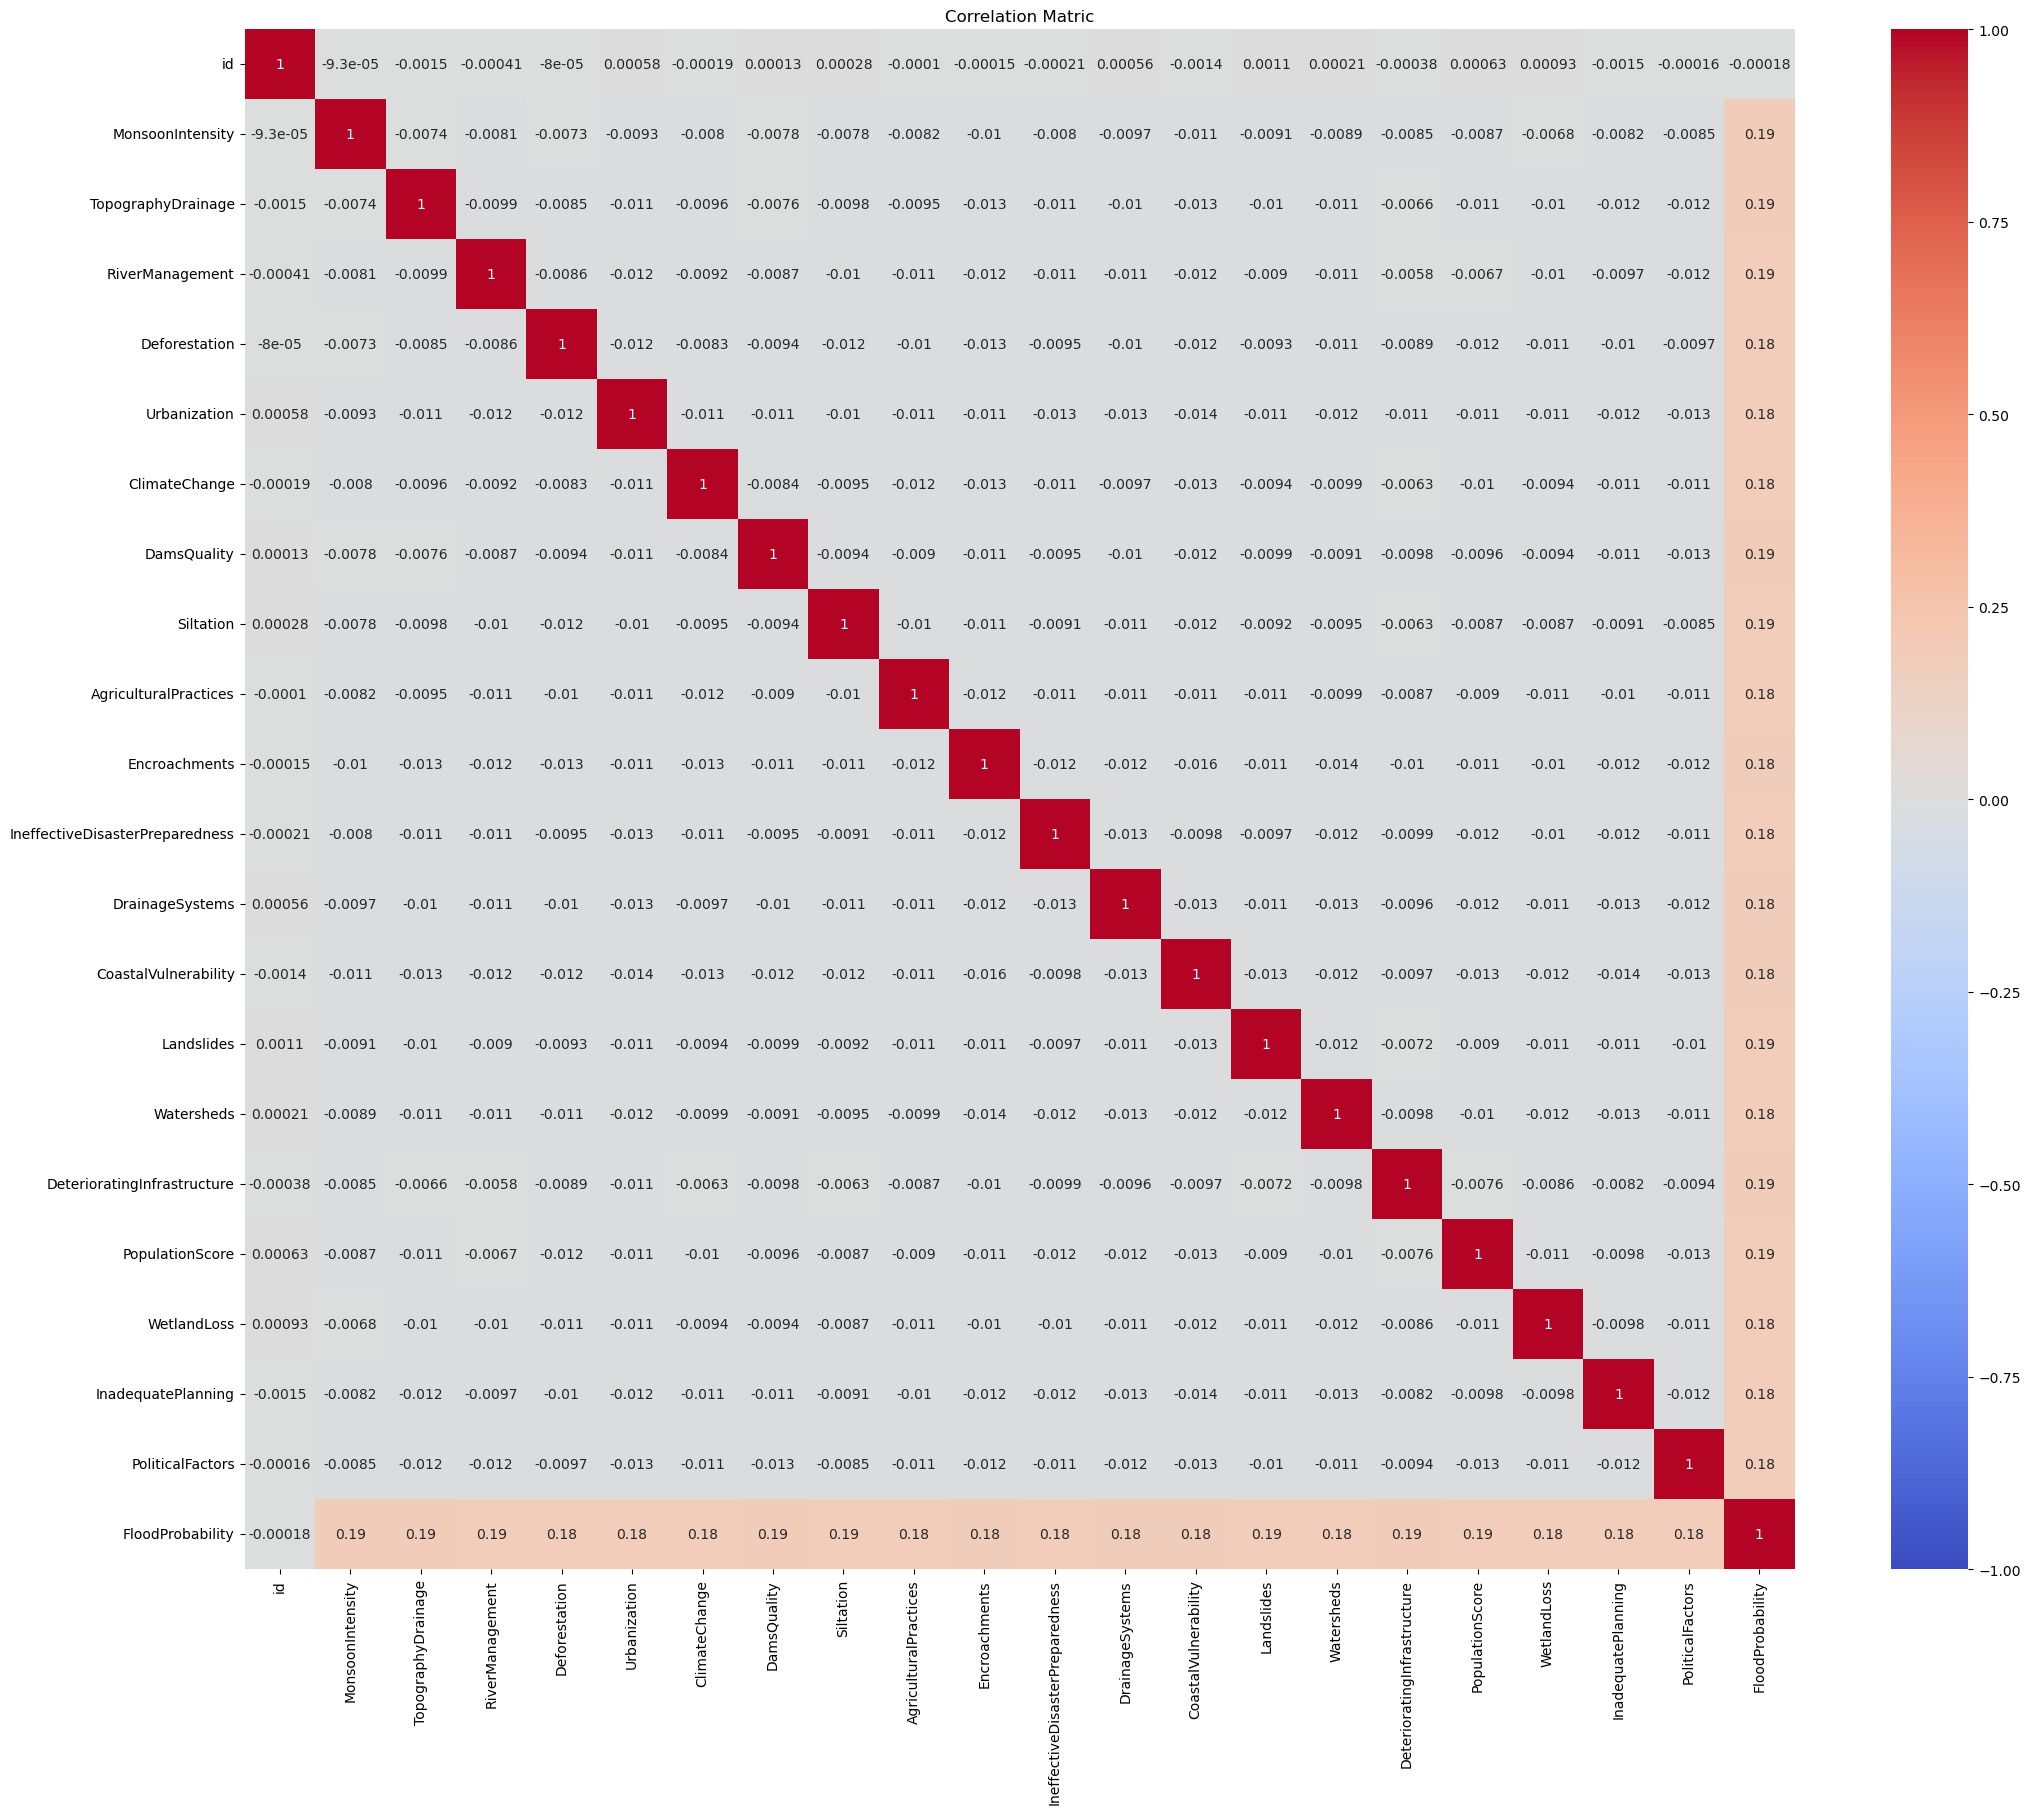

In [7]:
#plotting the correlation matrics on the heatmap
plt.figure(figsize=(25,20))
sn.heatmap(train_corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matric')

In [8]:
#separating features and Target variables
X = train.drop('FloodProbability', axis=1)
y = train['FloodProbability']

In [9]:
#splitting the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)

#display coefficient
coefficients = pd.DataFrame({'Feature':X.columns,'Coefficient':lr.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)

                            Feature   Coefficient
17                  PopulationScore  5.681486e-03
4                     Deforestation  5.681075e-03
13             CoastalVulnerability  5.671065e-03
3                   RiverManagement  5.662407e-03
5                      Urbanization  5.659366e-03
6                     ClimateChange  5.658753e-03
7                       DamsQuality  5.652952e-03
15                       Watersheds  5.647691e-03
10                    Encroachments  5.645931e-03
20                 PoliticalFactors  5.645522e-03
2                TopographyDrainage  5.645112e-03
14                       Landslides  5.643084e-03
8                         Siltation  5.639752e-03
11  IneffectiveDisasterPreparedness  5.639530e-03
18                      WetlandLoss  5.639502e-03
9             AgriculturalPractices  5.639339e-03
12                  DrainageSystems  5.632642e-03
16      DeterioratingInfrastructure  5.618241e-03
1                  MonsoonIntensity  5.613008e-03


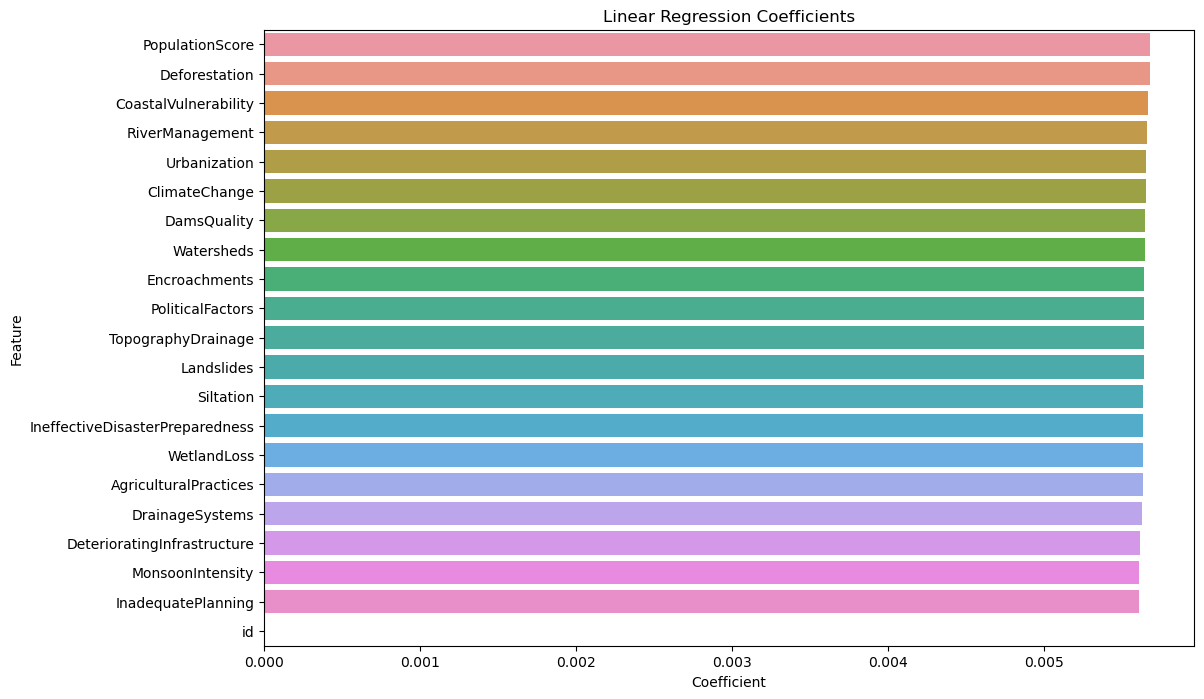

In [10]:
# Plot coefficients
plt.figure(figsize=(12, 8))
sn.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Linear Regression Coefficients')
plt.show()

### Answer

Flooding is a complex phenomenon influenced by a variety of natural and human-induced factors. Based on general knowledge, research reports, and established facts, the following features from your dataset are known to generally affect flooding in an area:

* MonsoonIntensity: Heavy and prolonged monsoon rains can lead to increased water levels in rivers and reservoirs, causing floods.

* TopographyDrainage: The natural drainage patterns and topography of an area influence how water flows and accumulates, affecting flood risk.

* RiverManagement: Effective management of rivers, including embankments and floodplains, can mitigate flooding. Poor management can exacerbate it.

* Deforestation: Removal of trees reduces the land's ability to absorb water, leading to increased runoff and higher flood risk.

* Urbanization: Urban areas with impermeable surfaces like concrete increase runoff, reducing the land's natural ability to absorb water.

* ClimateChange: Changes in climate patterns, including increased frequency and intensity of extreme weather events, contribute to higher flood risks.

* DamsQuality: The condition and management of dams are crucial. Poorly maintained or managed dams can fail, leading to sudden flooding downstream.

* Siltation: Accumulation of silt in rivers and reservoirs reduces their capacity to hold water, increasing the likelihood of overflow during heavy rains.

* AgriculturalPractices: Certain practices can affect soil absorption and runoff. Poor practices can lead to increased erosion and sedimentation, affecting water flow.

* Encroachments: Building on floodplains and other natural water courses reduces the land available for water absorption and increases flood risk.

* IneffectiveDisasterPreparedness: Lack of adequate preparation and response plans can exacerbate the impacts of flooding when it occurs.

* DrainageSystems: Poorly designed or maintained drainage systems can lead to waterlogging and flooding, especially in urban areas.

* CoastalVulnerability: Coastal areas are particularly vulnerable to flooding from storm surges and sea-level rise.

* Landslides: Heavy rains can trigger landslides, which can block rivers and create temporary dams that might lead to sudden flooding if they fail.

* Watersheds: The health and management of watershed areas affect how water is collected and distributed in a region, influencing flood dynamics.

* DeterioratingInfrastructure: Aging infrastructure, such as bridges, culverts, and stormwater systems, can fail during heavy rains, exacerbating flooding.

* PopulationScore: Higher population densities can increase the impact of flooding due to greater numbers of people and infrastructure at risk.

* WetlandLoss: Wetlands act as natural sponges, absorbing and slowing down water flow. Their loss reduces this natural flood mitigation function.

* InadequatePlanning: Poor urban and regional planning can lead to development in flood-prone areas, increasing the risk and impact of flooding.

* PoliticalFactors: Governance and political decisions influence the implementation of flood mitigation measures and disaster response strategies.

From the features listed in your dataset, the following are known to generally affect flooding:

* MonsoonIntensity
* TopographyDrainage
* RiverManagement
* Deforestation
* Urbanization
* ClimateChange
* DamsQuality
* Siltation
* AgriculturalPractices
* Encroachments
* IneffectiveDisasterPreparedness
* DrainageSystems
* CoastalVulnerability
* Landslides
* Watersheds
* DeterioratingInfrastructure
* PopulationScore
* WetlandLoss
* InadequatePlanning
* PoliticalFactors

All of our features have almost equal impact on the flood probability...

so there's a limit to how far we can go with these features...

Another observation made is that preprocessing might not really help the model performance...

## What's the way forward??
How about feature engineering?

In [11]:
## Something related to the Drainage System
df = train.copy()
df['MonsoonIntensity_DrainageSystems'] = df['MonsoonIntensity'] * df['DrainageSystems']
df['Urbanization_DrainageSystems'] = df['Urbanization'] * df['DrainageSystems']
df['ClimateChange_DrainageSystems'] = df['ClimateChange'] * df['DrainageSystems']
df['DamsQuality_DrainageSystems'] = df['DamsQuality'] * df['DrainageSystems']
df['Siltation_DrainageSystems'] = df['Siltation'] * df['DrainageSystems']
df['ClimateChange_Landslides'] = df['ClimateChange'] * df['Landslides']


In [12]:
df.head()

id  MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0   0                 5                   8                5              8   
1   1                 6                   7                4              4   
2   2                 6                   5                6              7   
3   3                 3                   4                6              5   
4   4                 5                   3                2              6   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             6              4            4          3                      3   
1             8              8            3          5                      4   
2             3              7            1          5                      4   
3             4              8            4          7                      6   
4             4              4            3          3                      3   

   Encroachments  IneffectiveDisasterPreparedness  DrainageSystems  \
0              4                                2                5   
1              6                                9                7   
2              5                                6                7   
3              8                                5                2   
4              3                                5                2   

   CoastalVulnerability  Landslides  Watersheds  DeterioratingInfrastructure  \
0                     3           3           5                            4   
1                     2           0           3                            5   
2                     3           7           5                            6   
3                     4           7           4                            4   
4                     2           6           6                            4   

   PopulationScore  WetlandLoss  InadequatePlanning  PoliticalFactors  \
0                7            5                   7                 3   
1                3            3                   4                 3   
2                8            2                   3                 3   
3                6            5                   7                 5   
4                1            2                   3                 5   

   FloodProbability  MonsoonIntensity_DrainageSystems  \
0             0.445                                25   
1             0.450                                42   
2             0.530                                42   
3             0.535                                 6   
4             0.415                                10   

   Urbanization_DrainageSystems  ClimateChange_DrainageSystems  \
0                            30                             20   
1                            56                             56   
2                            21                             49   
3                             8                             16   
4                             8                              8   

   DamsQuality_DrainageSystems  Siltation_DrainageSystems  \
0                           20                         15   
1                           21                         35   
2                            7                         35   
3                            8                         14   
4                            6                          6   

   ClimateChange_Landslides  
0                        12  
1                         0  
2                        49  
3                        56  
4                        24

In [13]:
train.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [14]:
selected_features = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 
                     'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 
                     'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 
                     'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 
                     'PoliticalFactors']

In [15]:
# some aggregation
df['TotalScore'] = df[selected_features].sum(axis=1)
df['Infrastructure_Quality_Avg'] = df[['DamsQuality', 'DrainageSystems', 'DeterioratingInfrastructure']].mean(axis=1)
df['Urbanization_Avg'] = df[['Urbanization', 'PopulationScore']].mean(axis=1)
df['ClimateChange_Avg'] = df[['ClimateChange', 'WetlandLoss']].mean(axis=1)

In [16]:
df.head()

id  MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0   0                 5                   8                5              8   
1   1                 6                   7                4              4   
2   2                 6                   5                6              7   
3   3                 3                   4                6              5   
4   4                 5                   3                2              6   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             6              4            4          3                      3   
1             8              8            3          5                      4   
2             3              7            1          5                      4   
3             4              8            4          7                      6   
4             4              4            3          3                      3   

   Encroachments  IneffectiveDisasterPreparedness  DrainageSystems  \
0              4                                2                5   
1              6                                9                7   
2              5                                6                7   
3              8                                5                2   
4              3                                5                2   

   CoastalVulnerability  Landslides  Watersheds  DeterioratingInfrastructure  \
0                     3           3           5                            4   
1                     2           0           3                            5   
2                     3           7           5                            6   
3                     4           7           4                            4   
4                     2           6           6                            4   

   PopulationScore  WetlandLoss  InadequatePlanning  PoliticalFactors  \
0                7            5                   7                 3   
1                3            3                   4                 3   
2                8            2                   3                 3   
3                6            5                   7                 5   
4                1            2                   3                 5   

   FloodProbability  MonsoonIntensity_DrainageSystems  \
0             0.445                                25   
1             0.450                                42   
2             0.530                                42   
3             0.535                                 6   
4             0.415                                10   

   Urbanization_DrainageSystems  ClimateChange_DrainageSystems  \
0                            30                             20   
1                            56                             56   
2                            21                             49   
3                             8                             16   
4                             8                              8   

   DamsQuality_DrainageSystems  Siltation_DrainageSystems  \
0                           20                         15   
1                           21                         35   
2                            7                         35   
3                            8                         14   
4                            6                          6   

   ClimateChange_Landslides  TotalScore  Infrastructure_Quality_Avg  \
0                        12          94                    4.333333   
1                         0          94                    5.000000   
2                        49          99                    4.666667   
3                        56         104                    3.333333   
4                        24          72                    3.000000   

   Urbanization_Avg  ClimateChange_Avg  
0               6.5                4.5  
1               5.5                5.5  
2               5.5                4.5  
3 

In [17]:

# Aggregated scores for risk factors
df['HumanImpactScore'] = df[['Urbanization', 'Deforestation', 'AgriculturalPractices', 'Encroachments', 'InadequatePlanning']].sum(axis=1)
df['NaturalRiskScore'] = df[['MonsoonIntensity', 'TopographyDrainage', 'ClimateChange', 'Landslides', 'CoastalVulnerability']].sum(axis=1)


In [18]:
df.head()

id  MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0   0                 5                   8                5              8   
1   1                 6                   7                4              4   
2   2                 6                   5                6              7   
3   3                 3                   4                6              5   
4   4                 5                   3                2              6   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             6              4            4          3                      3   
1             8              8            3          5                      4   
2             3              7            1          5                      4   
3             4              8            4          7                      6   
4             4              4            3          3                      3   

   Encroachments  IneffectiveDisasterPreparedness  DrainageSystems  \
0              4                                2                5   
1              6                                9                7   
2              5                                6                7   
3              8                                5                2   
4              3                                5                2   

   CoastalVulnerability  Landslides  Watersheds  DeterioratingInfrastructure  \
0                     3           3           5                            4   
1                     2           0           3                            5   
2                     3           7           5                            6   
3                     4           7           4                            4   
4                     2           6           6                            4   

   PopulationScore  WetlandLoss  InadequatePlanning  PoliticalFactors  \
0                7            5                   7                 3   
1                3            3                   4                 3   
2                8            2                   3                 3   
3                6            5                   7                 5   
4                1            2                   3                 5   

   FloodProbability  MonsoonIntensity_DrainageSystems  \
0             0.445                                25   
1             0.450                                42   
2             0.530                                42   
3             0.535                                 6   
4             0.415                                10   

   Urbanization_DrainageSystems  ClimateChange_DrainageSystems  \
0                            30                             20   
1                            56                             56   
2                            21                             49   
3                             8                             16   
4                             8                              8   

   DamsQuality_DrainageSystems  Siltation_DrainageSystems  \
0                           20                         15   
1                           21                         35   
2                            7                         35   
3                            8                         14   
4                            6                          6   

   ClimateChange_Landslides  TotalScore  Infrastructure_Quality_Avg  \
0                        12          94                    4.333333   
1                         0          94                    5.000000   
2                        49          99                    4.666667   
3                        56         104                    3.333333   
4                        24          72                    3.000000   

   Urbanization_Avg  ClimateChange_Avg  HumanImpactScore  NaturalRiskScore  
0               6.5                4.5                28                23  
1           

In [19]:
df.describe().T

count           mean            std  \
id                                1117957.0  558978.000000  322726.531784   
MonsoonIntensity                  1117957.0       4.921450       2.056387   
TopographyDrainage                1117957.0       4.926671       2.093879   
RiverManagement                   1117957.0       4.955322       2.072186   
Deforestation                     1117957.0       4.942240       2.051689   
Urbanization                      1117957.0       4.942517       2.083391   
ClimateChange                     1117957.0       4.934093       2.057742   
DamsQuality                       1117957.0       4.955878       2.083063   
Siltation                         1117957.0       4.927791       2.065992   
AgriculturalPractices             1117957.0       4.942619       2.068545   
Encroachments                     1117957.0       4.949230       2.083324   
IneffectiveDisasterPreparedness   1117957.0       4.945239       2.078141   
DrainageSystems                   1117957.0       4.946893       2.072333   
CoastalVulnerability              1117957.0       4.953999       2.088899   
Landslides                        1117957.0       4.931376       2.078287   
Watersheds                        1117957.0       4.929032       2.082395   
DeterioratingInfrastructure       1117957.0       4.925907       2.064813   
PopulationScore                   1117957.0       4.927520       2.074176   
WetlandLoss                       1117957.0       4.950859       2.068696   
InadequatePlanning                1117957.0       4.940587       2.081123   
PoliticalFactors                  1117957.0       4.939004       2.090350   
FloodProbability                  1117957.0       0.504480       0.051026   
MonsoonIntensity_DrainageSystems  1117957.0      24.304484      14.932534   
Urbanization_DrainageSystems      1117957.0      24.395822      14.998464   
ClimateChange_DrainageSystems     1117957.0      24.367282      14.926134   
DamsQuality_DrainageSystems       1117957.0      24.471135      15.036357   
Siltation_DrainageSystems         1117957.0      24.331435      14.956436   
ClimateChange_Landslides          1117957.0      24.291873      14.927808   
TotalScore                        1117957.0      98.788226       8.307287   
Infrastructure_Quality_Avg        1117957.0       4.942893       1.185107   
Urbanization_Avg                  1117957.0       4.935018       1.461460   
ClimateChange_Avg                 1117957.0       4.942476       1.452066   
HumanImpactScore                  1117957.0      24.717193       4.530198   
NaturalRiskScore                  1117957.0      24.667589       4.543287   

                                        min        25%         50%  \
id                                 0.000000  279489.00  558978.000   
MonsoonIntensity                   0.000000       3.00       5.000   
TopographyDrainage                 0.000000       3.00       5.000   
RiverManagement                    0.000000       4.00       5.000   
Deforestation                      0.000000       4.00       5.000   
Urbanization                       0.000000       3.00       5.000   
ClimateChange                      0.000000       3.00       5.000   
DamsQuality                        0.000000       4.00       5.000   
Siltation                          0.000000       3.00       5.000   
AgriculturalPractices              0.000000       3.00       5.000   
Encroachments                      0.000000       4.00       5.000   
IneffectiveDisasterPreparedness    0.000000       3.00       5.000   
DrainageSystems                    0.000000       4.00       5.000   
CoastalVulnerability               0.000000       3.00       5.000   
Landslides                         0.000000       3.00       5.000   
Watersheds                         0.000000       3.00       5.000   
DeterioratingInfrastructure        0.000000       3.00       5.000   
PopulationScore                    0.000000       3.00       5.000   
WetlandLoss 

In [20]:
# dropping the id column
df.drop('id', axis=1, inplace=True)

In [21]:
# training the regression model again
X = df.drop('FloodProbability', axis=1)
y = df['FloodProbability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Display coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
coefficients

Feature   Coefficient
26                        TotalScore  1.132372e+08
4                       Urbanization  5.278135e+07
3                      Deforestation  6.902140e+06
9                      Encroachments  6.902140e+06
8              AgriculturalPractices  6.902140e+06
18                InadequatePlanning  6.902140e+06
21      Urbanization_DrainageSystems  2.458440e-05
24         Siltation_DrainageSystems  2.093606e-05
23       DamsQuality_DrainageSystems  2.080461e-05
20  MonsoonIntensity_DrainageSystems  2.071739e-05
22     ClimateChange_DrainageSystems  2.048267e-05
25          ClimateChange_Landslides  1.900807e-05
5                      ClimateChange -2.430757e+07
31                  NaturalRiskScore -4.980032e+07
12              CoastalVulnerability -6.343687e+07
1                 TopographyDrainage -6.343687e+07
13                        Landslides -6.343687e+07
0                   MonsoonIntensity -6.343687e+07
27        Infrastructure_Quality_Avg -6.455160e+07
16                   PopulationScore -6.735798e+07
17                       WetlandLoss -7.410790e+07
29                 ClimateChange_Avg -7.825860e+07
15       DeterioratingInfrastructure -9.172000e+07
6                        DamsQuality -9.172000e+07
11                   DrainageSystems -9.172000e+07
28                  Urbanization_Avg -9.175843e+07
2                    RiverManagement -1.132372e+08
14                        Watersheds -1.132372e+08
19                  PoliticalFactors -1.132372e+08
10   IneffectiveDisasterPreparedness -1.132372e+08
7                          Siltation -1.132372e+08
30                  HumanImpactScore -1.201393e+08

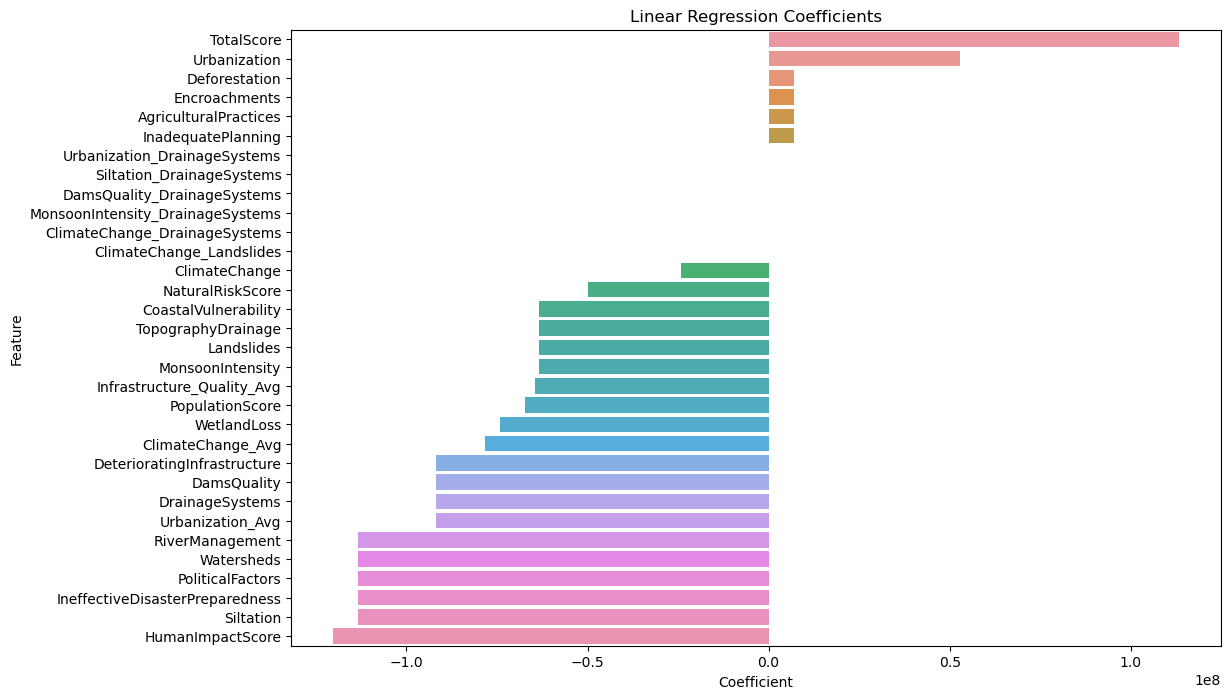

In [22]:
plt.figure(figsize=(12,8))
sn.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Linear Regression Coefficients')
plt.show()

In [23]:
df.corr()

MonsoonIntensity  TopographyDrainage  \
MonsoonIntensity                          1.000000           -0.007362   
TopographyDrainage                       -0.007362            1.000000   
RiverManagement                          -0.008070           -0.009924   
Deforestation                            -0.007251           -0.008548   
Urbanization                             -0.009309           -0.010532   
ClimateChange                            -0.008031           -0.009619   
DamsQuality                              -0.007787           -0.007607   
Siltation                                -0.007836           -0.009824   
AgriculturalPractices                    -0.008232           -0.009496   
Encroachments                            -0.010309           -0.012887   
IneffectiveDisasterPreparedness          -0.008032           -0.010746   
DrainageSystems                          -0.009716           -0.010056   
CoastalVulnerability                     -0.010659           -0.012526   
Landslides                               -0.009121           -0.010240   
Watersheds                               -0.008900           -0.011067   
DeterioratingInfrastructure              -0.008486           -0.006628   
PopulationScore                          -0.008679           -0.010815   
WetlandLoss                              -0.006811           -0.010267   
InadequatePlanning                       -0.008155           -0.011617   
PoliticalFactors                         -0.008474           -0.012350   
FloodProbability                          0.189098            0.187635   
MonsoonIntensity_DrainageSystems          0.672680           -0.011525   
Urbanization_DrainageSystems             -0.012140           -0.013537   
ClimateChange_DrainageSystems            -0.011264           -0.013144   
DamsQuality_DrainageSystems              -0.010976           -0.012007   
Siltation_DrainageSystems                -0.011292           -0.013099   
ClimateChange_Landslides                 -0.011241           -0.013038   
TotalScore                                0.207247            0.204069   
Infrastructure_Quality_Avg               -0.015155           -0.014168   
Urbanization_Avg                         -0.012794           -0.015182   
ClimateChange_Avg                        -0.010543           -0.014129   
HumanImpactScore                         -0.019811           -0.024314   
NaturalRiskScore                          0.436518            0.442742   

                                  RiverManagement  Deforestation  \
MonsoonIntensity                        -0.008070      -0.007251   
TopographyDrainage                      -0.009924      -0.008548   
RiverManagement                          1.000000      -0.008574   
Deforestation                           -0.008574       1.000000   
Urbanization                            -0.012292      -0.012248   
ClimateChange                           -0.009237      -0.008266   
DamsQuality                             -0.008711      -0.009356   
Siltation                               -0.010058      -0.011536   
AgriculturalPractices                   -0.010783      -0.010039   
Encroachments                           -0.011615      -0.013175   
IneffectiveDisasterPreparedness         -0.010675      -0.009512   
DrainageSystems                         -0.011277      -0.010490   
CoastalVulnerability                    -0.011680      -0.012388   
Landslides                              -0.008994      -0.009257   
Watersheds                              -0.011412      -0.010671   
DeterioratingInfrastructure             -0.005827      -0.008862   
PopulationScore                         -0.006727      -0.011777   
WetlandLoss                             -0.010069      -0.011004   
InadequatePlanning                      -0.009673      -0.010424   
PoliticalFactors                        -0.011550      -0.009661   
FloodProbability                         0.187131       0.184001   
MonsoonIntensity_Drai

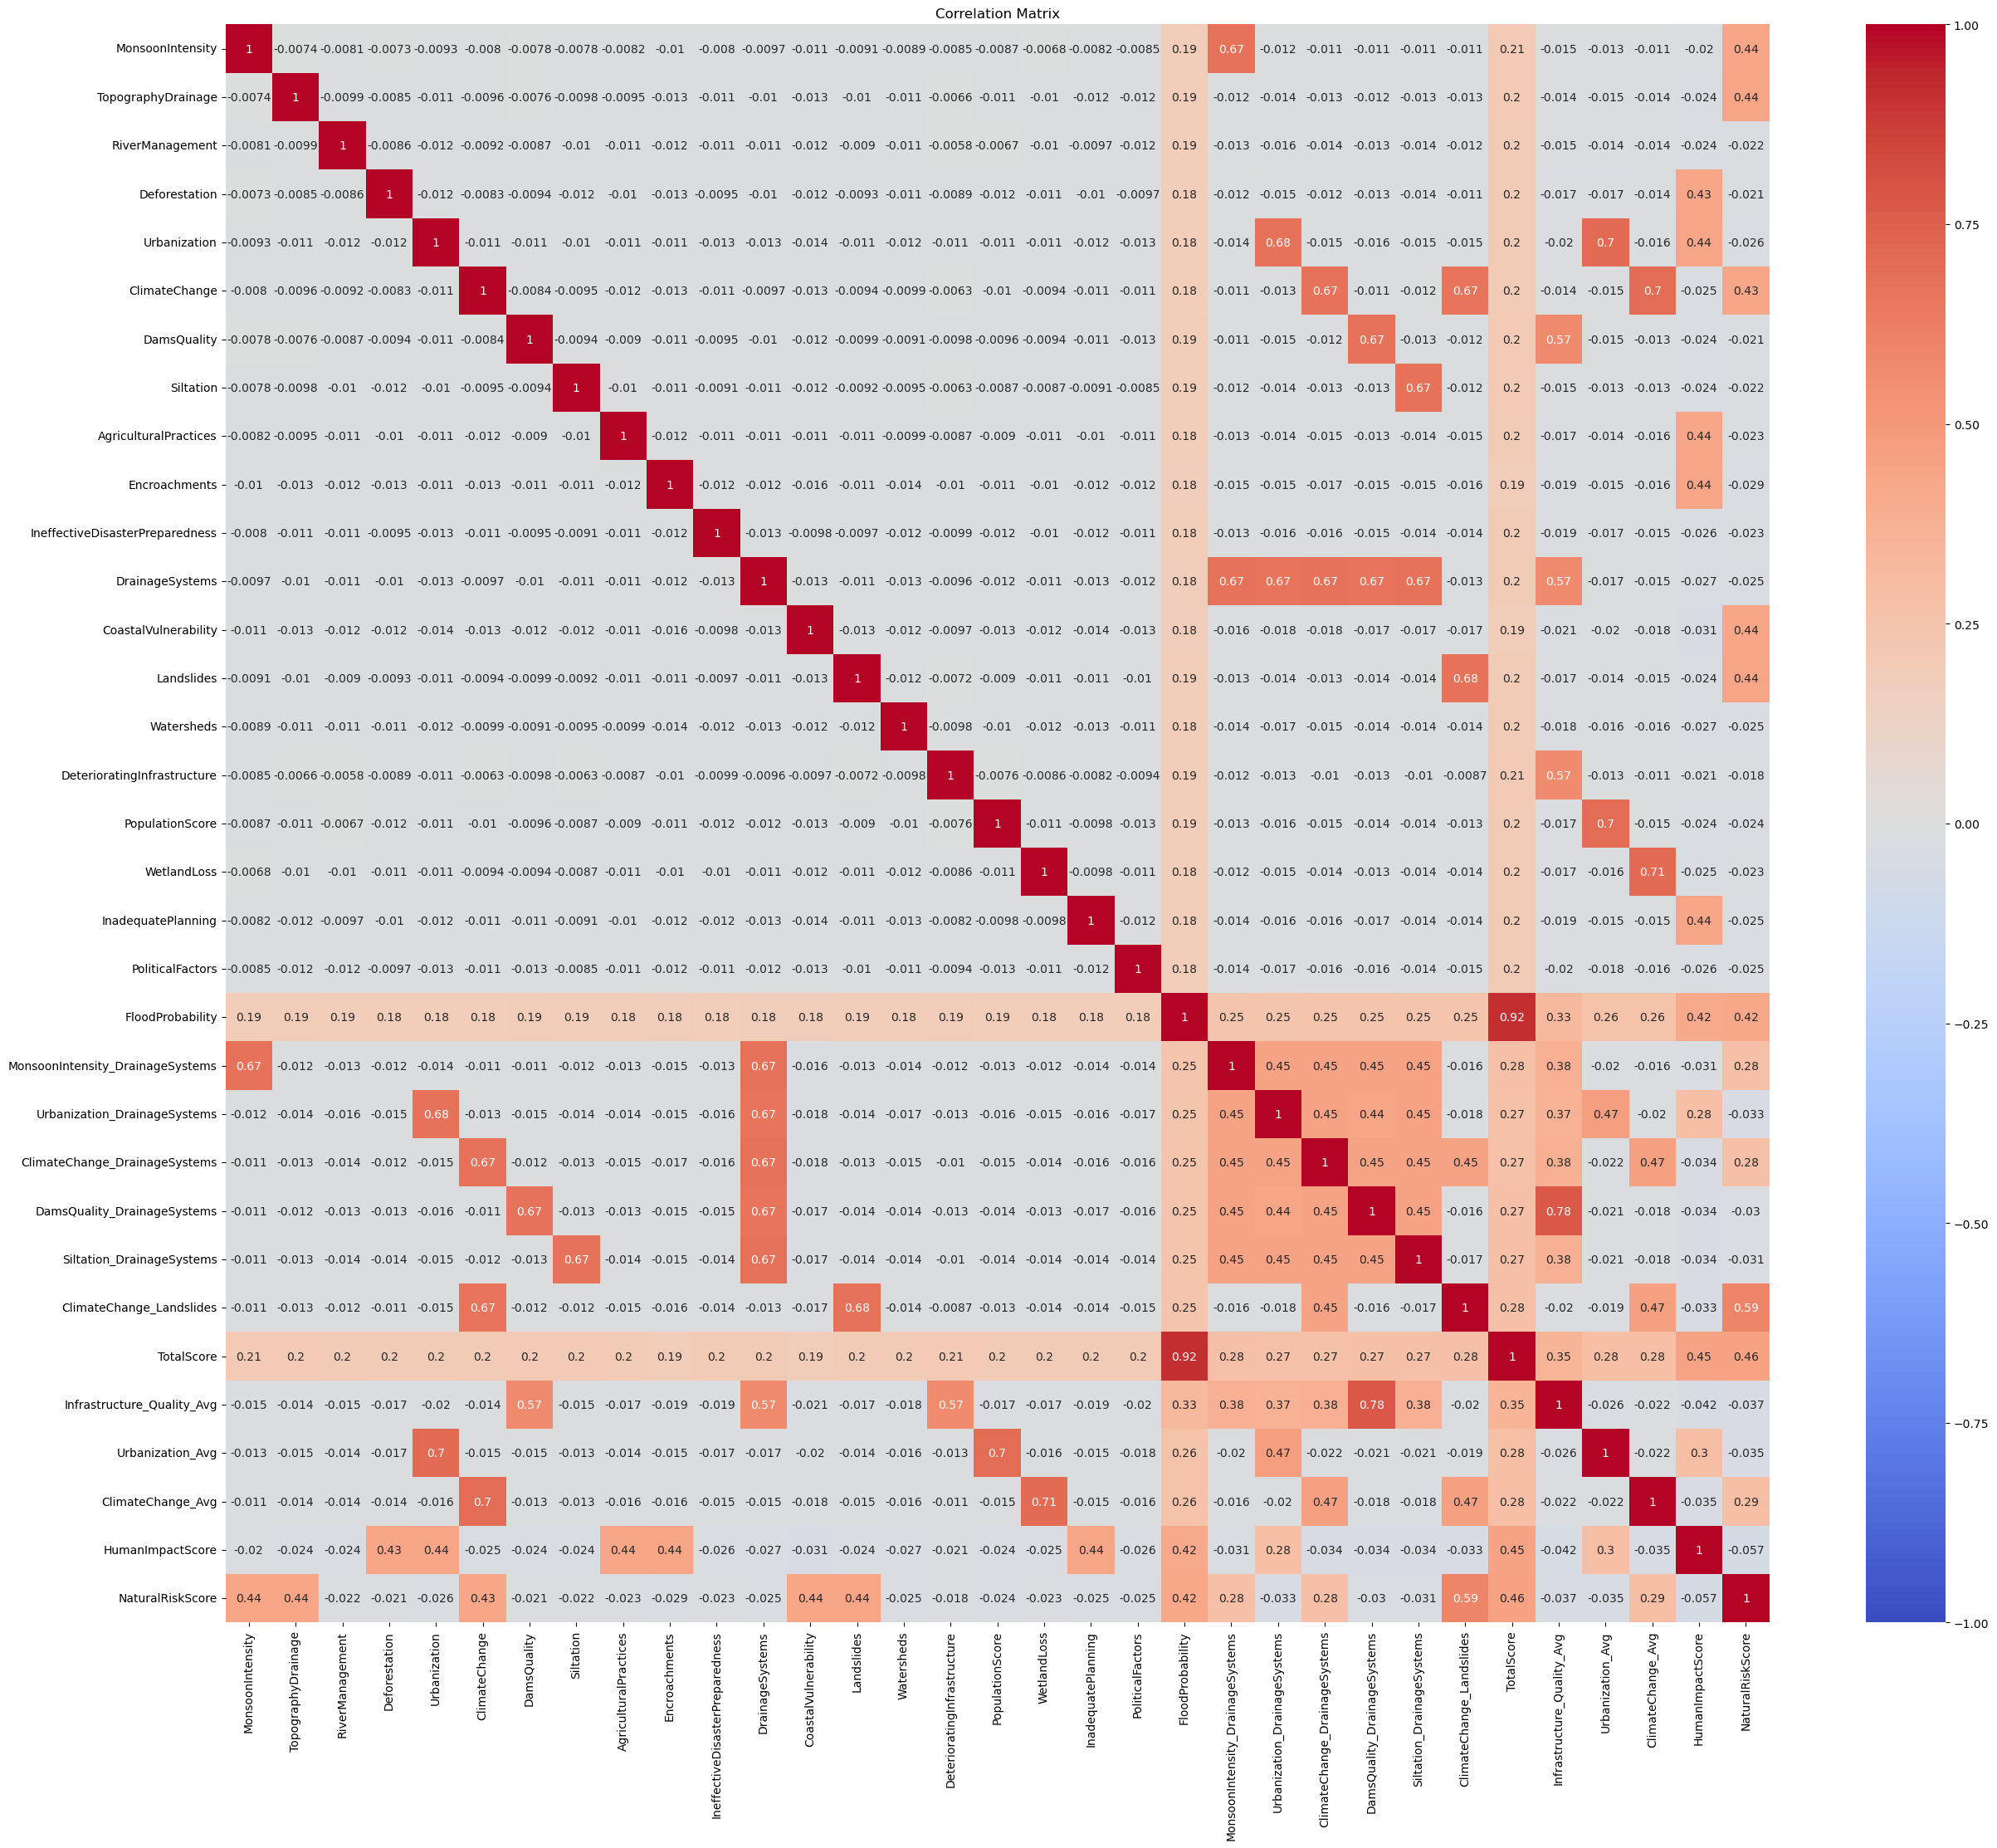

In [24]:
# Correlation matrix
plt.figure(figsize=(30, 25))
correlation_matrix = df.corr()
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [25]:
#Training the models
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
# validating the model
mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 0.00040317339670323916
Mean Absolute Error: 0.01579316344346871
R2 Score: 0.8448901053742599


In [26]:
# CatBoost Regressor
cat_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, loss_function='RMSE', verbose=0)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

# validating the model
mse = mean_squared_error(y_test, y_pred_cat)
mae = mean_absolute_error(y_test, y_pred_cat)
r2 = r2_score(y_test, y_pred_cat)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 0.00034512997854128154
Mean Absolute Error: 0.014488568111113842
R2 Score: 0.8672207168392962


In [27]:
df.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability',
       'MonsoonIntensity_DrainageSystems', 'Urbanization_DrainageSystems',
       'ClimateChange_DrainageSystems', 'DamsQuality_DrainageSystems',
       'Siltation_DrainageSystems', 'ClimateChange_Landslides', 'TotalScore',
       'Infrastructure_Quality_Avg', 'Urbanization_Avg', 'ClimateChange_Avg',
       'HumanImpactScore', 'NaturalRiskScore'],
      dtype='object')

In [28]:
# looking at the best perfoming features
feature_importances = cat_model.get_feature_importance()
features = X.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances

Feature  Importance
26                        TotalScore   97.463390
0                   MonsoonIntensity    0.207142
18                InadequatePlanning    0.149104
10   IneffectiveDisasterPreparedness    0.142206
7                          Siltation    0.133437
9                      Encroachments    0.130059
1                 TopographyDrainage    0.126772
15       DeterioratingInfrastructure    0.126145
6                        DamsQuality    0.107725
3                      Deforestation    0.100569
8              AgriculturalPractices    0.095080
17                       WetlandLoss    0.080574
14                        Watersheds    0.076633
19                  PoliticalFactors    0.076327
2                    RiverManagement    0.075689
16                   PopulationScore    0.074541
12              CoastalVulnerability    0.064321
13                        Landslides    0.063218
24         Siltation_DrainageSystems    0.060899
11                   DrainageSystems    0.060133
25          ClimateChange_Landslides    0.059124
23       DamsQuality_DrainageSystems    0.057710
21      Urbanization_DrainageSystems    0.056098
5                      ClimateChange    0.055512
4                       Urbanization    0.055081
20  MonsoonIntensity_DrainageSystems    0.053221
30                  HumanImpactScore    0.045995
22     ClimateChange_DrainageSystems    0.045062
27        Infrastructure_Quality_Avg    0.044103
31                  NaturalRiskScore    0.043122
29                 ClimateChange_Avg    0.036763
28                  Urbanization_Avg    0.034246

In [29]:
# Trying other models to see their performance

# XGBOOST
from xgboost import XGBRegressor

# XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6, objective='reg:squarederror')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# validating the model
mse = mean_squared_error(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 0.0003456751970564399
Mean Absolute Error: 0.014466835841285408
R2 Score: 0.8670109589854157


In [30]:
# looking at the best perfoming features
feature_importances = xgb_model.feature_importances_
features = X.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances

Feature  Importance
26                        TotalScore    0.959560
18                InadequatePlanning    0.001808
7                          Siltation    0.001782
10   IneffectiveDisasterPreparedness    0.001700
9                      Encroachments    0.001615
15       DeterioratingInfrastructure    0.001599
6                        DamsQuality    0.001510
11                   DrainageSystems    0.001508
0                   MonsoonIntensity    0.001412
17                       WetlandLoss    0.001330
16                   PopulationScore    0.001284
8              AgriculturalPractices    0.001275
13                        Landslides    0.001266
24         Siltation_DrainageSystems    0.001254
25          ClimateChange_Landslides    0.001235
20  MonsoonIntensity_DrainageSystems    0.001231
19                  PoliticalFactors    0.001228
14                        Watersheds    0.001228
12              CoastalVulnerability    0.001222
23       DamsQuality_DrainageSystems    0.001221
30                  HumanImpactScore    0.001219
21      Urbanization_DrainageSystems    0.001207
29                 ClimateChange_Avg    0.001205
22     ClimateChange_DrainageSystems    0.001191
28                  Urbanization_Avg    0.001181
3                      Deforestation    0.001178
1                 TopographyDrainage    0.001168
31                  NaturalRiskScore    0.001142
27        Infrastructure_Quality_Avg    0.001139
4                       Urbanization    0.001073
5                      ClimateChange    0.001044
2                    RiverManagement    0.000984

In [31]:
# LIGHTGBM
from lightgbm import LGBMRegressor

# LightGBM Regressor
lgb_model = LGBMRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

# validating the model
mse = mean_squared_error(y_test, y_pred_lgb)
mae = mean_absolute_error(y_test, y_pred_lgb)
r2 = r2_score(y_test, y_pred_lgb)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.301595 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1057
[LightGBM] [Info] Number of data points in the train set: 894365, number of used features: 32
[LightGBM] [Info] Start training from score 0.504480
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

### Trying out scaling methods

In [29]:
# minmax scaling
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler
minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.2, random_state=42)


In [30]:
# trying the models again
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# validating the model
mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 0.0004031349038735688
Mean Absolute Error: 0.015780764278169056
R2 Score: 0.8449049144335947


In [31]:
# Display coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
coefficients

Feature   Coefficient
17                       WetlandLoss  3.596590e+11
31                  NaturalRiskScore  2.958716e+11
5                      ClimateChange  2.100264e+11
27        Infrastructure_Quality_Avg  1.327293e+11
9                      Encroachments  1.311101e+11
3                      Deforestation  1.238262e+11
8              AgriculturalPractices  1.165423e+11
18                InadequatePlanning  1.165423e+11
2                    RiverManagement  1.063533e+11
14                        Watersheds  1.063533e+11
10   IneffectiveDisasterPreparedness  1.063533e+11
19                  PoliticalFactors  1.063533e+11
7                          Siltation  1.063533e+11
4                       Urbanization  9.786129e+10
16                   PopulationScore  9.215528e+10
15       DeterioratingInfrastructure  4.462470e+10
11                   DrainageSystems  4.462470e+10
28                  Urbanization_Avg  4.429303e+10
6                        DamsQuality  4.199972e+10
1                 TopographyDrainage  1.298869e+09
12              CoastalVulnerability  1.226710e+09
13                        Landslides  1.154551e+09
0                   MonsoonIntensity  1.154551e+09
21      Urbanization_DrainageSystems  4.898770e-03
24         Siltation_DrainageSystems  4.065359e-03
25          ClimateChange_Landslides  3.956078e-03
20  MonsoonIntensity_DrainageSystems  3.870051e-03
23       DamsQuality_DrainageSystems  3.731918e-03
22     ClimateChange_DrainageSystems  3.699319e-03
30                  HumanImpactScore -2.993000e+10
29                 ClimateChange_Avg -3.316231e+11
26                        TotalScore -5.384138e+11

In [32]:
# Trying catboost regressor
# CatBoost Regressor
cat_model = CatBoostRegressor(iterations=1000, loss_function='RMSE', verbose=0)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

# validating the model
mse = mean_squared_error(y_test, y_pred_cat)
mae = mean_absolute_error(y_test, y_pred_cat)
r2 = r2_score(y_test, y_pred_cat)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 0.0003449662739967359
Mean Absolute Error: 0.014477717421440592
R2 Score: 0.867283697668046


In [33]:
# looking at the best perfoming features
feature_importances = cat_model.get_feature_importance()
features = X.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances

Feature  Importance
26                        TotalScore   97.132954
0                   MonsoonIntensity    0.216228
18                InadequatePlanning    0.162501
10   IneffectiveDisasterPreparedness    0.150171
9                      Encroachments    0.142509
1                 TopographyDrainage    0.140721
7                          Siltation    0.139506
15       DeterioratingInfrastructure    0.133232
6                        DamsQuality    0.117474
8              AgriculturalPractices    0.108941
3                      Deforestation    0.107359
17                       WetlandLoss    0.090183
2                    RiverManagement    0.088554
19                  PoliticalFactors    0.085876
14                        Watersheds    0.085636
12              CoastalVulnerability    0.082042
16                   PopulationScore    0.080395
24         Siltation_DrainageSystems    0.073928
20  MonsoonIntensity_DrainageSystems    0.073477
25          ClimateChange_Landslides    0.072379
21      Urbanization_DrainageSystems    0.068446
13                        Landslides    0.068147
5                      ClimateChange    0.067982
4                       Urbanization    0.067782
22     ClimateChange_DrainageSystems    0.064813
23       DamsQuality_DrainageSystems    0.059764
30                  HumanImpactScore    0.058740
11                   DrainageSystems    0.058172
31                  NaturalRiskScore    0.057672
27        Infrastructure_Quality_Avg    0.055048
28                  Urbanization_Avg    0.045792
29                 ClimateChange_Avg    0.043575

In [37]:
# Trying other models to see their performance

# XGBOOST
from xgboost import XGBRegressor

# XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6, objective='reg:squarederror')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# validating the model
mse = mean_squared_error(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 0.0003456751970564399
Mean Absolute Error: 0.014466835841285408
R2 Score: 0.8670109589854157


### Predicting with the CatBoost Regressor

In [34]:
test = pd.read_csv('test.csv')

In [36]:
if 'id' in test.columns:
    test.drop('id', axis=1, inplace=True)
else:
     test.head()

In [58]:
test.head()

MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 4                   6                3              5   
1                 4                   4                2              9   
2                 1                   3                6              5   
3                 2                   4                4              6   
4                 6                   3                2              4   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             6              7            8          7                      8   
1             5              5            4          7                      5   
2             7              2            4          6                      4   
3             4              5            4          3                      4   
4             6              4            5          5                      3   

   Encroachments  IneffectiveDisasterPreparedness  DrainageSystems  \
0              4                                8                5   
1              4                                2                4   
2              2                                7                9   
3              4                                7                8   
4              7                                4                3   

   CoastalVulnerability  Landslides  Watersheds  DeterioratingInfrastructure  \
0                     7           5           6                            3   
1                     7           4           5                            1   
2                     2           5           5                            2   
3                     4           6           7                            6   
4                     2           6           4                            6   

   PopulationScore  WetlandLoss  InadequatePlanning  PoliticalFactors  
0                6            4                   4                 5  
1                7            4                   4                 3  
2                3            6                   8                 3  
3                4            2                   4                 4  
4                8            4                   5                 5

In [35]:
#feature engineering for the test set
test['TotalScore'] = test[selected_features].sum(axis=1)
test['Infrastructure_Quality_Avg'] = test[['DamsQuality', 'DrainageSystems', 'DeterioratingInfrastructure']].mean(axis=1)
test['Urbanization_Avg'] = test[['Urbanization', 'PopulationScore']].mean(axis=1)
test['ClimateChange_Avg'] = test[['ClimateChange', 'WetlandLoss']].mean(axis=1)
# Aggregated scores for risk factors
test['HumanImpactScore'] = test[['Urbanization', 'Deforestation', 'AgriculturalPractices', 'Encroachments', 'InadequatePlanning']].sum(axis=1)
test['NaturalRiskScore'] = test[['MonsoonIntensity', 'TopographyDrainage', 'ClimateChange', 'Landslides', 'CoastalVulnerability']].sum(axis=1)
test.head()

id  MonsoonIntensity  TopographyDrainage  RiverManagement  \
0  1117957                 4                   6                3   
1  1117958                 4                   4                2   
2  1117959                 1                   3                6   
3  1117960                 2                   4                4   
4  1117961                 6                   3                2   

   Deforestation  Urbanization  ClimateChange  DamsQuality  Siltation  \
0              5             6              7            8          7   
1              9             5              5            4          7   
2              5             7              2            4          6   
3              6             4              5            4          3   
4              4             6              4            5          5   

   AgriculturalPractices  Encroachments  IneffectiveDisasterPreparedness  \
0                      8              4                                8   
1                      5              4                                2   
2                      4              2                                7   
3                      4              4                                7   
4                      3              7                                4   

   DrainageSystems  CoastalVulnerability  Landslides  Watersheds  \
0                5                     7           5           6   
1                4                     7           4           5   
2                9                     2           5           5   
3                8                     4           6           7   
4                3                     2           6           4   

   DeterioratingInfrastructure  PopulationScore  WetlandLoss  \
0                            3                6            4   
1                            1                7            4   
2                            2                3            6   
3                            6                4            2   
4                            6                8            4   

   InadequatePlanning  PoliticalFactors  TotalScore  \
0                   4                 5         111   
1                   4                 3          90   
2                   8                 3          90   
3                   4                 4          92   
4                   5                 5          92   

   Infrastructure_Quality_Avg  Urbanization_Avg  ClimateChange_Avg  \
0                    5.333333               6.0                5.5   
1                    3.000000               6.0                4.5   
2                    5.000000               5.0                4.0   
3                    6.000000               4.0                3.5   
4                    4.666667               7.0                4.0   

   HumanImpactScore  NaturalRiskScore  
0                27                29  
1                27                24  
2                26                13  
3                22                21  
4                25                21

In [64]:
#Scaling the test set
minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(test)

In [67]:
prediction = cat_model.predict(test)

In [68]:
sample.head()

id  FloodProbability
0  1117957               0.5
1  1117958               0.5
2  1117959               0.5
3  1117960               0.5
4  1117961               0.5

In [70]:
sample['FloodProbability'] = prediction

In [88]:
sample.to_csv("Submission-2.csv", index=False)

In [38]:
#Trying other models
# LIGHTGBM
from lightgbm import LGBMRegressor

# LightGBM Regressor
lgb_model = LGBMRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

# validating the model
mse = mean_squared_error(y_test, y_pred_lgb)
mae = mean_absolute_error(y_test, y_pred_lgb)
r2 = r2_score(y_test, y_pred_lgb)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.234530 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1057
[LightGBM] [Info] Number of data points in the train set: 894365, number of used features: 32
[LightGBM] [Info] Start training from score 0.504480
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [39]:
X = df.drop('FloodProbability', axis=1)
y = df['FloodProbability']

# Robust Scaler

robust_scaler = RobustScaler()
X_robust = robust_scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_robust, y, test_size=0.2, random_state=42)


In [40]:
# trying the models again
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# validating the model
mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 0.00040317396256305633
Mean Absolute Error: 0.015793111209948467
R2 Score: 0.8448898876752318


In [37]:
# Trying catboost regressor
from catboost import CatBoostRegressor

# CatBoost Regressor
cat_model = CatBoostRegressor(iterations=1000, loss_function='RMSE', verbose=0)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

# validating the model
mse = mean_squared_error(y_test, y_pred_cat)
mae = mean_absolute_error(y_test, y_pred_cat)
r2 = r2_score(y_test, y_pred_cat)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 0.0003449662739967359
Mean Absolute Error: 0.014477717421440592
R2 Score: 0.867283697668046


------ The above model was used for the recent prediction and will be fine -tune for the optimum accuracy

In [42]:
# Trying other models to see their performance

# XGBOOST
from xgboost import XGBRegressor

# XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# validating the model
mse = mean_squared_error(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 0.00034587773276013043
Mean Absolute Error: 0.014492684350352307
R2 Score: 0.8669330389343551


In [43]:
# LIGHTGBM
from lightgbm import LGBMRegressor

# LightGBM Regressor
lgb_model = LGBMRegressor()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

# validating the model
mse = mean_squared_error(y_test, y_pred_lgb)
mae = mean_absolute_error(y_test, y_pred_lgb)
r2 = r2_score(y_test, y_pred_lgb)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.271856 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1053
[LightGBM] [Info] Number of data points in the train set: 894365, number of used features: 32
[LightGBM] [Info] Start training from score 0.504480
Mean Squared Error: 0.0003454132106003902
Mean Absolute Error: 0.014509375681444708
R2 Score: 0.8671117510811331


### Predicting with Catboost after scaling with RobustScalar, so far it has the highest R2 Score value of 0.8672997591528837

In [44]:
test = pd.read_csv('test.csv')

In [45]:
test.head()

id  MonsoonIntensity  TopographyDrainage  RiverManagement  \
0  1117957                 4                   6                3   
1  1117958                 4                   4                2   
2  1117959                 1                   3                6   
3  1117960                 2                   4                4   
4  1117961                 6                   3                2   

   Deforestation  Urbanization  ClimateChange  DamsQuality  Siltation  \
0              5             6              7            8          7   
1              9             5              5            4          7   
2              5             7              2            4          6   
3              6             4              5            4          3   
4              4             6              4            5          5   

   AgriculturalPractices  Encroachments  IneffectiveDisasterPreparedness  \
0                      8              4                                8   
1                      5              4                                2   
2                      4              2                                7   
3                      4              4                                7   
4                      3              7                                4   

   DrainageSystems  CoastalVulnerability  Landslides  Watersheds  \
0                5                     7           5           6   
1                4                     7           4           5   
2                9                     2           5           5   
3                8                     4           6           7   
4                3                     2           6           4   

   DeterioratingInfrastructure  PopulationScore  WetlandLoss  \
0                            3                6            4   
1                            1                7            4   
2                            2                3            6   
3                            6                4            2   
4                            6                8            4   

   InadequatePlanning  PoliticalFactors  
0                   4                 5  
1                   4                 3  
2                   8                 3  
3                   4                 4  
4                   5                 5

In [46]:
#feature engineering

## Something related to the Drainage System

test['MonsoonIntensity_DrainageSystems'] = test['MonsoonIntensity'] * test['DrainageSystems']
test['Urbanization_DrainageSystems'] = test['Urbanization'] * test['DrainageSystems']
test['ClimateChange_DrainageSystems'] = test['ClimateChange'] * test['DrainageSystems']
test['DamsQuality_DrainageSystems'] = test['DamsQuality'] * test['DrainageSystems']
test['Siltation_DrainageSystems'] = test['Siltation'] * test['DrainageSystems']
test['ClimateChange_Landslides'] = test['ClimateChange'] * test['Landslides']

# some aggregation
test['TotalScore'] = test[selected_features].sum(axis=1)
test['Infrastructure_Quality_Avg'] = test[['DamsQuality', 'DrainageSystems', 'DeterioratingInfrastructure']].mean(axis=1)
test['Urbanization_Avg'] = test[['Urbanization', 'PopulationScore']].mean(axis=1)
test['ClimateChange_Avg'] = test[['ClimateChange', 'WetlandLoss']].mean(axis=1)

# Aggregated scores for risk factors
test['HumanImpactScore'] = test[['Urbanization', 'Deforestation', 'AgriculturalPractices', 'Encroachments', 'InadequatePlanning']].sum(axis=1)
test['NaturalRiskScore'] = test[['MonsoonIntensity', 'TopographyDrainage', 'ClimateChange', 'Landslides', 'CoastalVulnerability']].sum(axis=1)

In [47]:
X = test.drop('id', axis=1)

# RobustScalar

robust_scaler = RobustScaler()
test_robust = robust_scaler.fit_transform(X)

In [48]:
y_test_pred = cat_model.predict(test_robust)

In [49]:
y_test_pred

array([0.57744689, 0.45249466, 0.44950626, ..., 0.62039187, 0.54906493,
       0.52608253])

In [50]:
sample['FloodProbability'] = y_test_pred

In [51]:
sample.to_csv('submission-3.csv', index=False)

### Using optuna to fine tune the catboost Regressor model

In [77]:
#pip install optuna


  Obtaining dependency information for optuna from https://files.pythonhosted.org/packages/15/da/68883911855d8b4d521f9a370e4e6aab8232b91c1d8d5a8348c4680c6642/optuna-3.6.1-py3-none-any.whl.metadata
  Obtaining dependency information for alembic>=1.5.0 from https://files.pythonhosted.org/packages/7f/50/9fb3a5c80df6eb6516693270621676980acd6d5a9a7efdbfa273f8d616c7/alembic-1.13.1-py3-none-any.whl.metadata
  Obtaining dependency information for colorlog from https://files.pythonhosted.org/packages/f3/18/3e867ab37a24fdf073c1617b9c7830e06ec270b1ea4694a624038fc40a03/colorlog-6.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for Mako from https://files.pythonhosted.org/packages/03/62/70f5a0c2dd208f9f3f2f9afd103aec42ee4d9ad2401d78342f75e9b8da36/Mako-1.3.5-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/380.1 kB ? eta -:--:--
   - -------------------------------------- 10.2/380.1 kB ? eta -:--:--
   --- ----------------------------------- 30.7/380.1 kB 6

In [52]:
import optuna
# Load data

#X = pd.DataFrame(data.data, columns=data.feature_names)
#y = data.target

# Split data
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# X_test, y_test

def objective(trial):
    # Define the hyperparameter space
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.5, 1.0),
        'random_strength': trial.suggest_float('random_strength', 0.1, 10.0),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']),
    }

    # Create the CatBoost regressor model
    model = CatBoostRegressor(
        **params,
        loss_function='RMSE',
        eval_metric='RMSE',
        verbose=0
    )

    # Train the model
    model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=False)

    # Predict on the validation set
    preds = model.predict(X_test)

    # Calculate the RMSE
    rmse = mean_squared_error(y_test, preds, squared=False)
    return rmse

# Create a study object and specify the direction to minimize the RMSE
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, timeout=600)  # You can change the number of trials and timeout

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters: ", best_params)



[I 2024-05-31 07:55:56,242] A new study created in memory with name: no-name-e2975304-1c1b-40e4-a57d-dc7de5df896a
[I 2024-05-31 07:57:33,147] Trial 0 finished with value: 0.018610227183194817 and parameters: {'iterations': 774, 'depth': 9, 'learning_rate': 0.239063237791696, 'l2_leaf_reg': 0.08526736181350097, 'subsample': 0.5878425162380996, 'colsample_bylevel': 0.5866283435784779, 'random_strength': 8.54048797194839, 'bagging_temperature': 0.24705974390347385, 'border_count': 60, 'boosting_type': 'Plain'}. Best is trial 0 with value: 0.018610227183194817.
[I 2024-05-31 08:00:02,961] Trial 1 finished with value: 0.01861444188268282 and parameters: {'iterations': 812, 'depth': 10, 'learning_rate': 0.23706026906629293, 'l2_leaf_reg': 0.003117703195663835, 'subsample': 0.7231753759679798, 'colsample_bylevel': 0.976167195148326, 'random_strength': 9.118066061094929, 'bagging_temperature': 0.7107808423431846, 'border_count': 107, 'boosting_type': 'Plain'}. Best is trial 0 with value: 0.018

Best hyperparameters:  {'iterations': 774, 'depth': 9, 'learning_rate': 0.239063237791696, 'l2_leaf_reg': 0.08526736181350097, 'subsample': 0.5878425162380996, 'colsample_bylevel': 0.5866283435784779, 'random_strength': 8.54048797194839, 'bagging_temperature': 0.24705974390347385, 'border_count': 60, 'boosting_type': 'Plain'}


In [53]:
# Train the final model using the best hyperparameters on the entire dataset
final_model = CatBoostRegressor(**best_params, loss_function='RMSE')
final_model.fit(X_train, y_train)

# Optionally, evaluate the final model
final_preds = final_model.predict(X_test)
final_rmse = mean_squared_error(y_test, final_preds, squared=False)
print("Final RMSE: ", final_rmse)


0:	learn: 0.0415361	total: 207ms	remaining: 2m 39s
1:	learn: 0.0350154	total: 436ms	remaining: 2m 48s
2:	learn: 0.0303496	total: 648ms	remaining: 2m 46s
3:	learn: 0.0265001	total: 875ms	remaining: 2m 48s
4:	learn: 0.0239482	total: 1.09s	remaining: 2m 48s
5:	learn: 0.0224035	total: 1.31s	remaining: 2m 48s
6:	learn: 0.0212585	total: 1.56s	remaining: 2m 50s
7:	learn: 0.0205480	total: 1.76s	remaining: 2m 48s
8:	learn: 0.0199754	total: 2s	remaining: 2m 49s
9:	learn: 0.0196948	total: 2.21s	remaining: 2m 49s
10:	learn: 0.0194860	total: 2.42s	remaining: 2m 47s
11:	learn: 0.0193595	total: 2.61s	remaining: 2m 45s
12:	learn: 0.0192755	total: 2.79s	remaining: 2m 43s
13:	learn: 0.0192040	total: 2.99s	remaining: 2m 42s
14:	learn: 0.0191369	total: 3.21s	remaining: 2m 42s
15:	learn: 0.0191077	total: 3.42s	remaining: 2m 41s
16:	learn: 0.0190774	total: 3.62s	remaining: 2m 41s
17:	learn: 0.0190586	total: 3.82s	remaining: 2m 40s
18:	learn: 0.0190430	total: 4.01s	remaining: 2m 39s
19:	learn: 0.0190239	tota

158:	learn: 0.0184681	total: 34.8s	remaining: 2m 14s
159:	learn: 0.0184654	total: 35.1s	remaining: 2m 14s
160:	learn: 0.0184640	total: 35.3s	remaining: 2m 14s
161:	learn: 0.0184621	total: 35.5s	remaining: 2m 14s
162:	learn: 0.0184603	total: 35.7s	remaining: 2m 13s
163:	learn: 0.0184588	total: 35.9s	remaining: 2m 13s
164:	learn: 0.0184571	total: 36.1s	remaining: 2m 13s
165:	learn: 0.0184542	total: 36.4s	remaining: 2m 13s
166:	learn: 0.0184519	total: 36.5s	remaining: 2m 12s
167:	learn: 0.0184503	total: 36.8s	remaining: 2m 12s
168:	learn: 0.0184493	total: 36.9s	remaining: 2m 12s
169:	learn: 0.0184469	total: 37.2s	remaining: 2m 12s
170:	learn: 0.0184459	total: 37.4s	remaining: 2m 11s
171:	learn: 0.0184449	total: 37.6s	remaining: 2m 11s
172:	learn: 0.0184438	total: 37.8s	remaining: 2m 11s
173:	learn: 0.0184422	total: 38s	remaining: 2m 10s
174:	learn: 0.0184408	total: 38.2s	remaining: 2m 10s
175:	learn: 0.0184394	total: 38.4s	remaining: 2m 10s
176:	learn: 0.0184381	total: 38.6s	remaining: 2m

315:	learn: 0.0182279	total: 1m 10s	remaining: 1m 41s
316:	learn: 0.0182255	total: 1m 10s	remaining: 1m 41s
317:	learn: 0.0182241	total: 1m 10s	remaining: 1m 41s
318:	learn: 0.0182229	total: 1m 10s	remaining: 1m 40s
319:	learn: 0.0182214	total: 1m 10s	remaining: 1m 40s
320:	learn: 0.0182201	total: 1m 11s	remaining: 1m 40s
321:	learn: 0.0182191	total: 1m 11s	remaining: 1m 40s
322:	learn: 0.0182182	total: 1m 11s	remaining: 1m 39s
323:	learn: 0.0182161	total: 1m 11s	remaining: 1m 39s
324:	learn: 0.0182153	total: 1m 12s	remaining: 1m 39s
325:	learn: 0.0182138	total: 1m 12s	remaining: 1m 39s
326:	learn: 0.0182130	total: 1m 12s	remaining: 1m 39s
327:	learn: 0.0182124	total: 1m 12s	remaining: 1m 38s
328:	learn: 0.0182106	total: 1m 12s	remaining: 1m 38s
329:	learn: 0.0182088	total: 1m 13s	remaining: 1m 38s
330:	learn: 0.0182076	total: 1m 13s	remaining: 1m 38s
331:	learn: 0.0182065	total: 1m 13s	remaining: 1m 37s
332:	learn: 0.0182061	total: 1m 13s	remaining: 1m 37s
333:	learn: 0.0182045	total:

467:	learn: 0.0180237	total: 1m 45s	remaining: 1m 9s
468:	learn: 0.0180222	total: 1m 46s	remaining: 1m 9s
469:	learn: 0.0180206	total: 1m 46s	remaining: 1m 8s
470:	learn: 0.0180194	total: 1m 46s	remaining: 1m 8s
471:	learn: 0.0180191	total: 1m 46s	remaining: 1m 8s
472:	learn: 0.0180172	total: 1m 47s	remaining: 1m 8s
473:	learn: 0.0180147	total: 1m 47s	remaining: 1m 7s
474:	learn: 0.0180125	total: 1m 47s	remaining: 1m 7s
475:	learn: 0.0180112	total: 1m 47s	remaining: 1m 7s
476:	learn: 0.0180099	total: 1m 47s	remaining: 1m 7s
477:	learn: 0.0180089	total: 1m 48s	remaining: 1m 6s
478:	learn: 0.0180080	total: 1m 48s	remaining: 1m 6s
479:	learn: 0.0180070	total: 1m 48s	remaining: 1m 6s
480:	learn: 0.0180053	total: 1m 48s	remaining: 1m 6s
481:	learn: 0.0180045	total: 1m 48s	remaining: 1m 6s
482:	learn: 0.0180035	total: 1m 49s	remaining: 1m 5s
483:	learn: 0.0180024	total: 1m 49s	remaining: 1m 5s
484:	learn: 0.0180015	total: 1m 49s	remaining: 1m 5s
485:	learn: 0.0180001	total: 1m 49s	remaining:

624:	learn: 0.0178226	total: 2m 21s	remaining: 33.8s
625:	learn: 0.0178218	total: 2m 22s	remaining: 33.6s
626:	learn: 0.0178207	total: 2m 22s	remaining: 33.4s
627:	learn: 0.0178196	total: 2m 22s	remaining: 33.1s
628:	learn: 0.0178184	total: 2m 22s	remaining: 32.9s
629:	learn: 0.0178165	total: 2m 22s	remaining: 32.7s
630:	learn: 0.0178151	total: 2m 23s	remaining: 32.4s
631:	learn: 0.0178137	total: 2m 23s	remaining: 32.2s
632:	learn: 0.0178126	total: 2m 23s	remaining: 32s
633:	learn: 0.0178107	total: 2m 23s	remaining: 31.8s
634:	learn: 0.0178088	total: 2m 24s	remaining: 31.5s
635:	learn: 0.0178078	total: 2m 24s	remaining: 31.3s
636:	learn: 0.0178068	total: 2m 24s	remaining: 31.1s
637:	learn: 0.0178050	total: 2m 24s	remaining: 30.9s
638:	learn: 0.0178043	total: 2m 25s	remaining: 30.7s
639:	learn: 0.0178027	total: 2m 25s	remaining: 30.4s
640:	learn: 0.0178018	total: 2m 25s	remaining: 30.2s
641:	learn: 0.0177992	total: 2m 25s	remaining: 30s
642:	learn: 0.0177984	total: 2m 26s	remaining: 29.

In [54]:
# validating the model
#mse = mean_squared_error(y_test, y_pred_cat)
mae = mean_absolute_error(y_test, final_preds)
r2 = r2_score(y_test, final_preds)

print('Mean Squared Error:', final_rmse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 0.018681384062797374
Mean Absolute Error: 0.014530074092645527
R2 Score: 0.8657340981632933


## It was noticed that the fine-tuned model didnt improve in R2 score as compared to the previous score

#### ---------------------------------------------------------------------------------------